# Figures for paper

## Setup

In [1]:
# Set working directory
%cd work/notebooks
# Autoreload
%load_ext autoreload
%autoreload 2
# Use rpy2 to run R in python notebook for plotting
%load_ext rpy2.ipython

/home/jovyan/work/notebooks


In [3]:
# Import local code
import sys
sys.path.append('/home/jovyan/work/code')
from gradientVersion import *
from processing import *
from analysis_helpers import *
from triplets import *
from enrichments_data import *
from enrichments import *
from single_cell import *
from brainspan import *
from maps_data import *
from maps_analysis import *
from maps_null_test import *
from disorders_data import *
from disorders import *

In [ ]:
pca_base = gradientVersion(approach='pca', kernel=None).fit('hcp_base')
dme_3d_ds5 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('hcp_3d_ds5')

In [ ]:
weights = dme_3d_ds5.weights.iloc[:,:3]
null_weights = shuffle_gene_weights(weights, n=5000, rank=False)

---

# Extended Data Fig 1

### Donor distribution

In [ ]:
# _, counts, stability = get_expression_abagen(fetch_hcp(), donors_threshold=3, return_counts=True, return_stability=True)

In [4]:
counts = pd.read_csv("../outputs/counts_hcp.csv", index_col=0)
donor_counts = (counts!=0).sum(axis=1)[:180].rename('count').to_frame().join(get_labels_hcp())
stability = pd.read_csv("../outputs/stability_hcp_ranked.csv", index_col=0).set_index('gene_symbol')

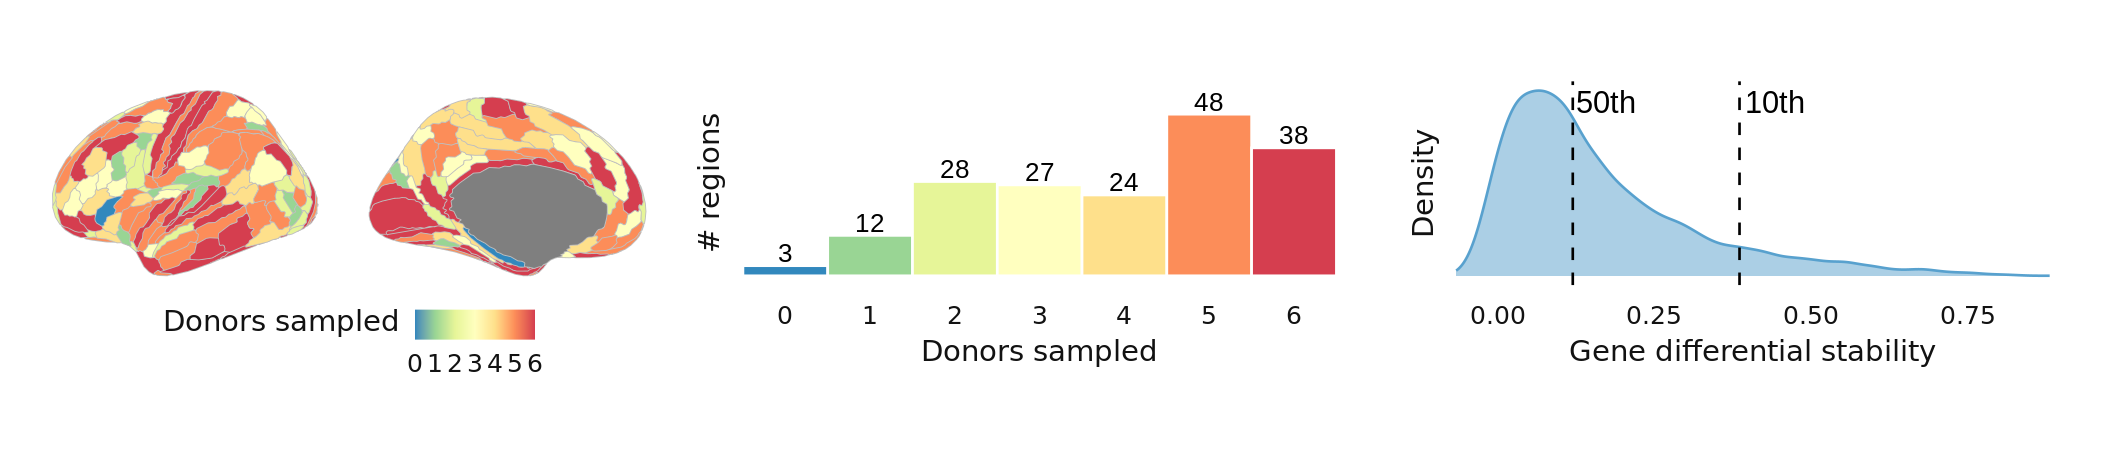

In [ ]:
%%R -i donor_counts -i stability -w 180 -h 40 -u mm -r 300
source("../code/fig_extended.R")

g1 <- plot_donor_counts(donor_counts)
g2 <- plot_donor_counts_histogram(donor_counts) + plot_layout(tag_level='new')
g3 <- plot_gene_stability_density(stability)

plot_distributions <- (g1 | g2 | g3)
plot_distributions

### Raster plot of filtering options

Compute expression data for all triplets, or load from file

In [ ]:
# triplets = get_triplets(atlas=fetch_hcp())
# save_pickle(triplets, "triplets")
triplets = load_pickle('triplets')
print("Got base triplets")

# triplets_2donors = get_triplets(atlas=fetch_hcp(), donors_threshold=2)
# save_pickle(triplets_2donors, "triplets_2donors")
triplets_2donors = load_pickle('triplets_2donors')
print("Got 2donors triplets")

# triplets_3donors = get_triplets(atlas=fetch_hcp(), donors_threshold=3)
# save_pickle(triplets_3donors, "triplets_3donors")
triplets_3donors = load_pickle('triplets_3donors')
print("Got 3donors triplets")

Got base triplets
Got 2donors triplets
Got 3donors triplets


Load triplets data from pickles since triplet stability levels are slow to compute

In [ ]:
triplets_pca = make_triplet_ds_plot(get_triplets_stability_levels(triplets, approach='pca', kernel=None))
triplets_dme = make_triplet_ds_plot(get_triplets_stability_levels(triplets, approach='dm', kernel='normalized_angle', alpha=1))
triplets_pca_2d = make_triplet_ds_plot(get_triplets_stability_levels(triplets_2donors, approach='pca', kernel=None))
triplets_dme_2d = make_triplet_ds_plot(get_triplets_stability_levels(triplets_2donors, approach='dm', kernel='normalized_angle', alpha=1))
triplets_pca_3d = make_triplet_ds_plot(get_triplets_stability_levels(triplets_3donors, approach='pca', kernel=None))
triplets_dme_3d = make_triplet_ds_plot(get_triplets_stability_levels(triplets_3donors, approach='dm', kernel='normalized_angle', alpha=1))

Computed triplet stability
Computed triplet stability
Computed triplet stability
Computed triplet stability
Computed triplet stability
Computed triplet stability


In [ ]:
# triplets_dict = {
#     'PCA, all regions': triplets_pca, 
#     'PCA, only 2+ donor regions': triplets_pca_2d, 
#     'PCA, only 3+ donor regions': triplets_pca_3d,
#     'DME, all regions': triplets_dme,
#     'DME, only 2+ donor regions': triplets_dme_2d,
#     'DME, only 3+ donor regions': triplets_dme_3d
# }

# save_pickle(triplets_dict, 'triplets_dict')
triplets_dict = load_pickle('triplets_dict')

triplets_plot = (pd.concat(triplets_dict)
 .reset_index(0)
 .rename({'level_0':'method', 'version':'DS'}, axis=1)
 .assign(method = lambda x: pd.Categorical(x['method'], ordered=True, categories=triplets_dict.keys()))
                   )
triplets_plot

method            how   DS component     pair  \
0              PCA, all regions  Region scores  0.0         1  012-345   
1              PCA, all regions  Region scores  0.0         2  012-345   
2              PCA, all regions  Region scores  0.0         3  012-345   
3              PCA, all regions  Region scores  0.0         4  012-345   
4              PCA, all regions  Region scores  0.0         5  012-345   
..                          ...            ...  ...       ...      ...   
495  DME, only 3+ donor regions  Region scores  0.9         1  045-123   
496  DME, only 3+ donor regions  Region scores  0.9         2  045-123   
497  DME, only 3+ donor regions  Region scores  0.9         3  045-123   
498  DME, only 3+ donor regions  Region scores  0.9         4  045-123   
499  DME, only 3+ donor regions  Region scores  0.9         5  045-123   

         corr  corr_abs  
0    0.774335  0.774335  
1    0.041373  0.041373  
2    0.245817  0.245817  
3    0.106467  0.106467  
4   -0.107603  0.107603  
..        ...       ...  
495  0.970999  0.970999  
496  0.950815  0.950815  
497  0.927292  0.927292  
498  0.853620  0.853620  
499  0.865658  0.865658  

[3000 rows x 7 columns]

In [ ]:
pd.concat(triplets_dict).reset_index(0).groupby(['level_0','how','version','component'])['corr_abs'].median().unstack(2)

version                                                  0.0       0.1  \
level_0                    how           component                       
DME, all regions           Region scores 1          0.779779  0.797595   
                                         2          0.088498  0.130009   
                                         3          0.140212  0.120787   
                                         4          0.209637  0.335881   
                                         5          0.341785  0.362675   
DME, only 2+ donor regions Region scores 1          0.886773  0.892680   
                                         2          0.179735  0.236983   
                                         3          0.202728  0.261034   
                                         4          0.290805  0.364443   
                                         5          0.211409  0.179571   
DME, only 3+ donor regions Region scores 1          0.943289  0.945071   
                                         2          0.703216  0.689413   
                                         3          0.519905  0.548900   
                                         4          0.215122  0.273843   
                                         5          0.283837  0.288940   
PCA, all regions           Region scores 1          0.721299  0.748945   
                                         2          0.118019  0.110347   
                                         3          0.112725  0.125533   
                                         4          0.145198  0.139684   
                                         5          0.298827  0.336792   
PCA, only 2+ donor regions Region scores 1          0.879506  0.887581   
                                         2          0.154541  0.210887   
                                         3          0.182715  0.188370   
                                         4          0.231356  0.213835   
                                         5          0.243905  0.322267   
PCA, only 3+ donor regions Region scores 1          0.946573  0.947768   
                                         2          0.641467  0.638938   
                                         3          0.498338  0.534291   
                                         4          0.215585  0.192103   
                                         5          0.180987  0.209820   

version                                                  0.2       0.3  \
level_0                    how           component                       
DME, all regions           Region scores 1          0.820613  0.838806   
                                         2          0.177416  0.227978   
                                         3          0.143557  0.136625   
                                         4          0.459702  0.335695   
                                         5          0.307663  0.268851   
DME, only 2+ donor regions Region scores 1          0.899796  0.907334   
                                         2          0.313708  0.340456   
                                         3          0.372525  0.460689   
                                         4          0.315908  0.278868   
                                         5          0.115746  0.144201   
DME, only 3+ donor regions Region scores 1          0.947773  0.950859   
                                         2          0.718584  0.732016   
                                         3          0.566324  0.567890   
                                         4          0.187712  0.220080   
                                         5          0.277093  0.228726   
PCA, all regions           Region scores 1          0.778971  0.807344   
                                         2          0.159537  0.171453   
                                         3          0.117387  0.069135   
                                         4          0.202681  0.155136   
                                         5          0.404655  0.448716   
PCA

In [ ]:
# triplets_pca_by_donors = pd.concat({
#     '1': triplets_pca,
#     '2': triplets_pca_2d,
#     '3': triplets_pca_3d,
# })
# triplets_dme_by_donors = pd.concat({
#     '1': triplets_dme,
#     '2': triplets_dme_2d,
#     '3': triplets_dme_3d,
# })

# triplets_raster = (pd.concat({
#     'pca': triplets_pca_by_donors, 
#     'dme': triplets_dme_by_donors
# }).reset_index([0,1])
# .rename({
#     'level_0':'method', 
#     'level_1':'donors_filter',
#     'version':'gene_filter'
# }, axis=1)
# .groupby(['component', 'method', 'donors_filter', 'gene_filter'])
# .median()
# .reset_index()
# )

# save_pickle(triplets_raster, 'triplets_raster')
triplets_raster = load_pickle('triplets_raster')
triplets_raster

component method donors_filter  gene_filter      corr  corr_abs
0           1    dme             1          0.0  0.765311  0.779779
1           1    dme             1          0.1  0.782268  0.797595
2           1    dme             1          0.2  0.804586  0.820613
3           1    dme             1          0.3  0.825892  0.838806
4           1    dme             1          0.4  0.845048  0.853103
..        ...    ...           ...          ...       ...       ...
295         5    pca             3          0.5 -0.015480  0.262433
296         5    pca             3          0.6 -0.053473  0.236582
297         5    pca             3          0.7  0.133661  0.133661
298         5    pca             3          0.8  0.092722  0.193578
299         5    pca             3          0.9  0.144093  0.299361

[300 rows x 6 columns]

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


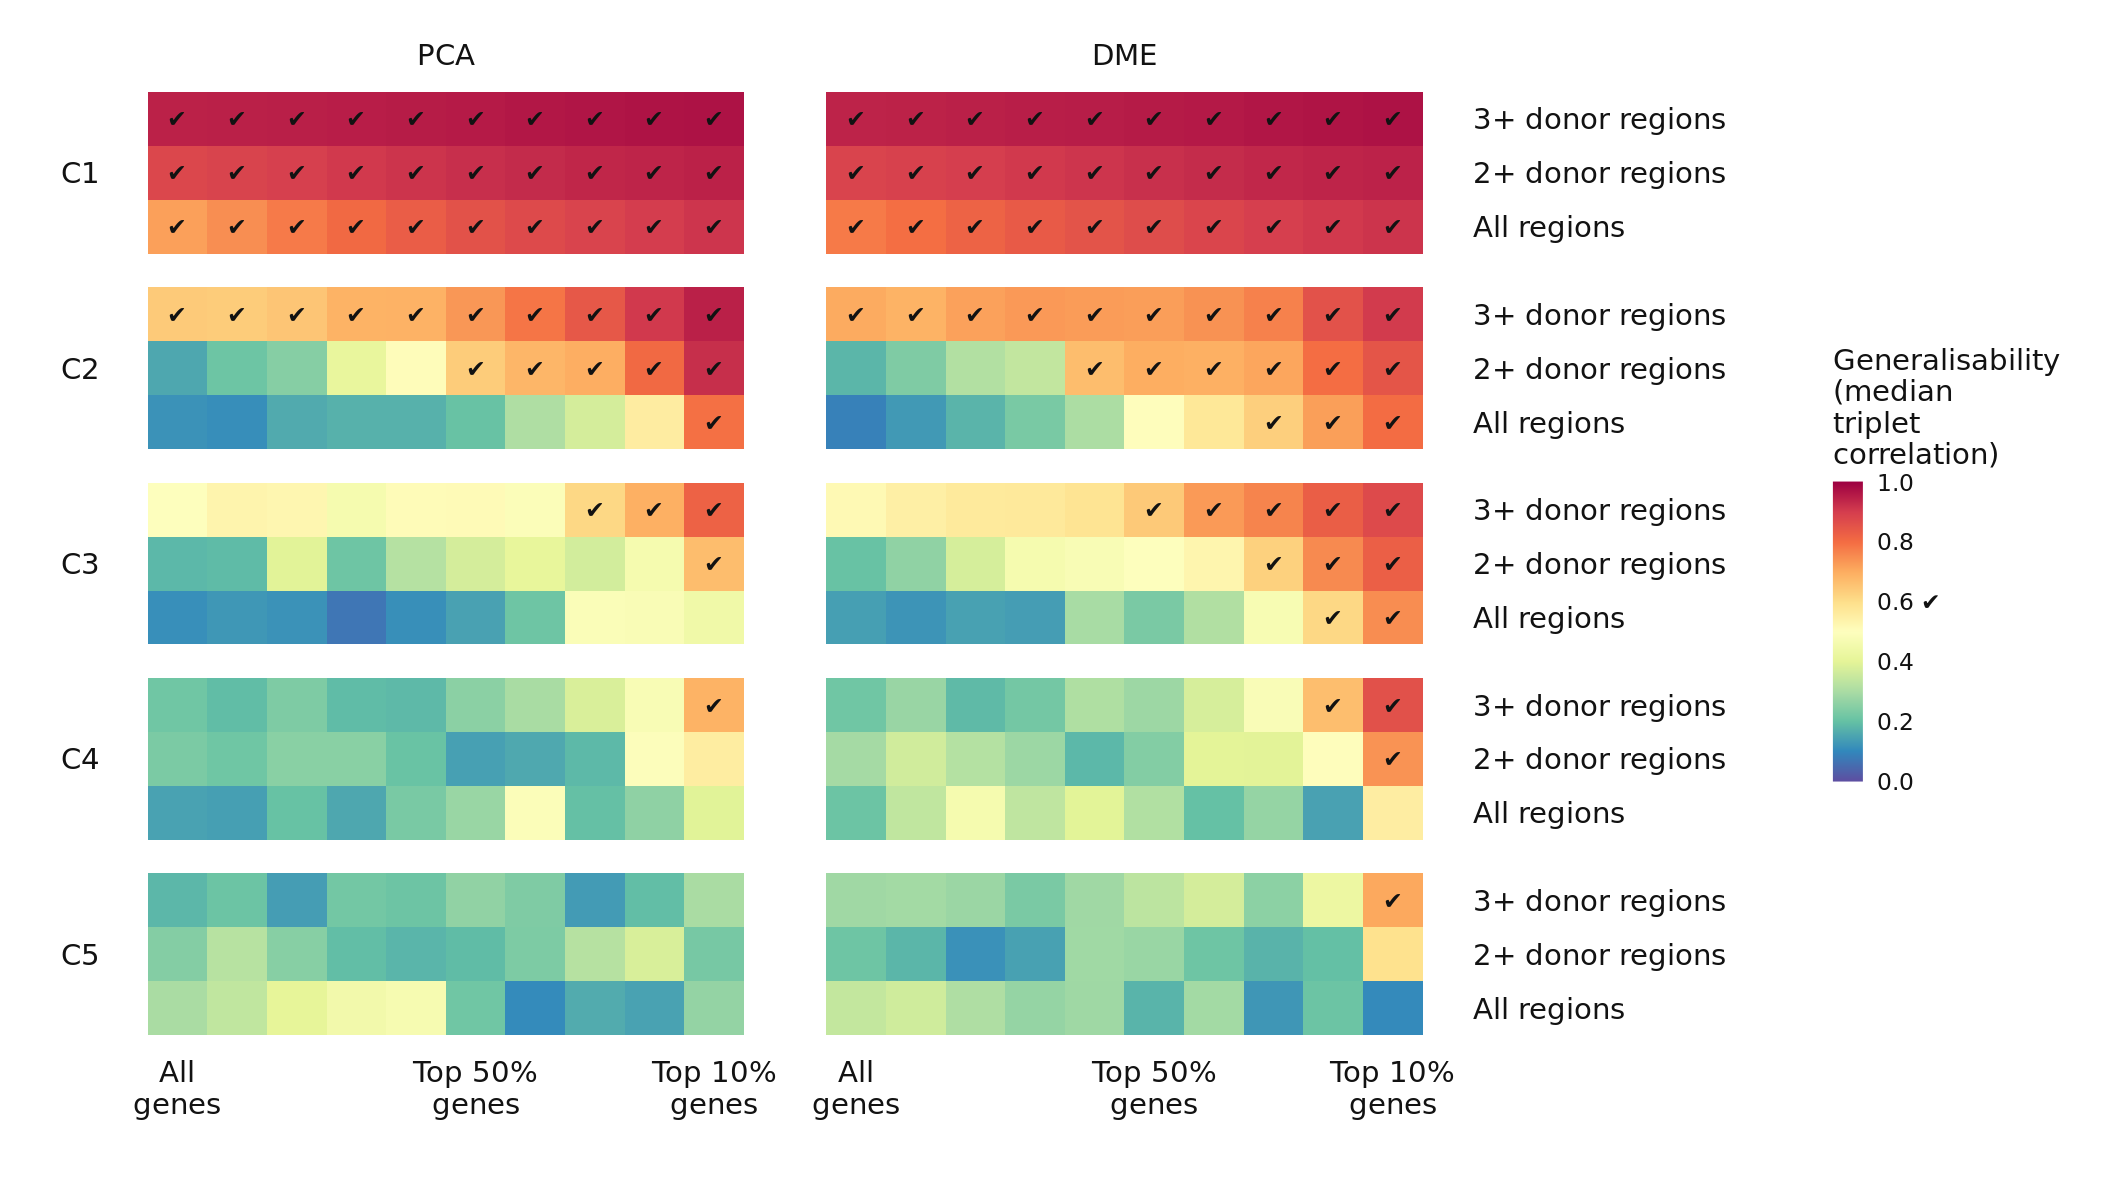

In [ ]:
%%R -w 180 -h 100 -u mm -r 300 -i triplets_raster
source("../code/fig_extended.R")
triplets_raster = plot_triplets_raster(triplets_raster, n_components=5)
triplets_raster

### Version scatter plots

In [ ]:
# get_expression_abagen(fetch_hcp(), donors_threshold=3, gene_stability_threshold=0.7, save_name='hcp_3d_ds7')

INFO: Donor-specific atlases provided; using native coords for tissue samples
INFO: Reannotating probes with information from Arnatkevic̆iūtė et al., 2019, NeuroImage
INFO: Filtering probes with intensity-based threshold of 0.5
INFO: 32669 probes survive intensity-based filtering
INFO: Reducing probes indexing same gene with method: diff_stability
INFO: 15946 genes remain after probe filtering + selection
INFO: 458 / 477 samples matched to regions for donor #9861
INFO: 346 / 367 samples matched to regions for donor #10021
INFO: 173 / 181 samples matched to regions for donor #12876
INFO: 259 / 263 samples matched to regions for donor #14380
INFO: 222 / 224 samples matched to regions for donor #15496
INFO: 231 / 240 samples matched to regions for donor #15697
INFO: Aggregating samples to regions with provided region_agg: donors


137 / 180 regions remain after filtering for regions with samples from >= 3 donors
4784 / 15946 genes remain after filtering for top 0.3 stability
Expression matrix saved to ../data/abagen-data/expression/hcp_3d_ds7.csv


gene_symbol      A1BG      AAAS     AAED1      AAK1      AARD      AARS  \
label                                                                     
1            0.234124  0.686152  0.279157  0.670004  0.694569  0.500742   
4            0.363618  0.681523  0.376047  0.713097  0.611765  0.558431   
5            0.219162  0.648171  0.253024  0.693113  0.590371  0.509893   
6            0.418642  0.633253  0.344356  0.626012  0.669849  0.472977   
8            0.312791  0.619065  0.434047  0.630902  0.546099  0.648789   
...               ...       ...       ...       ...       ...       ...   
175          0.490537  0.409748  0.423437  0.589994  0.586216  0.627218   
176          0.690689  0.441887  0.515177  0.424057  0.490759  0.426175   
177          0.691370  0.493273  0.504368  0.344129  0.450580  0.601366   
178          0.860420  0.465522  0.570640  0.275215  0.309710  0.394265   
179          0.602025  0.536149  0.729846  0.338541  0.431110  0.491745   

gene_symbol     ABCA1     ABCA5     ABCA6     ABCA9  ...   ZSCAN29   ZSCAN31  \
label                                                ...                       
1            0.455827  0.847949  0.806617  0.819410  ...  0.627291  0.784252   
4            0.451900  0.728520  0.759100  0.654380  ...  0.640444  0.756393   
5            0.390014  0.783309  0.747686  0.812496  ...  0.713580  0.685411   
6            0.479307  0.651651  0.725277  0.644479  ...  0.544879  0.608851   
8            0.467131  0.474087  0.610623  0.575041  ...  0.503053  0.422620   
...               ...       ...       ...       ...  ...       ...       ...   
175          0.377613  0.613840  0.426601  0.628341  ...  0.447971  0.583386   
176          0.584841  0.391758  0.477317  0.368153  ...  0.454877  0.451370   
177          0.534432  0.307827  0.346702  0.337571  ...  0.462090  0.526276   
178          0.558123  0.404983  0.343631  0.282857  ...  0.329404  0.416285   
179          0.630463  0.261523  0.380782  0.373276  ...  0.356189  0.453567   

gene_symbol   ZSCAN5A    ZSCAN9    ZSWIM4    ZSWIM9     ZWINT       ZYX  \
label                                                                     
1            0.220417  0.817429  0.793574  0.183059  0.387873  0.839740   
4            0.321787  0.762999  0.703900  0.207638  0.432438  0.810666   
5            0.184382  0.672967  0.815209  0.366467  0.331184  0.784044   
6            0.326790  0.637188  0.590776  0.469356  0.476248  0.684917   
8            0.658484  0.494481  0.566637  0.380324  0.405083  0.716991   
...               ...       ...       ...       ...       ...       ...   
175          0.511735  0.505436  0.536468  0.571593  0.502891  0.541865   
176          0.542929  0.375665  0.410888  0.664362  0.554143  0.337370   
177          0.583738  0.340832  0.497315  0.546639  0.561580  0.472524   
178          0.431582  0.424492  0.247514  0.595908  0.705678  0.335314   
179          0.713252  0.400518  0.275125  0.631550  0.580013  0.341723   

gene_symbol     ZZEF1      ZZZ3  
label                            
1            0.825577  0.346719  
4            0.738654  0.357823  
5            0.761205  0.309604  
6            0.768377  0.443219  
8            0.631567  0.326405  
...               ...       ...  
175          0.565517  0.382571  
176          0.439675  0.572576  
177          0.369499  0.538924  
178          0.422038  0.589355  
179          0.425138  0.658279  

[137 rows x 4784 columns]

In [ ]:
pca_3d_ds5 = gradientVersion(approach='pca').fit('hcp_3d_ds5')

New gradients version: method=pca, kernel=None, sparsity=0, data=hcp_3d_ds5


In [ ]:
versions_scores = pd.concat({
#    'PCA, all genes,\nall regions' : pca_base.clean_scores(),
   'PCA, top 50% genes,\n3+ donor regions' : pca_3d_ds5.clean_scores(),
   'dme_3d_ds5' : dme_3d_ds5.clean_scores(),
}).reset_index(level=0).rename({'level_0':'version'},axis=1)

scores_melt = (versions_scores
               .set_index(['version', 'label'])
               .melt(ignore_index=False, var_name='C', value_name='score')
               .reset_index('version')
)
df_versions_scatter = (scores_melt.join(scores_melt, lsuffix='_x', rsuffix='_y')
    .loc[lambda x: 
            (x['version_x'].str.contains('PCA, all')) & (x['version_y'].str.contains('dme_3d_ds5')) |
            (x['version_x'].str.contains('PCA, top')) & (x['version_y'].str.contains('dme_3d_ds5'))
    ]
)
df_versions_scatter.head()

version_x C_x   score_x   version_y C_y  \
label                                                                        
1      PCA, top 50% genes,\n3+ donor regions  C1  1.440649  dme_3d_ds5  C1   
1      PCA, top 50% genes,\n3+ donor regions  C1  1.440649  dme_3d_ds5  C2   
1      PCA, top 50% genes,\n3+ donor regions  C1  1.440649  dme_3d_ds5  C3   
1      PCA, top 50% genes,\n3+ donor regions  C2  0.939232  dme_3d_ds5  C1   
1      PCA, top 50% genes,\n3+ donor regions  C2  0.939232  dme_3d_ds5  C2   

        score_y  
label            
1      1.459720  
1      0.540332  
1     -0.947235  
1      1.459720  
1      0.540332

/opt/conda/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:56: UserWarning: DataFrame contains duplicated elements in the index, which will lead to loss of the row names in the resulting data.frame
  warnings.warn('DataFrame contains duplicated elements in the index, '


`summarise()` has grouped output by 'version_x', 'C_x'. You can override using
the `.groups` argument.
`geom_smooth()` using formula = 'y ~ x'


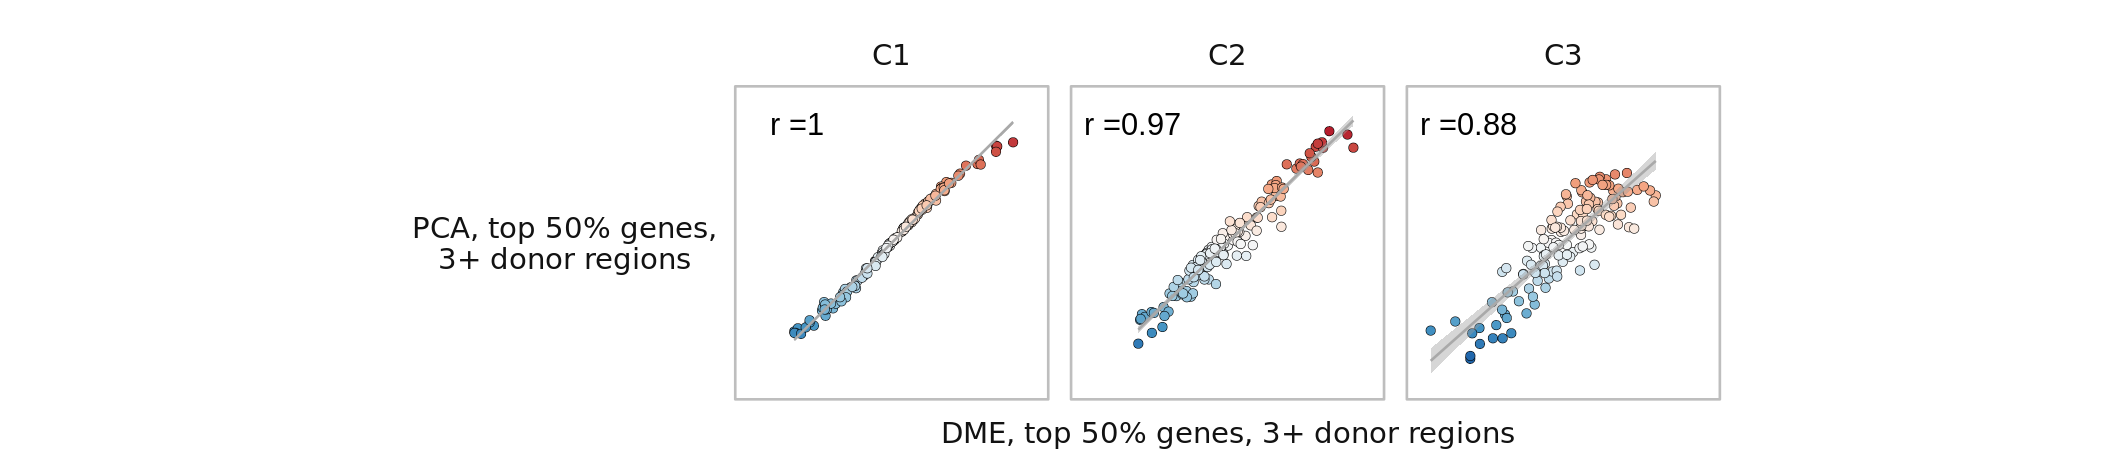

In [ ]:
%%R -w 180 -h 40 -u mm -r 300 -i df_versions_scatter
source("../code/fig_extended.R")
# all <- df_versions_scatter %>% filter(version_x %>% str_detect('all')) %>% plot_versions_scatter()
# filter <- df_versions_scatter %>% filter(version_x %>% str_detect('top')) %>% plot_versions_scatter()
# versions_scatter <- all | filter
# versions_scatter
scatter <- df_versions_scatter %>% plot_versions_scatter()
scatter

## Fig

`geom_smooth()` using formula = 'y ~ x'


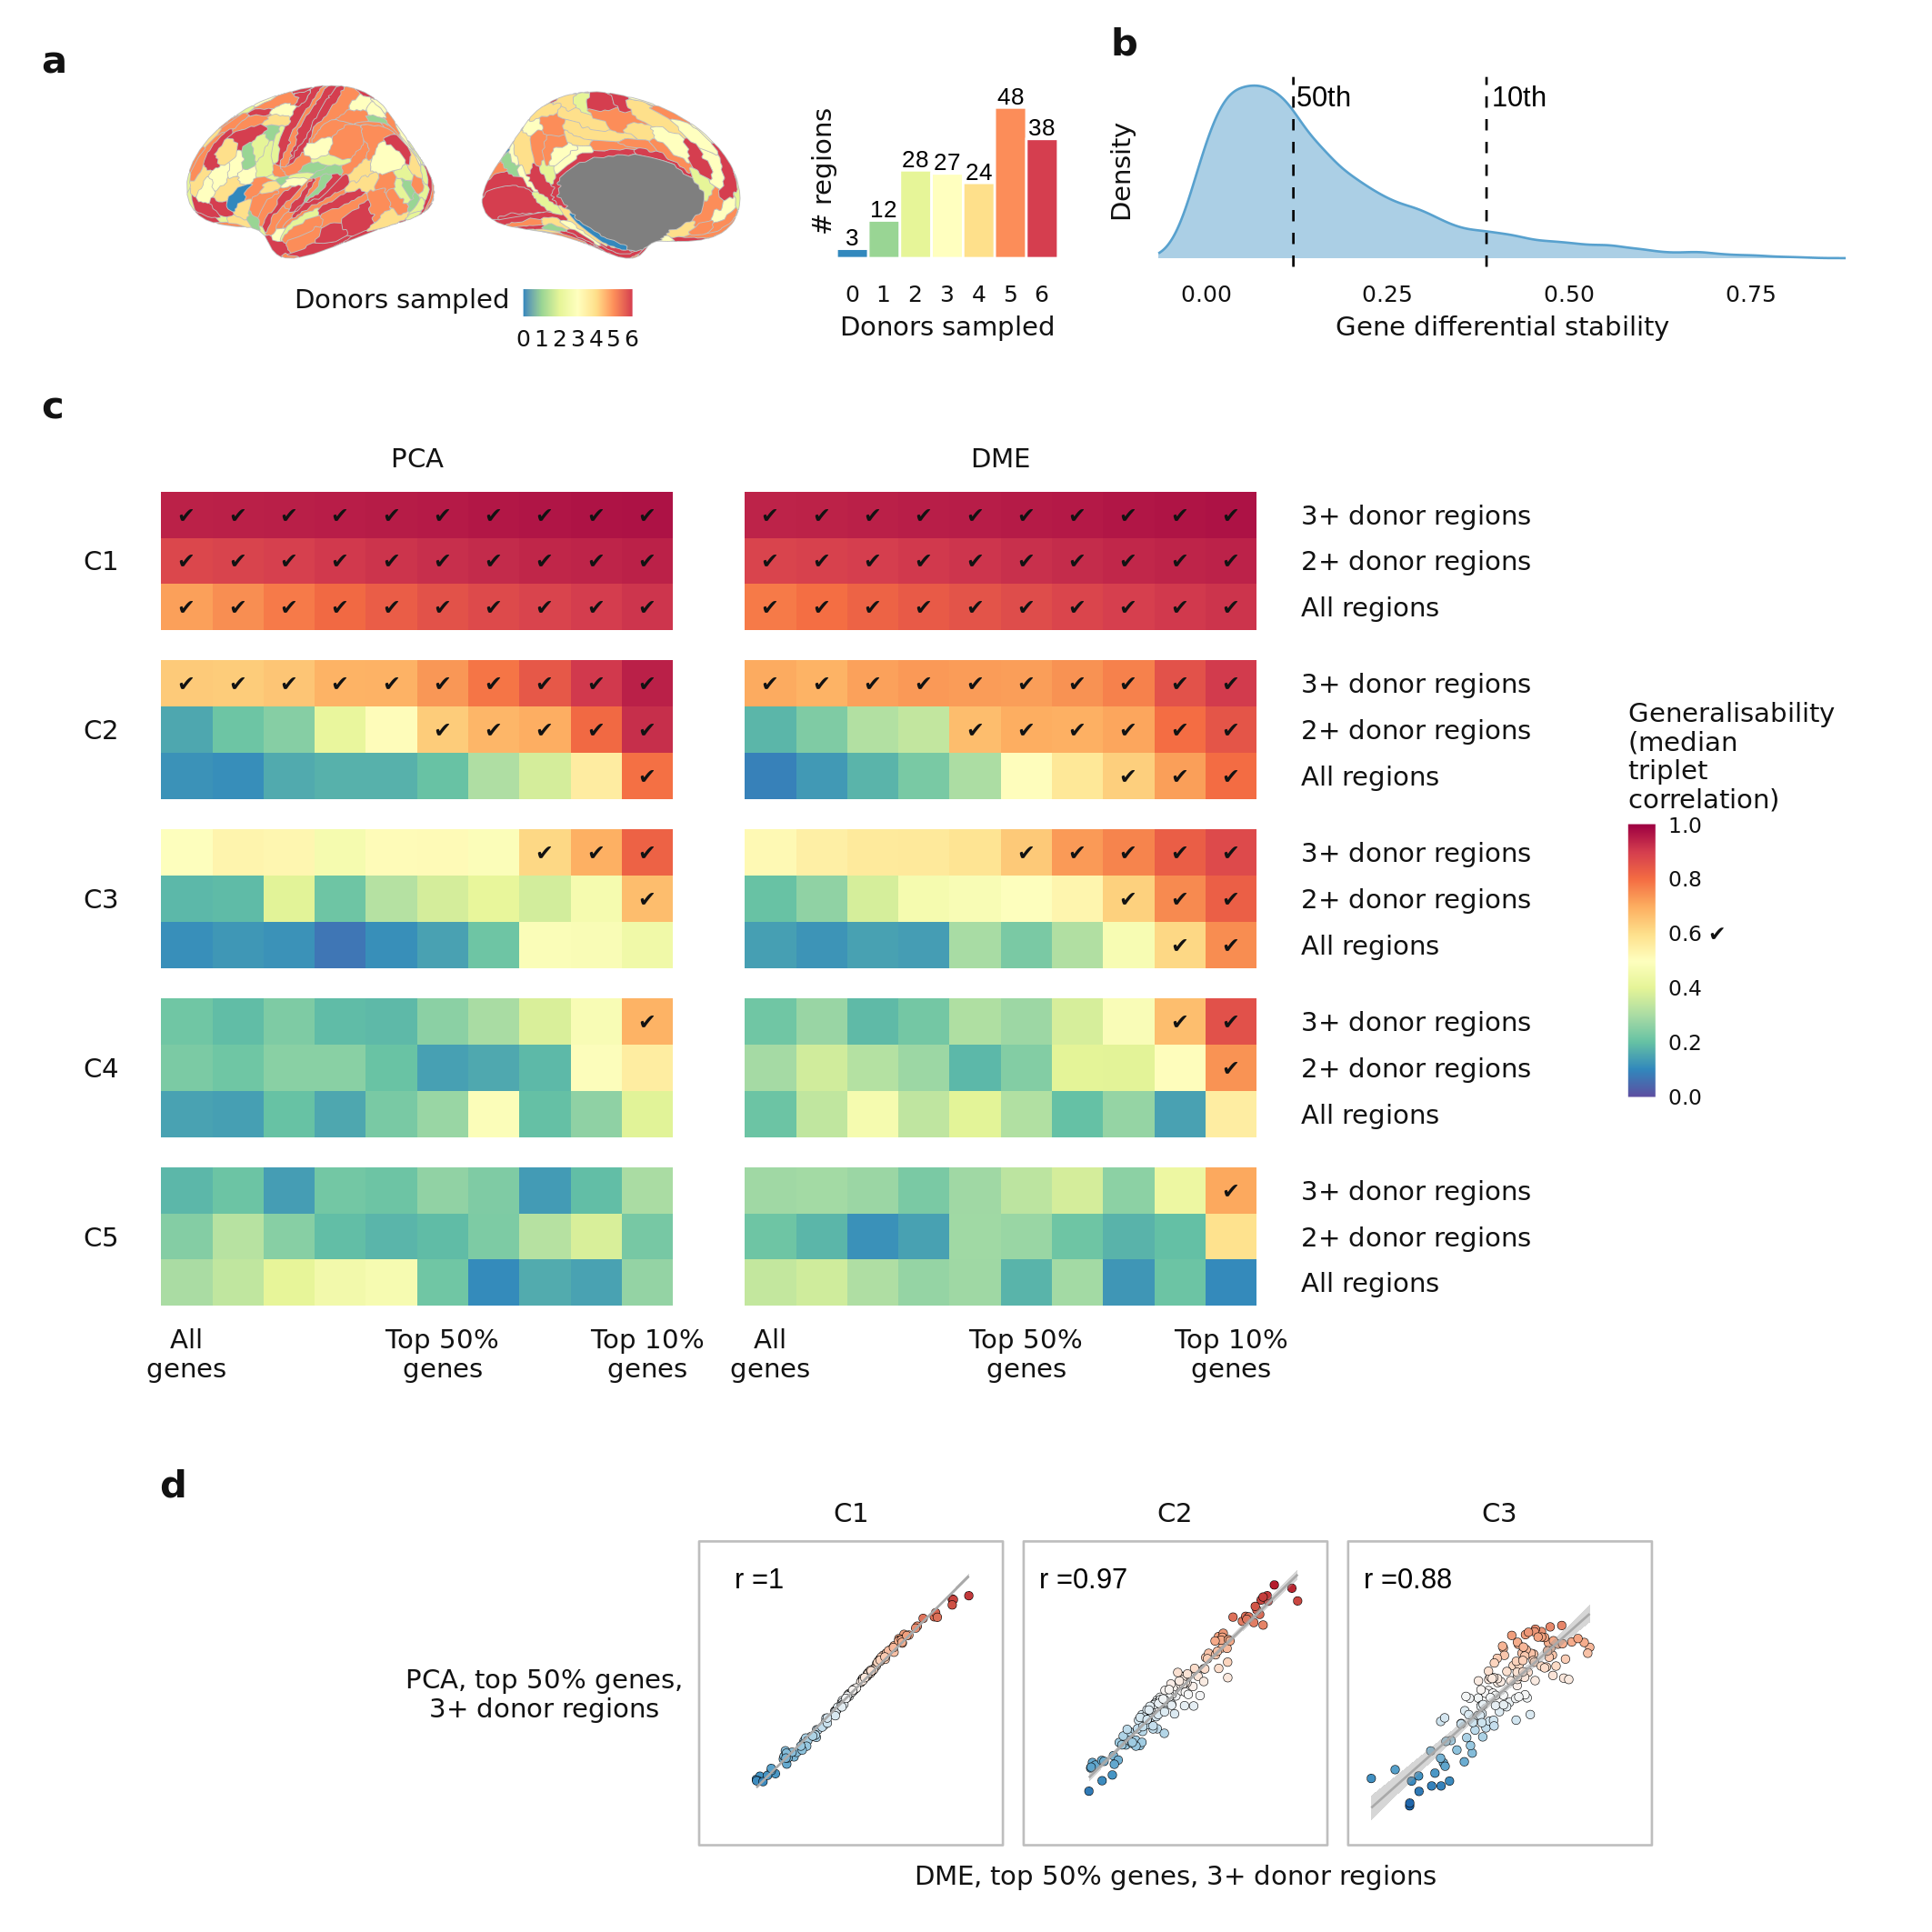

In [ ]:
%%R -i donor_counts -i stability -w 180 -h 180 -u mm -r 300
source("../code/fig_extended.R")

design <- c(
    area(t=1,b=25,l=1,r=80),
    area(t=1,b=25,l=81,r=140),
    area(t=1,b=25,l=141,r=180),
    area(t=26,b=140,l=1,r=179),
    area(t=141,b=180,l=2,r=180)
)

plot <- plot_distributions + triplets_raster + scatter + plot_layout(design=design)
plot + plot_annotation(tag_level='a')

# Extended Data Fig 2

### Parameter choices

In [ ]:
dme_3d = gradientVersion().fit('hcp_3d')

In [ ]:
dme_3d.corr_scores(dme_3d_ds5, match=True)

In [ ]:
base = get_expression_abagen(fetch_hcp(), verbose=0)

# Define variations of processing parameters to test
variations = {
    'gene_stability_threshold': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'donors_threshold': [3,2,1],
    'lr_mirror': [None],
    'ibf_threshold': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'tolerance': [0,4],
    'sim_threshold': [2],
    'agg_metric': ['median'],
    'sample_norm': [None, 'center', 'zscore', 'rs'],
    'gene_norm': [None, 'center', 'zscore', 'rs'],
    'probe_selection': ['max_intensity', 'mean', 'rnaseq']
}
defaults = {
    'gene_stability_threshold': 0.0,
    'donors_threshold': 0,
    'lr_mirror': 'bidirectional',
    'ibf_threshold': 0.5,
    'tolerance': 2,
    'probe_selection': 'diff_stability',
    'sim_threshold': None,
    'agg_metric': 'mean',
    'sample_norm': 'srs',
    'gene_norm': 'srs'
}

# Reset if desired
robustness_data = {}
# robustness_data = robustness_data_3d_ds5

# Process data with one parameter varied, and save
for parameter, values in variations.items():
    print(f'--- Processing values of {parameter} ---')
    robustness_data[parameter] = {}
    for v in values:
        # Reset kwargs to default values
        kwargs = defaults.copy()
        # Update one value
        kwargs[parameter] = v
        exp = get_expression_abagen(fetch_hcp(), verbose=0, **kwargs)
        robustness_data[parameter][v] = exp
        print(f'Done {parameter}={v}')

# For each parameter, insert the default data as base
for parameter, default_value in defaults.items():
    robustness_data[parameter][default_value] = base

save_pickle(robustness_data, 'robustness_data_base')

In [1064]:
# save_pickle(robustness_data, 'robustness_data_base')
# save_pickle(robustness_data, 'robustness_data_3d_ds8')
# save_pickle(robustness_data, 'robustness_data_3d_ds5')
# save_pickle(robustness_data, 'robustness_data_ds8')
# robustness_data_base = load_pickle('robustness_data_base')
# robustness_data_3d_ds8 = load_pickle('robustness_data_3d_ds8')
robustness_data_3d_ds5 = load_pickle('robustness_data_3d_ds5')
# robustness_data_ds8 = load_pickle('robustness_data_ds8')

In [1371]:
def get_robustness_corrs(base_model, robustness_data, approach='pca', test_dme_robustness=False):
    robustness_corrs = {}
    for parameter, values in robustness_data.items():
        robustness_corrs[parameter] = {}
        for value, data in values.items():
            name_to_print = f'{parameter}:{value}'
            model = gradientVersion(approach=approach).fit(data, message=False)
            # corrs = model.corr_scores(base_model, match=True)['corr']
            corrs = pd.Series(np.diag(model.corr_scores(base_model, match=False)))
            robustness_corrs[parameter][value] = np.abs(corrs)
            print(f"Compared components with {name_to_print}")
    
    # test base model against variations of DME parameters
    if test_dme_robustness:
        robustness_corrs['alpha'] = {}
        for alpha in [0,0.5]:
            name_to_print = f'alpha:{alpha}'
            data = base_model.expression
            model = gradientVersion(approach=approach, alpha=alpha).fit(data, message=False)
            corrs = pd.Series(np.diag(model.corr_scores(base_model, match=False)))
            robustness_corrs['alpha'][alpha] = np.abs(corrs)
            print(f"Compared components with {name_to_print}")

        robustness_corrs['kernel'] = {}
        for kernel in ['gaussian', 'cosine', 'pearson']:
            name_to_print = f'kernel:{kernel}'
            data = base_model.expression
            model = gradientVersion(approach=approach, kernel=kernel).fit(data, message=False)
            corrs = pd.Series(np.diag(model.corr_scores(base_model, match=False)))
            robustness_corrs['kernel'][kernel] = np.abs(corrs) 
            print(f"Compared components with {name_to_print}")
            
    return robustness_corrs

In [1372]:
# pca_base = gradientVersion(approach='pca').fit(get_expression_abagen(fetch_hcp(), lr_mirror='bidirectional'))

INFO: Donor-specific atlases provided; using native coords for tissue samples
INFO: Reannotating probes with information from Arnatkevic̆iūtė et al., 2019, NeuroImage
INFO: Filtering probes with intensity-based threshold of 0.5
INFO: 32669 probes survive intensity-based filtering
INFO: Reducing probes indexing same gene with method: diff_stability


KeyboardInterrupt: 

In [1373]:
robustness_corrs = {
    # 'pca_base': get_robustness_corrs(pca_base, robustness_data_base, approach='pca'),
    'dme_3d_ds5': get_robustness_corrs(dme_3d_ds5, robustness_data_3d_ds5, approach='dm', test_dme_robustness=True),
}

Compared components with gene_stability_threshold:0.0
Compared components with gene_stability_threshold:0.1
Compared components with gene_stability_threshold:0.2
Compared components with gene_stability_threshold:0.3
Compared components with gene_stability_threshold:0.4
Compared components with gene_stability_threshold:0.5
Compared components with gene_stability_threshold:0.6
Compared components with gene_stability_threshold:0.7
Compared components with gene_stability_threshold:0.8
Compared components with gene_stability_threshold:0.9
Compared components with donors_threshold:3
Compared components with donors_threshold:2
Compared components with donors_threshold:1
Compared components with lr_mirror:None
Compared components with ibf_threshold:0.0
Compared components with ibf_threshold:0.2
Compared components with ibf_threshold:0.5
Compared components with ibf_threshold:0.8
Compared components with tolerance:0
Compared components with tolerance:4
Compared components with probe_selection:m

In [1374]:
robustness = {}
for version_name, version_corrs in robustness_corrs.items():
    version_dict = {param:pd.concat(value_corrs) for param, value_corrs in version_corrs.items()}
    robustness[version_name] = pd.concat(version_dict)
robustness = (pd.concat(robustness)
  .reset_index()
  .set_axis(['version','parameter', 'value', 'C', 'corr'], axis=1)
  .assign(value = lambda x: x['value'].astype('str'))
)
robustness

version                 parameter    value  C      corr
0    dme_3d_ds5  gene_stability_threshold      0.0  0  0.998004
1    dme_3d_ds5  gene_stability_threshold      0.0  1  0.962967
2    dme_3d_ds5  gene_stability_threshold      0.0  2  0.930381
3    dme_3d_ds5  gene_stability_threshold      0.0  3  0.789323
4    dme_3d_ds5  gene_stability_threshold      0.0  4  0.839688
..          ...                       ...      ... ..       ...
185  dme_3d_ds5                    kernel  pearson  0  0.076049
186  dme_3d_ds5                    kernel  pearson  1  0.053641
187  dme_3d_ds5                    kernel  pearson  2  0.063754
188  dme_3d_ds5                    kernel  pearson  3  0.070229
189  dme_3d_ds5                    kernel  pearson  4  0.084060

[190 rows x 5 columns]

In [1377]:
# Remove identity rows
# drops = [
#   ('pca_hcp_3d_ds8','gene_stability_threshold',0.8),
#   ('dm_hcp_3d_ds5','gene_stability_threshold',0.5),
#   ('dm_hcp_ds8','gene_stability_threshold',0.8),
#   ('pca_hcp_3d_ds8','donors_threshold',3),
#   ('dm_hcp_3d_ds5','donors_threshold',3),
#   ('dm_hcp_ds8','donors_threshold',1)
# ]

robustness = {}
for version_name, version_corrs in robustness_corrs.items():
    version_dict = {param:pd.concat(value_corrs) for param, value_corrs in version_corrs.items()}
    robustness[version_name] = pd.concat(version_dict)
robustness = (pd.concat(robustness)
  # .drop(index=drops)
  .reset_index()
  .set_axis(['version','parameter', 'value', 'C', 'corr'], axis=1)
  .assign(value = lambda x: x['value'].astype('str'))
)
# robustness


# Replace names of some value parameters for plot
robustness['value'] = robustness['value'].replace({'nan':'none',})
robustness.loc[lambda x: x['parameter']=='gene_stability_threshold', 'value'] = \
  robustness.loc[lambda x: x['parameter']=='gene_stability_threshold', 'value'] \
  .apply(lambda ds: f'top {100-round(float(ds)*100)}%').replace({'top 100%':'all genes'})

robustness.loc[lambda x: x['parameter']=='donors_threshold', 'value'] = \
  robustness.loc[lambda x: x['parameter']=='donors_threshold', 'value'] \
  .replace({'1':'all regions', '2': '2+ donors', '3': '3+ donors'})

# Replace parameter names for plot
parameter_names = {
    'gene_stability_threshold': 'Differential stability\ngene filter',
    'donors_threshold': 'Donors/region filter',
    'lr_mirror': 'Right hemi samples\nDefault: mirror',
    'ibf_threshold': 'Gene intensity filter\nDefault: 0.5',
    'sim_threshold': 'Probe similarity threshold\nDefault: none',
    'probe_selection': 'Probe-to-gene selection\nDefault: differential stability',
    'tolerance': 'Sample-to-region \nmatching tolerance\nDefault: 2',
    'agg_metric': 'Sample-to-region aggregation\nDefault: mean',
    'sample_norm': 'Sample normalization\nDefault: scaled robust sigmoid',
    'gene_norm': 'Gene normalization\nDefault: scaled robust sigmoid',
    'kernel': 'DME kernel parameter\nDefault: normalized cosine',
    'alpha': 'DME alpha parameter\nDefault: 1',
}
robustness['parameter'] = pd.Categorical(robustness['parameter'].map(parameter_names),
                          categories=parameter_names.values(), ordered=True)

# Replace version names for plot
version_names = {
    'pca_base': 'PCA, all genes,\nall regions',
    'dme_3d_ds5': 'DME, 50% genes,\n3+ donor regions'
}
robustness['version'] = robustness['version'].map(version_names)
robustness['value'] = pd.Categorical(robustness['value'], 
                      categories=robustness['value'].unique(), ordered=True)
robustness = robustness.sort_values(['parameter', 'value'])

# Identify self rows
robustness['self'] = False
robustness.loc[lambda x: (x['version'].str.contains('PCA')) & 
                         (x['parameter'].str.contains('gene filter')) & 
                         (x['value'].str.contains('top 20%')),
               'self'] = True
robustness.loc[lambda x: (x['version'].str.contains('DME, 50%')) & 
                         (x['parameter'].str.contains('gene filter')) & 
                         (x['value'].str.contains('top 50%')),
               'self'] = True
robustness.loc[lambda x: (x['version'].str.contains('DME, 20%')) & 
                         (x['parameter'].str.contains('gene filter')) & 
                         (x['value'].str.contains('top 20%')),
               'self'] = True
robustness.loc[lambda x: (x['version'].str.contains('PCA')) & 
                         (x['parameter'].str.contains('Donors/region')) & 
                         (x['value'].str.contains('3+')),
               'self'] = True
robustness.loc[lambda x: (x['version'].str.contains('DME, 50%')) & 
                         (x['parameter'].str.contains('Donors/region')) & 
                         (x['value'].str.contains('3+')),
               'self'] = True
robustness.loc[lambda x: (x['version'].str.contains('DME, 20%')) & 
                         (x['parameter'].str.contains('Donors/region')) & 
                         (x['value'].str.contains('all regions')),
               'self'] = True

# Filter for plot
robustness = (robustness
              .loc[lambda x: x['version'] == 'DME, 50% genes,\n3+ donor regions']
              .loc[lambda x: x['parameter'] != 'Probe similarity threshold\nDefault: none']
)

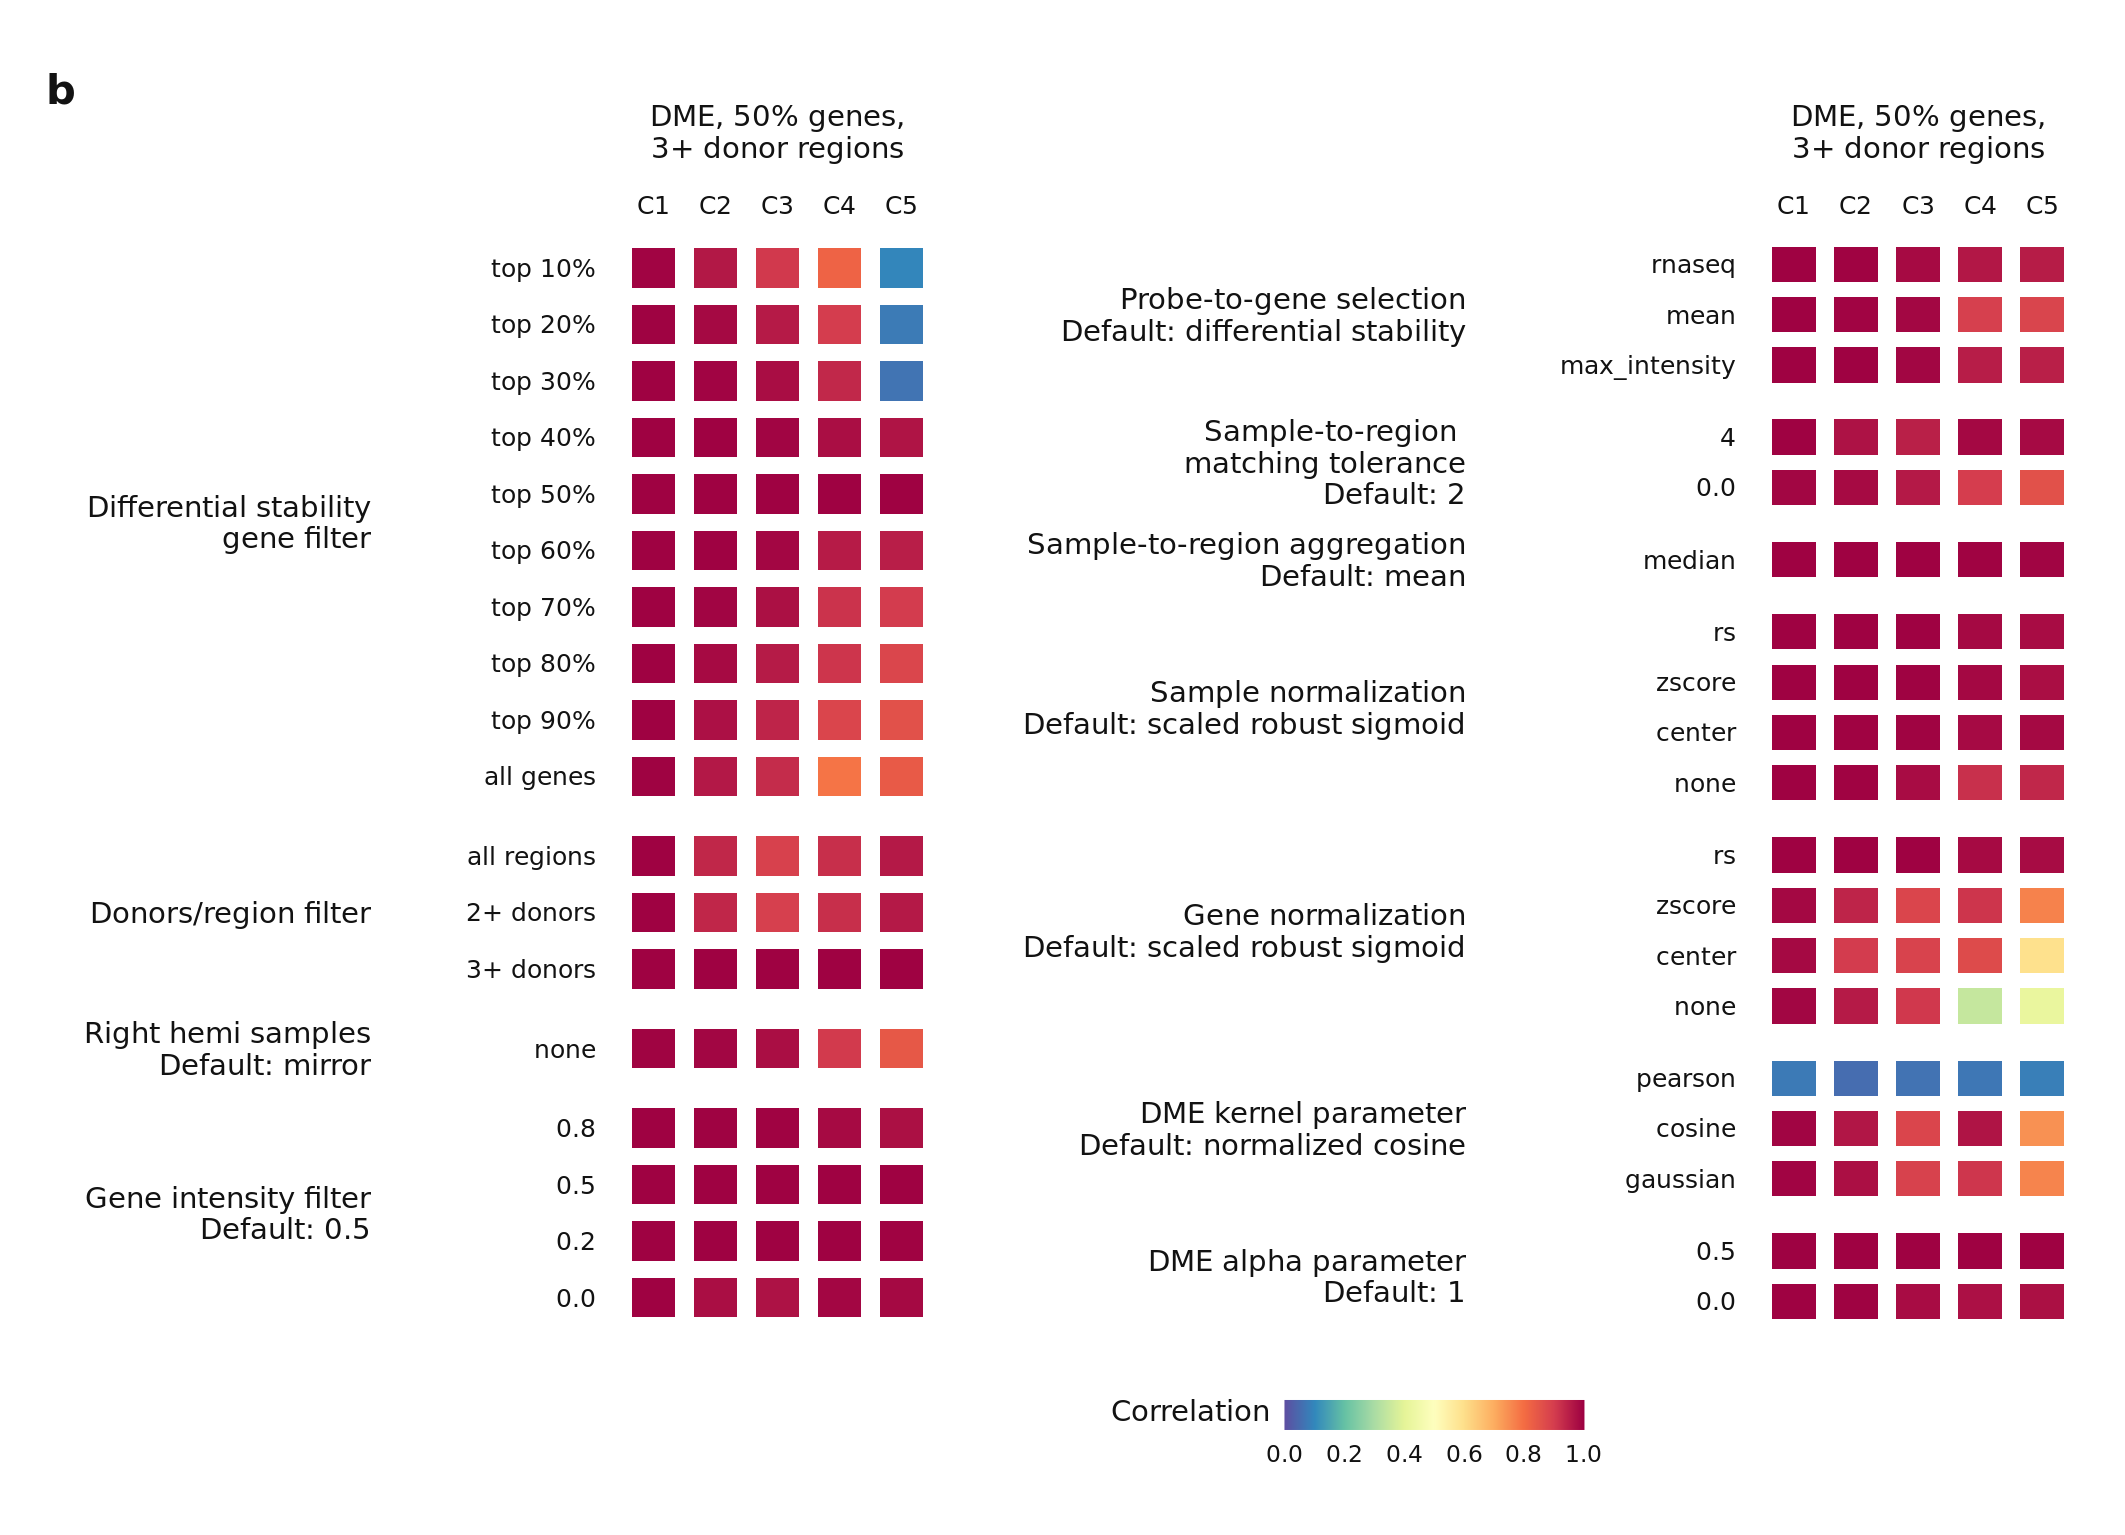

In [1378]:
%%R -w 180 -h 130 -r 300 --units mm -i robustness
# robustness %>% filter(grepl('Gene', parameter))
robustness <- robustness %>%
mutate(version = factor(version, ordered=T, levels=unique(.$version))) %>%
mutate(parameter = factor(parameter, ordered=T, levels=unique(.$parameter))) %>%
mutate(value = factor(value, ordered=T, levels=unique(.$value))) %>%
mutate(C = factor(C, levels=c(0,1,2,3,4), labels=c('C1','C2','C3','C4','C5')))

parameters_left <- c(
  'Differential stability\ngene filter',
  'Donors/region filter',
  'Right hemi samples\nDefault: mirror',
  'Gene intensity filter\nDefault: 0.5'
)

plot_robustness <- function(robustness) {
    robustness %>% 
    ggplot(aes(x=C, y=value, fill=corr)) + 
    facet_grid(parameter~version, scales='free_y', space='free', switch='y') + #, scales='free_x', switch='x') + 
    geom_tile(aes(alpha=self), width=.7, height=.7) + #, color='grey50', size=.5) +
    # geom_text(aes(label='★'), data=robustness %>% filter(corr>0.6), color='gray30', size=5) +
    scale_alpha_manual(values=c(1,1), guide='none') +
    scale_fill_gradientn(
            colors=rev(brewer.spectral(100)),
          #   colors=cubicl(100),
            limits=c(0,1.001), breaks=seq(0,1,.2),
            oob = squish,
            labels=c('0.0', '0.2', '0.4', '0.6', '0.8', '1.0'),
            name='Correlation'
    ) +
    coord_cartesian(clip='off') +
    scale_x_discrete(position='top') +
    # guides(fill=guide_colorbar(barwidth=20)) +
    guides(fill=guide_colorbar(barwidth=5, barheight=0.5, ticks=FALSE, title.vjust=1)) +
    ylab('') + xlab('') +
    theme_minimal() +
    theme(
      text=element_text(size=7, family='Calibri', color='grey7'),
      axis.text=element_text(size=6, family='Calibri', color='grey7'),
      panel.grid=element_blank(),
      panel.spacing=unit(1,'mm'),
      legend.position='bottom',
      strip.placement='outside',
      strip.text.x=element_text(size=7, family='Calibri', color='grey7'),
      strip.text.y.left=element_text(size=7, family='Calibri', color='grey7', 
                  angle=0, hjust=1, margin=margin(r=20)),
      plot.tag.position = c(0, .97),
      plot.tag = element_text(size=10, face='bold', family='Calibri', hjust=0, color='grey7')
      # plot.margin=margin(l=10,r=30,t=10,b=10)
    )
}

robustness_left <- robustness %>% filter(parameter %in% parameters_left) %>% plot_robustness + labs(tag='b')
robustness_right <- robustness %>% filter(!(parameter %in% parameters_left)) %>% plot_robustness
 
g_robustness <- (robustness_left | robustness_right) + plot_layout(guides='collect')
g_robustness

### Parcellation

In [1040]:
# get_expression_abagen(fetch_dk(), donors_threshold=3, gene_stability_threshold=0.5, save_name='dk_3d_ds5')
# get_expression_abagen(fetch_dx(), donors_threshold=3, gene_stability_threshold=0.5, save_name='dx_3d_ds5')
# get_expression_abagen(fetch_schaefer(size=400), donors_threshold=3, gene_stability_threshold=0.5, save_name='s400_3d_ds5')

INFO: Donor-specific atlases provided; using native coords for tissue samples
INFO: Reannotating probes with information from Arnatkevic̆iūtė et al., 2019, NeuroImage
INFO: Filtering probes with intensity-based threshold of 0.5
INFO: 32669 probes survive intensity-based filtering
INFO: Reducing probes indexing same gene with method: diff_stability
INFO: 15946 genes remain after probe filtering + selection
INFO: 460 / 477 samples matched to regions for donor #9861
INFO: 346 / 367 samples matched to regions for donor #10021
INFO: 179 / 181 samples matched to regions for donor #12876
INFO: 261 / 263 samples matched to regions for donor #14380
INFO: 223 / 224 samples matched to regions for donor #15496
INFO: 235 / 240 samples matched to regions for donor #15697
INFO: Aggregating samples to regions with provided region_agg: donors


33 / 69 regions remain after filtering for regions with samples from >= 3 donors
4784 / 15946 genes remain after filtering for top 0.3 stability
Expression matrix saved to ../data/abagen-data/expression/dk_3d_ds7.csv


INFO: Donor-specific atlases provided; using native coords for tissue samples
INFO: Reannotating probes with information from Arnatkevic̆iūtė et al., 2019, NeuroImage
INFO: Filtering probes with intensity-based threshold of 0.5
INFO: 32669 probes survive intensity-based filtering
INFO: Reducing probes indexing same gene with method: diff_stability
INFO: 15946 genes remain after probe filtering + selection
INFO: 460 / 477 samples matched to regions for donor #9861
INFO: 346 / 367 samples matched to regions for donor #10021
INFO: 179 / 181 samples matched to regions for donor #12876
INFO: 261 / 263 samples matched to regions for donor #14380
INFO: 223 / 224 samples matched to regions for donor #15496
INFO: 235 / 240 samples matched to regions for donor #15697
INFO: Aggregating samples to regions with provided region_agg: donors


33 / 69 regions remain after filtering for regions with samples from >= 3 donors
3190 / 15946 genes remain after filtering for top 0.2 stability
Expression matrix saved to ../data/abagen-data/expression/dk_3d_ds8.csv


gene_symbol      A1BG     ABCA6     ABCA9     ABCC1    ABCC12     ABCC6  \
label                                                                     
1            0.466261  0.502016  0.529000  0.578403  0.588101  0.509327   
2            0.621202  0.377459  0.424607  0.310352  0.219332  0.490775   
3            0.531708  0.536333  0.545548  0.525847  0.695947  0.519386   
4            0.327959  0.765143  0.706637  0.700680  0.282282  0.167629   
5            0.708189  0.403196  0.530491  0.349112  0.296955  0.679258   
6            0.618361  0.423677  0.457685  0.441901  0.542940  0.557602   
7            0.384924  0.531424  0.625903  0.543789  0.554929  0.470779   
8            0.607224  0.390198  0.444563  0.418196  0.659162  0.623952   
9            0.386225  0.559015  0.617566  0.532430  0.351473  0.617116   
10           0.309511  0.719985  0.709199  0.680820  0.433002  0.261599   
11           0.674568  0.394774  0.361187  0.447278  0.726558  0.498685   
12           0.311480  0.697796  0.742861  0.679023  0.310346  0.327769   
13           0.672240  0.291205  0.308479  0.333801  0.732567  0.615731   
14           0.640148  0.395771  0.398958  0.392086  0.650083  0.624244   
15           0.678880  0.475147  0.506129  0.419844  0.440420  0.641710   
16           0.375124  0.545673  0.593686  0.562837  0.445883  0.472377   
17           0.515014  0.471699  0.464964  0.440385  0.686800  0.556585   
18           0.562022  0.393034  0.464073  0.465726  0.689987  0.542203   
19           0.518745  0.538929  0.444086  0.461267  0.657916  0.540369   
20           0.300374  0.870050  0.821243  0.801825  0.193803  0.221928   
21           0.345234  0.621918  0.585202  0.543647  0.411114  0.417499   
22           0.433568  0.456459  0.549471  0.466511  0.458437  0.571044   
23           0.411641  0.575702  0.507603  0.575575  0.512681  0.528020   
24           0.447735  0.574850  0.601298  0.559918  0.552260  0.446117   
25           0.582460  0.252705  0.317191  0.314217  0.462745  0.617533   
26           0.527653  0.457761  0.454737  0.486784  0.708830  0.523816   
27           0.527797  0.456773  0.467996  0.482866  0.633043  0.539307   
28           0.346797  0.555663  0.604985  0.565725  0.545827  0.454608   
29           0.658799  0.414606  0.423868  0.441789  0.603858  0.509269   
30           0.376772  0.410190  0.550636  0.472353  0.631113  0.579700   
32           0.726023  0.098439  0.564497  0.293905  0.308201  0.836588   
33           0.484084  0.647386  0.601304  0.623340  0.331477  0.370943   
34           0.714936  0.370641  0.381221  0.406268  0.410042  0.469114   

gene_symbol     ABCC8     ABCG4     ABCG5   ABHD12B  ...     ZNRF1    ZRANB3  \
label                                                ...                       
1            0.568392  0.564823  0.409405  0.545998  ...  0.514137  0.534718   
2            0.257265  0.301345  0.552878  0.456975  ...  0.461979  0.477593   
3            0.569550  0.553402  0.715543  0.670401  ...  0.480788  0.455645   
4            0.795858  0.646799  0.388741  0.178147  ...  0.271263  0.210956   
5            0.082266  0.290737  0.301913  0.227273  ...  0.778370  0.482179   
6            0.427091  0.422130  0.351824  0.364727  ...  0.606022  0.560999   
7            0.577660  0.584306  0.371374  0.452795  ...  0.430021  0.399776   
8            0.441743  0.379617  0.393004  0.389317  ...  0.629672  0.546521   
9            0.526707  0.576097  0.486478  0.403974  ...  0.312580  0.386514   
10           0.770580  0.655149  0.334098  0.265687  ...  0.319179  0.327169   
11           0.501602  0.406850  0.671495  0.660623  ...  0.610235  0.714156   
12           0.724066  0.671569  0.310272  0.220614  ...  0.340895  0.322344   
13           0.463230  0.371405  0.617731  0.632165  ...  0.649198  0.710447   
14           0.413904  0.402319  0.440838  0.438647  ...  0.559748  0.607503   
15           0.277340  0.312906  0.372237  0.253068  ...  0.772131  0.613469   
16           0

In [1058]:
dme_dk_3d_ds5 = gradientVersion(approach='dm').fit('dk_3d_ds5')
dme_dx_3d_ds5 = gradientVersion(approach='dm').fit('dx_3d_ds5')
dme_s400_3d_ds5 = gradientVersion(approach='dm').fit('s400_3d_ds5')

New gradients version: method=dm, kernel=normalized_angle, sparsity=0, data=dk_3d_ds5
New gradients version: method=dm, kernel=normalized_angle, sparsity=0, data=dx_3d_ds5
New gradients version: method=dm, kernel=normalized_angle, sparsity=0, data=s400_3d_ds5


In [1059]:
hcp_scores = dme_3d_ds5.clean_scores()
dk_scores  = dme_dk_3d_ds5.clean_scores()
dx_scores  = dme_dx_3d_ds5.clean_scores()
s400_scores = (dme_s400_3d_ds5.scores
               .iloc[:,:3].set_axis(['C1','C2','C3'],axis=1)
               .apply(lambda x: (x-np.mean(x))/np.std(x))
               .join(get_labels_schaefer(size=400).drop_duplicates())
            )

In [1061]:
corrs_dict = {
    'HCP-MMP': correlate(dme_3d_ds5.weights, dme_3d_ds5.weights),
    'Schaefer-400': correlate(dme_s400_3d_ds5.weights, dme_3d_ds5.weights),
    'Destrieux': correlate(dme_dx_3d_ds5.weights, dme_3d_ds5.weights),    
    'Desikan-Killiany': correlate(dme_dk_3d_ds5.weights, dme_3d_ds5.weights),
}

weight_corrs = (pd.concat(corrs_dict)
 .melt(ignore_index=False)
 .reset_index()
 .set_axis(['version','x','y','corr'], axis=1)
 .assign(comparison = 'HCP-MMP')
)

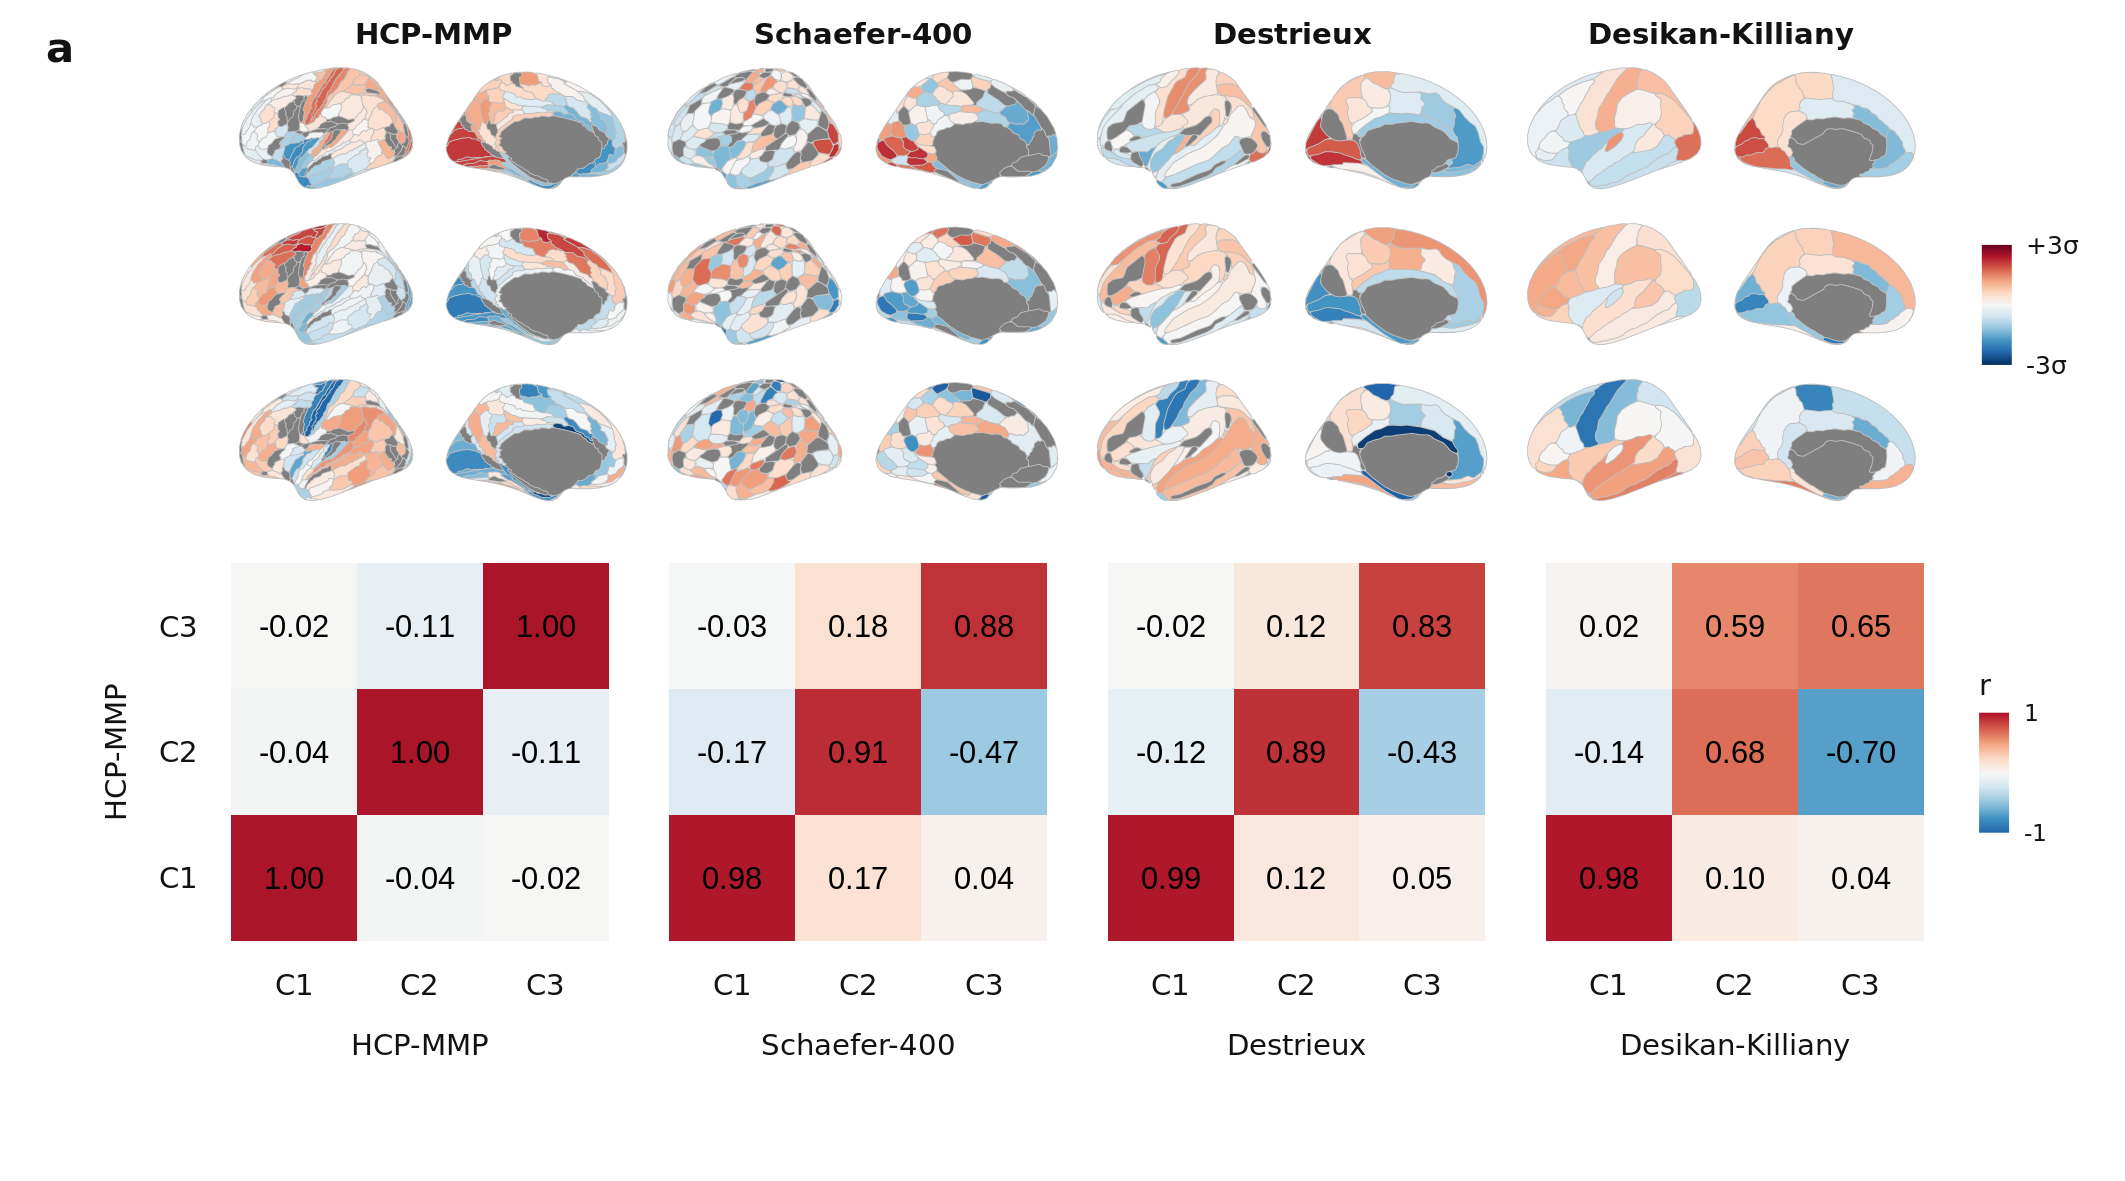

In [1063]:
%%R -w 180 -h 100 -u mm -r 300 -i hcp_scores -i dk_scores -i dx_scores -i s400_scores -i weight_corrs
source("../code/fig_extended.R")

brain_hcp <- plot_brains(hcp_scores, facet='v', atlas='hcp') + ggtitle('HCP-MMP') + labs(tag='a')
brain_s400 <- plot_brains(s400_scores, facet='v', atlas='s400') + ggtitle('Schaefer-400')
brain_dx <- plot_brains(dx_scores, facet='v', atlas='dx') + ggtitle('Destrieux')
brain_dk <- plot_brains(dk_scores, facet='v', atlas='dk') + ggtitle('Desikan-Killiany')

brains <- brain_hcp + brain_s400 + brain_dx + brain_dk + plot_layout(ncol=4, guides='collect') & theme(legend.position='right')
heatmaps <- plot_weight_heatmaps(weight_corrs, spacing=3, ylab='HCP-MMP')

g_parcellation <- brains / heatmaps
g_parcellation

# Extended Data Fig 3

### 3D plot with components as axes

In [985]:
def get_xyz_corrs(version):
    hcp_xyz = fetch_hcp()['info'].loc[:180,['id','x-cog','y-cog','z-cog']].set_index('id').set_axis(['x','y','z'],axis=1)
    corrs = version.clean_scores().join(hcp_xyz).corr().iloc[3:,:3]
    return corrs.apply(lambda x: x * [1,-1,1], axis=0)

xyz_corrs = get_xyz_corrs(dme_3d_ds5)

In [1398]:
xyz_corrs_plot = (xyz_corrs
                  .applymap(lambda x: np.round(x,2))
                  .loc[['y','z','x'],:]
                  .set_axis([
                      'Anterior-to-Posterior',
                      'Ventral-to-Dorsal',
                      'Medial-to-Lateral'
                  ], axis=0)
                  )
xyz_corrs_plot

C1    C2    C3
Anterior-to-Posterior  0.64 -0.50  0.03
Ventral-to-Dorsal      0.54  0.58 -0.16
Medial-to-Lateral      0.03 -0.08  0.38

In [987]:
xyz_corrs_norm = xyz_corrs / np.linalg.norm(xyz_corrs, axis=0)
from math import pi
angles = round(np.arccos(np.clip(xyz_corrs_norm.T @ xyz_corrs_norm, -1,1)) * 180/pi)
angles = angles.astype('int').astype('str') + '°'
angles

C1    C2    C3
C1   0°   91°   99°
C2  91°    0°  115°
C3  99°  115°    0°

              [,1]      [,2]       [,3]       [,4]
[1,]  1.126284e+00 -2.101675  3.6402078 -1.2134026
[2,]  1.705443e+00  0.228486 -0.3957494  0.1319165
[3,] -1.598735e-16  2.340898  1.3515180 -0.4505060
[4,] -2.939767e-01 -0.183252 -5.5513349  2.8504450


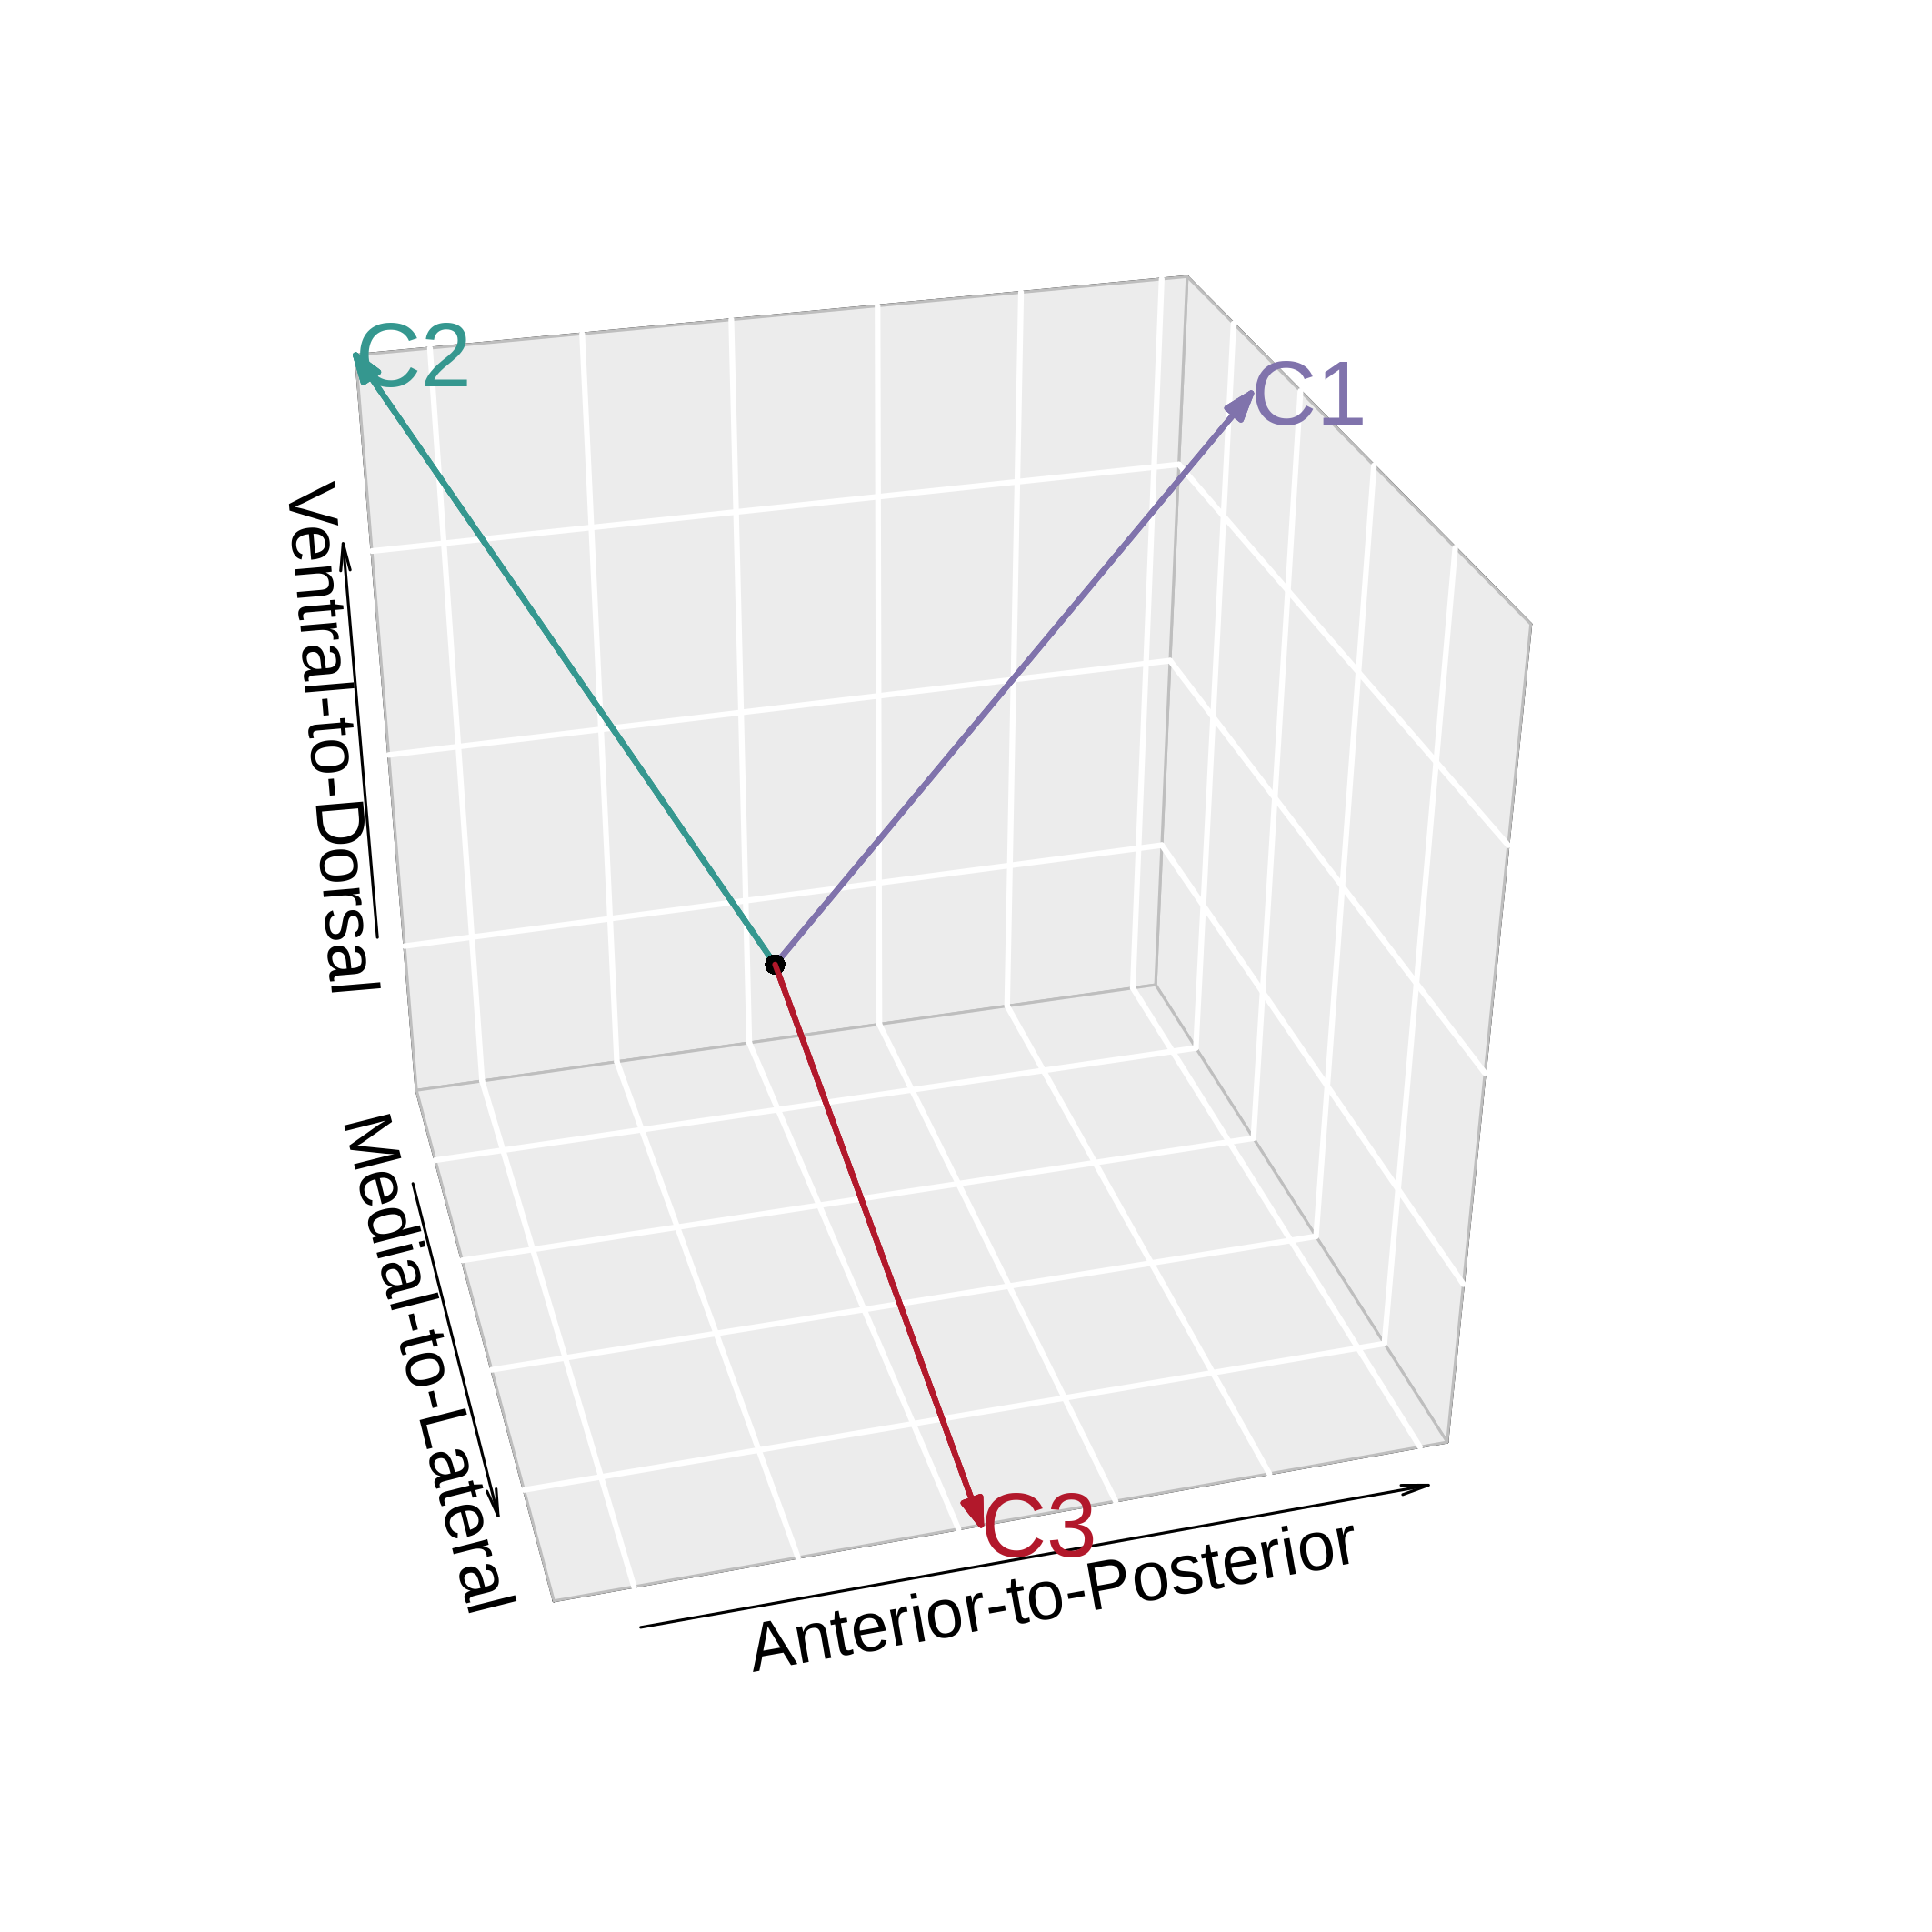

In [1369]:
%%R -i xyz_corrs -w 180 -h 180 -u mm -r 300
xyz_corrs['x',] %>% unlist
# library(plot3D)
plot_arrows_3d <- function(xyz_corrs) {
    colors <- c(
        brewer.puor(10)[8], brewer.brbg(10)[8], brewer.rdbu(10)[2]
    )

    x0 <- c(0, 0, 0)
    y0 <- c(0, 0, 0)
    z0 <- c(0, 0, 0)
    x1 <- xyz_corrs['x',] %>% unlist
    y1 <- xyz_corrs['y',] %>% unlist # flip AP axis to match left hemisphere
    z1 <- xyz_corrs['z',] %>% unlist
    arrows3D(x0, y0, z0, x1, y1, z1, col = colors,
            lwd = 2, d = 3,
            bty ="g", ticktype = "simple",
            xlab = 'Medial-to-Lateral', ylab = 'Anterior-to-Posterior', zlab = 'Ventral-to-Dorsal',
            phi = 30, theta = 75, cex.lab = 1.5)
    # Add starting point of arrow
    points3D(x0, y0, z0, add = TRUE, col="black", 
            colkey = FALSE, pch = 16, cex = 1)
    # Add labels to the arrows
    text3D(x1, y1, z1, c('C1','C2','C3'),
        col = colors, add=TRUE, colkey = FALSE, cex=2)
}
axes_plot <- plot_arrows_3d(xyz_corrs)
axes_plot

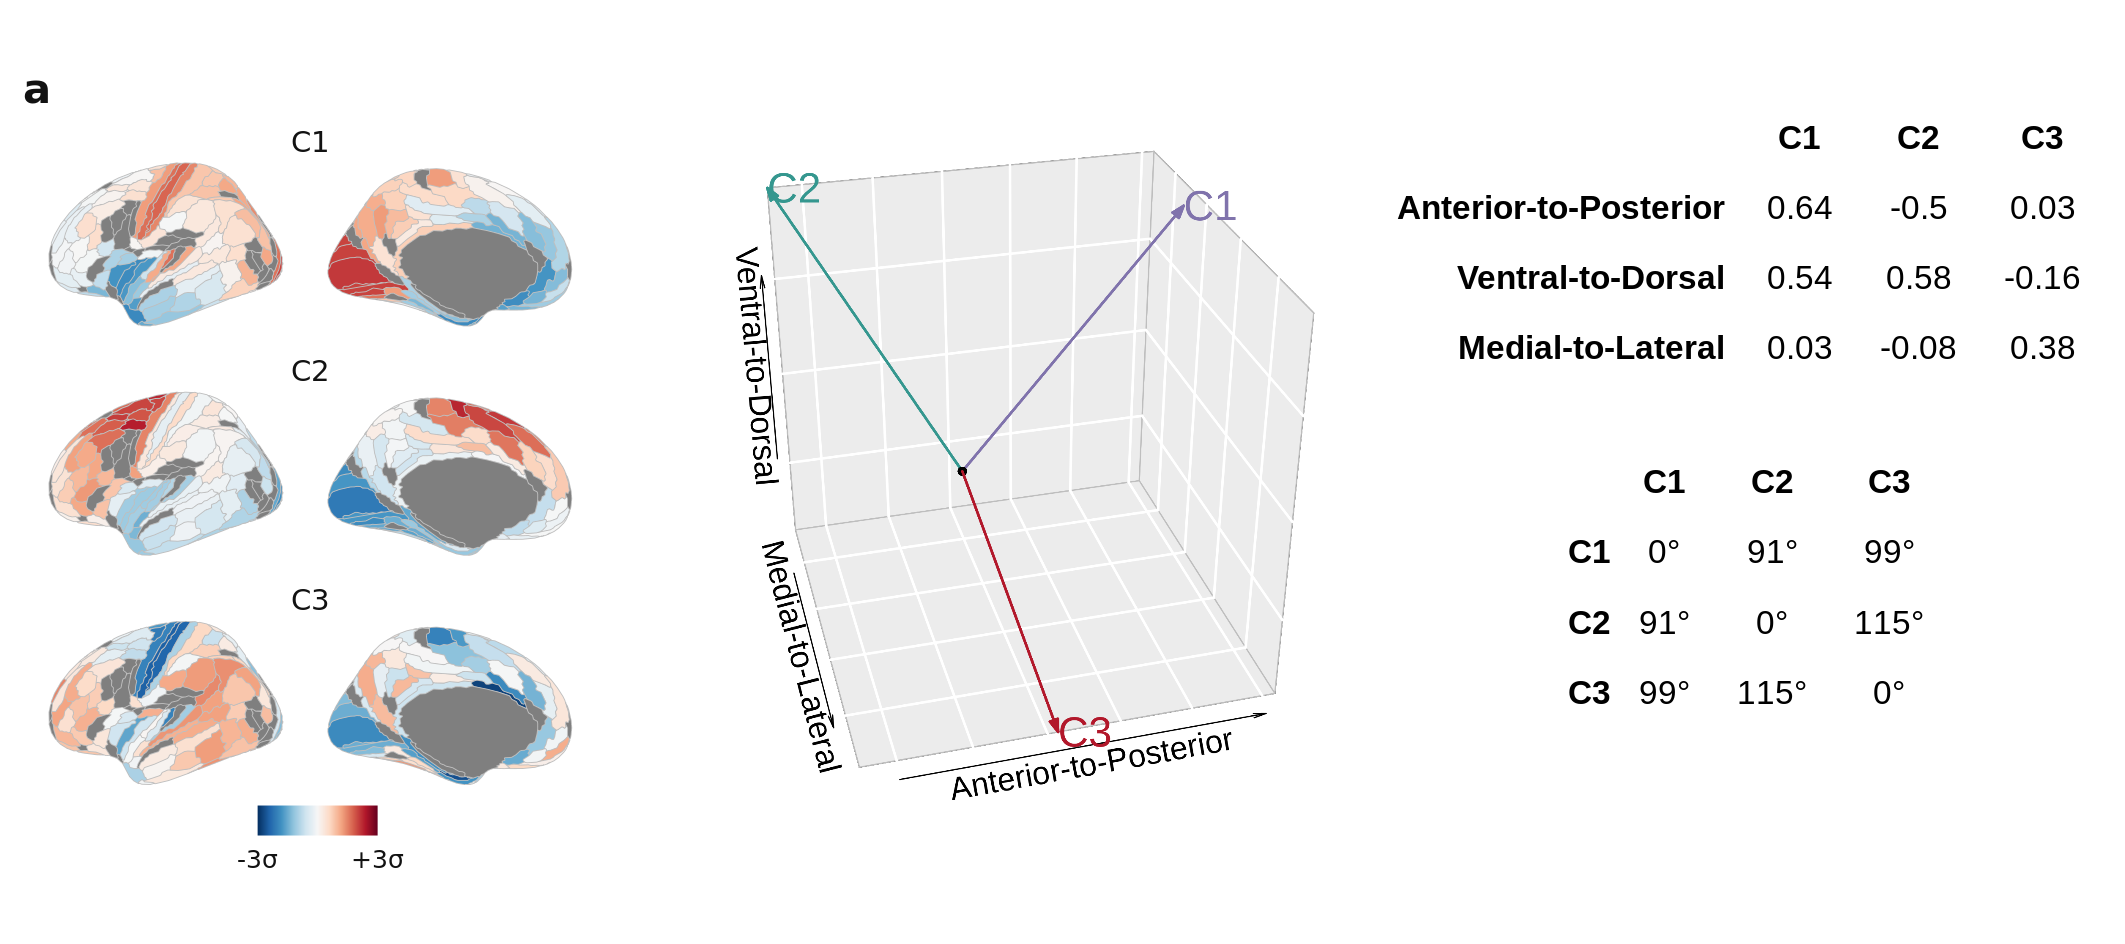

In [1399]:
%%R -i hcp_scores -i xyz_corrs_plot -i angles -w 180 -h 80 -u mm -r 300
source("../code/fig_extended.R")
library(gridExtra)
library(png)

plot_brains <- plot_brains(hcp_scores, strip=TRUE, legend_pos='bottom') + 
                theme(legend.margin=margin(-10,0,0,0,'mm')) + labs(tag='a')

img_path <- "../outputs/axes_plot.png"
img <- readPNG(img_path, native=T)
plot_axes <- ggplot() + inset_element(img, left=0,right=1,top=1,bottom=0, align_to='full') #+ labs(tag='b') + theme(plot.tag.position=c(.2,.95))

# plot_angles <- grid.table(angles, theme = ttheme_minimal(rowhead=list(fg_params=list(fontface='bold'))))
plot_corrs <- gridExtra::tableGrob(xyz_corrs_plot, theme = ttheme_minimal(base_size=8, rowhead=list(fg_params=list(fontface='bold'))))
plot_angles <- gridExtra::tableGrob(angles, theme = ttheme_minimal(base_size=8, rowhead=list(fg_params=list(fontface='bold'))))

design <- c(
    area(t=1,b=90,l=31,r=150),
    area(t=1,b=90,l=1,r=50),
    area(t=1,b=45,l=121,r=180),
    area(t=46,b=70,l=121,r=180)
)

plot_alignments <- plot_axes + plot_brains + plot_corrs + plot_angles + plot_layout(design=design)
plot_alignments

### Region-region coexpression

In [1010]:
expression_dict = {
    'original': dme_3d_ds5.expression.apply(lambda x: (x-np.mean(x))/np.std(x)),
    'without C1': regress_out_axes(dme_3d_ds5, 1)
}
coexp_dict = {name:get_coexp(expression) for name, expression in expression_dict.items()}

In [1011]:
coexp_df = (pd.concat(coexp_dict)
    .melt(ignore_index=False)
    .rename_axis(['version', 'x'], axis=0)
    .set_axis(['y', 'r'], axis=1)
    .reset_index()
)

In [1428]:
fetch_hcp()['info']

regionName                   regionLongName regionIdLabel hemisphere  \
0         V1_L          Primary_Visual_Cortex_L           1_L          L   
1        MST_L  Medial_Superior_Temporal_Area_L           2_L          L   
2         V6_L              Sixth_Visual_Area_L           3_L          L   
3         V2_L             Second_Visual_Area_L           4_L          L   
4         V3_L              Third_Visual_Area_L           5_L          L   
..         ...                              ...           ...        ...   
355    STSva_R             Area_STSv_anterior_R         376_R          R   
356     TE1m_R                Area_TE1_Middle_R         377_R          R   
357       PI_R              Para-Insular_Area_R         378_R          R   
358    a32pr_R         Area_anterior_32_prime_R         379_R          R   
359      p24_R              Area_posterior_24_R         380_R          R   

     label  Lobe                                    cortex   id  Cortex_ID  \
0       V1   Occ                            Primary_Visual    1          1   
1      MST   Occ  MT+_Complex_and_Neighboring_Visual_Areas    2          5   
2       V6   Occ                      Dorsal_Stream_Visual    3          3   
3       V2   Occ                              Early_Visual    4          2   
4       V3   Occ                              Early_Visual    5          2   
..     ...   ...                                       ...  ...        ...   
355  STSva  Temp                      Auditory_Association  356         11   
356   TE1m  Temp                          Lateral_Temporal  357         14   
357     PI  Temp             Insular_and_Frontal_Opercular  358         12   
358  a32pr    Fr  Anterior_Cingulate_and_Medial_Prefrontal  359         19   
359    p24    Fr  Anterior_Cingulate_and_Medial_Prefrontal  360         19   

          x-cog       y-cog       z-cog  volmm structure  
0    100.491589   41.138901   71.637040   6717    cortex  
1    132.416667   58.901786   82.059524    336    cortex  
2    104.543112   44.481665  103.916749   1009    cortex  
3    102.236656   44.064791   74.401125   6220    cortex  
4    107.926111   40.632159   76.961153   4994    cortex  
..          ...         ...         ...    ...       ...  
355   32.924419  117.527907   54.337791   1720    cortex  
356   26.146605  102.236497   53.246528   2592    cortex  
357   47.013363  123.157016   57.926503    898    cortex  
358   81.723096  153.990326  102.516324    827    cortex  
359   86.096222  161.202423   88.541696   1403    cortex  

[360 rows x 14 columns]

In [1437]:
order = get_coexp(dme_3d_ds5.expression, return_order=True)[1]

coexp_labels = (
    fetch_hcp()['info']
    .set_index('id')
    .loc[order, ['Lobe','cortex','label']]
    .reset_index().reset_index()
    .assign(number = lambda x: 137-x['index'])
    .replace({'Lobe':{
        'Fr':'Frontal',
        'Ins': 'Insula',
        'Occ': 'Occipital',
        'Par': 'Parietal',
        'Temp': 'Temporal'
    }})
)
coexp_labels

index   id      Lobe                                    cortex  label  \
0        0   57   Frontal  Anterior_Cingulate_and_Medial_Prefrontal  p24pr   
1        1   58   Frontal  Anterior_Cingulate_and_Medial_Prefrontal   33pr   
2        2   59   Frontal  Anterior_Cingulate_and_Medial_Prefrontal  a24pr   
3        3   60   Frontal  Anterior_Cingulate_and_Medial_Prefrontal  p32pr   
4        4   61   Frontal  Anterior_Cingulate_and_Medial_Prefrontal    a24   
..     ...  ...       ...                                       ...    ...   
132    132  135  Temporal                           Medial_Temporal     TF   
133    133  155  Temporal                           Medial_Temporal   PHA2   
134    134  139  Temporal        Temporo-Parieto-Occipital_Junction  TPOJ1   
135    135   18  Temporal                     Ventral_Stream_Visual    FFC   
136    136  163  Temporal                     Ventral_Stream_Visual    VVC   

     number  
0       137  
1       136  
2       135  
3       134  
4       133  
..      ...  
132       5  
133       4  
134       3  
135       2  
136       1  

[137 rows x 6 columns]

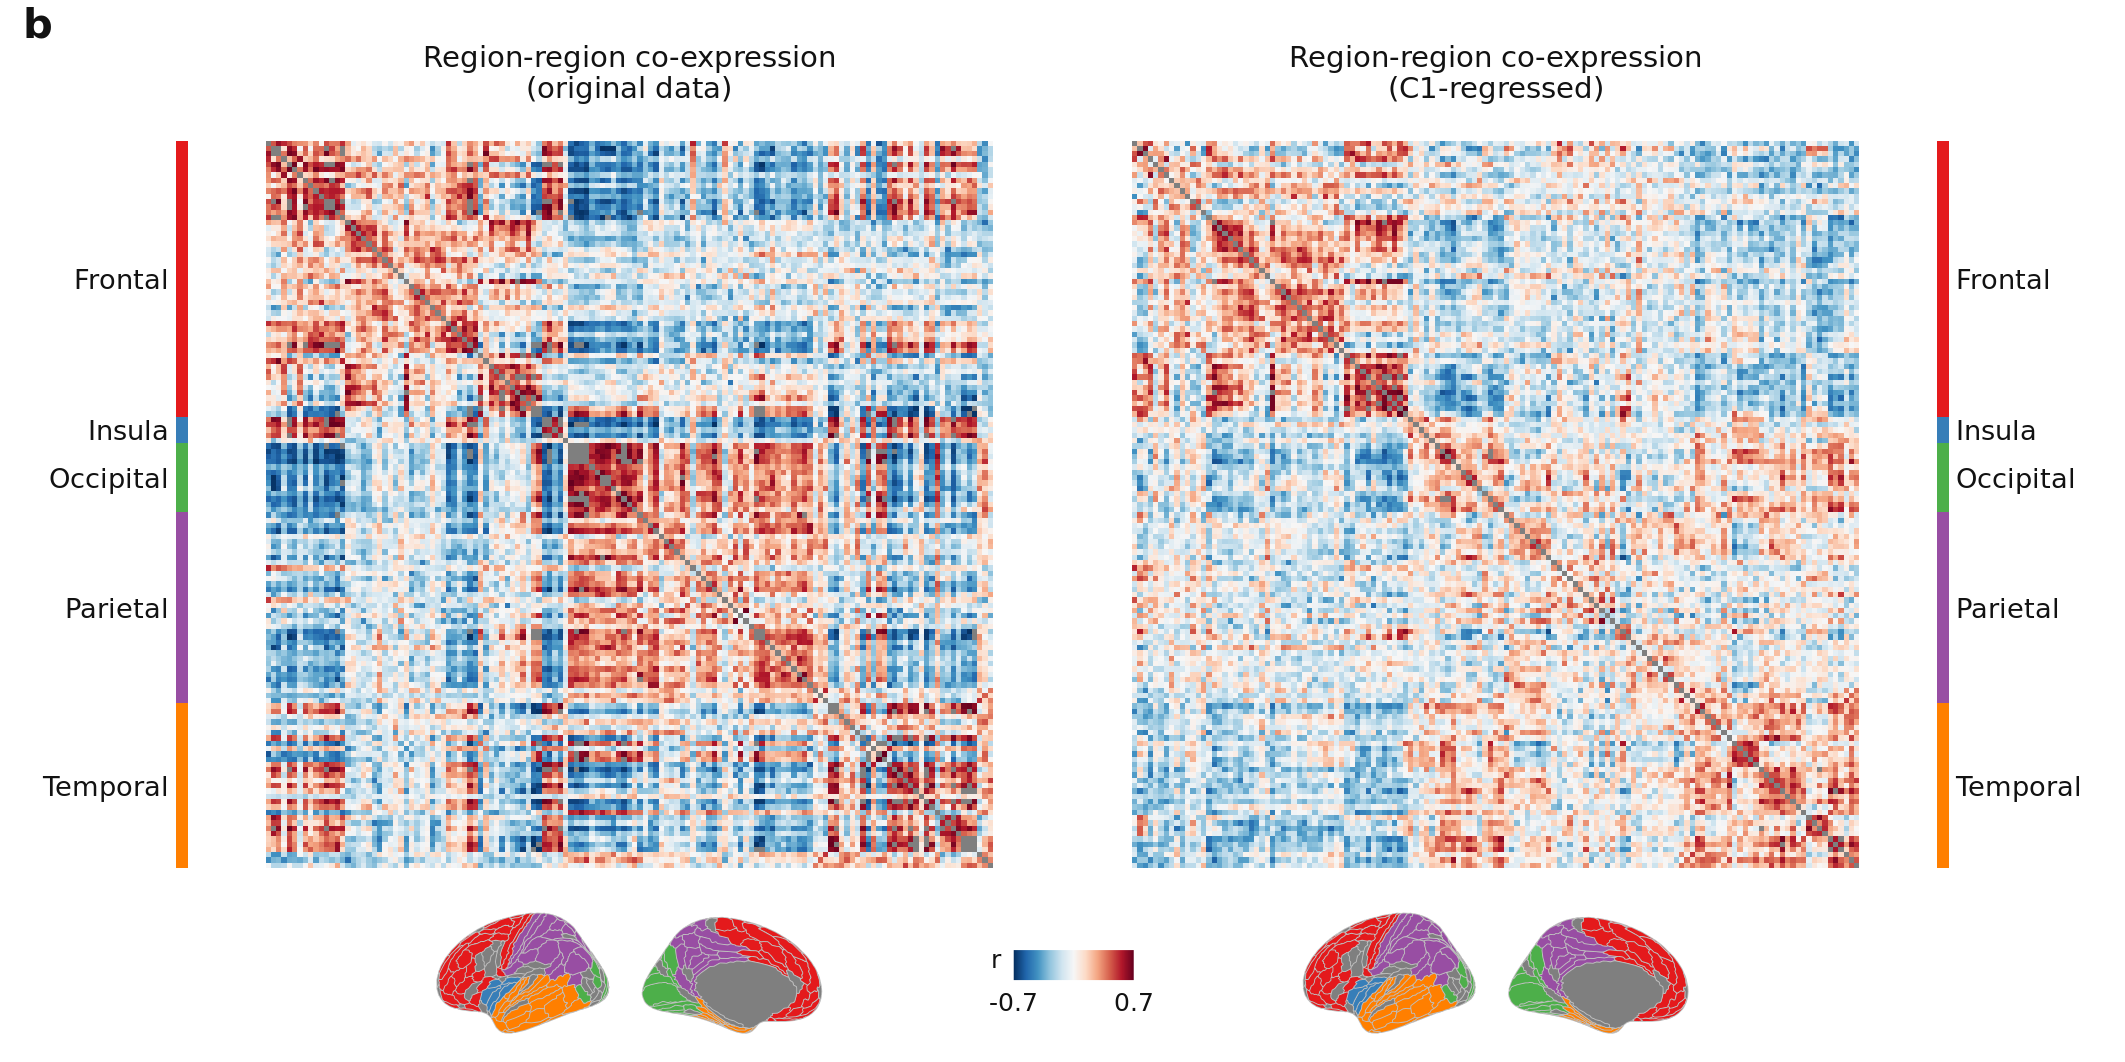

In [1461]:
%%R -i coexp_df -i coexp_labels -w 180 -h 90 --units mm -r 300
source("../code/fig_extended.R")

p0 <- coexp_labels %>%
rename(region = label) %>% 
mutate(region = recode(region,'7Pl'='7PL')) %>%
ggseg(
        atlas=glasser,
        position = 'stacked',
        hemi='left',
        mapping=aes(fill=Lobe),
        colour='grey', size=.1,
        show.legend=T
        ) +
    scale_fill_manual(values=brewer.set1(5), guide='none') +
    theme_void()

p1 <- plot_coexp(coexp_df %>% filter(version=='original'), limit=0.7) + 
        ggtitle('Region-region co-expression\n(original data)') + 
        inset_element(p0, top=.13, bottom=0, left=0.2, right=.8, align_to='full')
p2 <- plot_coexp(coexp_df %>% filter(version=='without C1'), limit=0.7) +
        ggtitle('Region-region co-expression\n(C1-regressed)') + 
        inset_element(p0, top=.13, bottom=0, left=0.2, right=.8, align_to='full')
p_labels <- plot_coexp_labels(coexp_labels)
p_labels_flip <- plot_coexp_labels(coexp_labels, flip=TRUE) + labs(tag='b')

plot_networks <- (p_labels_flip | p1 | p2 | p_labels) + plot_layout(widths=c(1,5,5,1), guides='collect')
plot_networks & theme(legend.margin=margin(0,0,2,0,'mm'))

# Extended Data MEG

In [730]:
hcp_scores = dme_3d_ds5.clean_scores()
null_scores = np.load("../outputs/permutations/dme_3d_ds5_clean_spin_41k_5000.npy")

In [752]:
maps_rename_dict = {
    'megdelta': 'Delta (δ: 2-4Hz)',
    'megtheta': 'Theta (θ: 5-7Hz)',
    'megalpha': 'Alpha (α: 8-12Hz)',
    'megbeta': 'Beta (β: 15-29Hz)',
    'meggamma1': 'Low Gamma (γ-low: 30-59Hz)',
    'meggamma2': 'High Gamma (γ-high: 60-90Hz)',
}

meg_maps = (pd.read_csv("../data/meg_HCPS1200.csv", index_col=0)
            .set_index(get_labels_hcp()[:180])
            .drop(['myelinmap','thickness','megtimescale'], axis=1)
            .apply(lambda x: (x-np.mean(x))/np.std(x))
            .loc[:, maps_rename_dict.keys()]
)

meg_maps_plot = meg_maps.rename(maps_rename_dict, axis=1)
meg_maps_plot

Delta (δ: 2-4Hz)  Theta (θ: 5-7Hz)  Alpha (α: 8-12Hz)  \
label                                                          
V1            -0.518782         -0.914991           1.346305   
MST           -0.540194         -0.609940           1.164284   
V6            -1.233396         -1.100668           1.788186   
V2            -0.571531         -0.949788           1.355669   
V3            -0.726571         -1.103299           1.506634   
...                 ...               ...                ...   
STSva          0.818639         -0.223971          -0.019938   
TE1m           0.450684         -0.239697           0.239870   
PI             0.807087         -0.169800          -0.058895   
a32pr          0.903802          1.476902          -1.136406   
p24            1.057956          1.322913          -1.141883   

       Beta (β: 15-29Hz)  Low Gamma (γ-low: 30-59Hz)  \
label                                                  
V1             -0.950642                   -1.171798   
MST            -0.718874                   -1.223103   
V6             -0.323085                   -1.179002   
V2             -0.836594                   -1.013988   
V3             -0.729623                   -0.963216   
...                  ...                         ...   
STSva          -0.915546                   -0.124024   
TE1m           -0.964469                   -0.197460   
PI             -0.725672                   -0.193573   
a32pr           0.232403                    0.360757   
p24             0.128138                    0.347310   

       High Gamma (γ-high: 60-90Hz)  
label                                
V1                        -0.802466  
MST                       -0.805902  
V6                        -1.144581  
V2                        -0.649012  
V3                        -0.653666  
...                             ...  
STSva                      0.743163  
TE1m                       0.812896  
PI                         0.418686  
a32pr                     -0.330931  
p24                       -0.255318  

[180 rows x 6 columns]

In [765]:
meg_maps_scatter = (meg_maps
    .melt(ignore_index=False, var_name='map', value_name='map_score')
    .join(hcp_scores.set_index('label'))
    .melt(ignore_index=False, id_vars=['map','map_score'], var_name='C', value_name='C_score')
    .dropna(how='any')
    .assign(map = lambda x: pd.Categorical(x['map'], ordered=True, categories=meg_maps.columns))
)

In [767]:
meg_maps_null_p = (corr_nulls_from_grads(null_scores, hcp_scores, meg_maps, reindex=True, adjust_by_label=True)
                .join(meg_maps_scatter.groupby(['map','C']).min(), on=('map','C'))
                .rename({'map_score':'y', 'C_score':'x'}, axis=1)
)
meg_maps_null_p

C        map         r         p         q         y         x
0   C1   megdelta -0.605150  0.129574  0.312338 -2.142903 -1.919616
1   C1   megtheta -0.179379  0.740252  0.740252 -2.557151 -1.919616
2   C1   megalpha  0.642495  0.156169  0.312338 -1.648018 -1.919616
3   C1    megbeta  0.427998  0.393921  0.492382 -2.456039 -1.919616
4   C1  meggamma1 -0.414958  0.410318  0.492382 -1.509459 -1.919616
5   C1  meggamma2 -0.640999  0.063387  0.312338 -1.281127 -1.919616
6   C2   megdelta  0.269673  0.667267  0.800720 -2.142903 -2.126647
7   C2   megtheta  0.781393  0.008598  0.051590 -2.557151 -2.126647
8   C2   megalpha -0.542896  0.385723  0.578584 -1.648018 -2.126647
9   C2    megbeta  0.628716  0.222555  0.549890 -2.456039 -2.126647
10  C2  meggamma1  0.575232  0.274945  0.549890 -1.509459 -2.126647
11  C2  meggamma2  0.045492  0.947411  0.947411 -1.281127 -2.126647
12  C3   megdelta  0.167761  0.512098  0.960808 -2.142903 -2.785436
13  C3   megtheta -0.015237  0.960808  0.960808 -2.557151 -2.785436
14  C3   megalpha  0.100402  0.739652  0.960808 -1.648018 -2.785436
15  C3    megbeta -0.096550  0.709258  0.960808 -2.456039 -2.785436
16  C3  meggamma1  0.023431  0.938412  0.960808 -1.509459 -2.785436
17  C3  meggamma2  0.207590  0.406119  0.960808 -1.281127 -2.785436

In [759]:
meg_maps_null_p = (meg_maps_null_p
                    .assign(map = lambda x: pd.Categorical(x['map'], ordered=True, categories=meg_maps.columns))
                    .drop(['y','x'], axis=1)
                    .join(meg_maps_scatter.groupby(['map','C'])
                          .agg({'map_score':'min', 'C_score':'min'}), on=('map','C'))
                    .rename({'map_score':'y', 'C_score':'x'},axis=1)
)

/opt/conda/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:56: UserWarning: DataFrame contains duplicated elements in the index, which will lead to loss of the row names in the resulting data.frame
  warnings.warn('DataFrame contains duplicated elements in the index, '




`geom_smooth()` using formula = 'y ~ x'


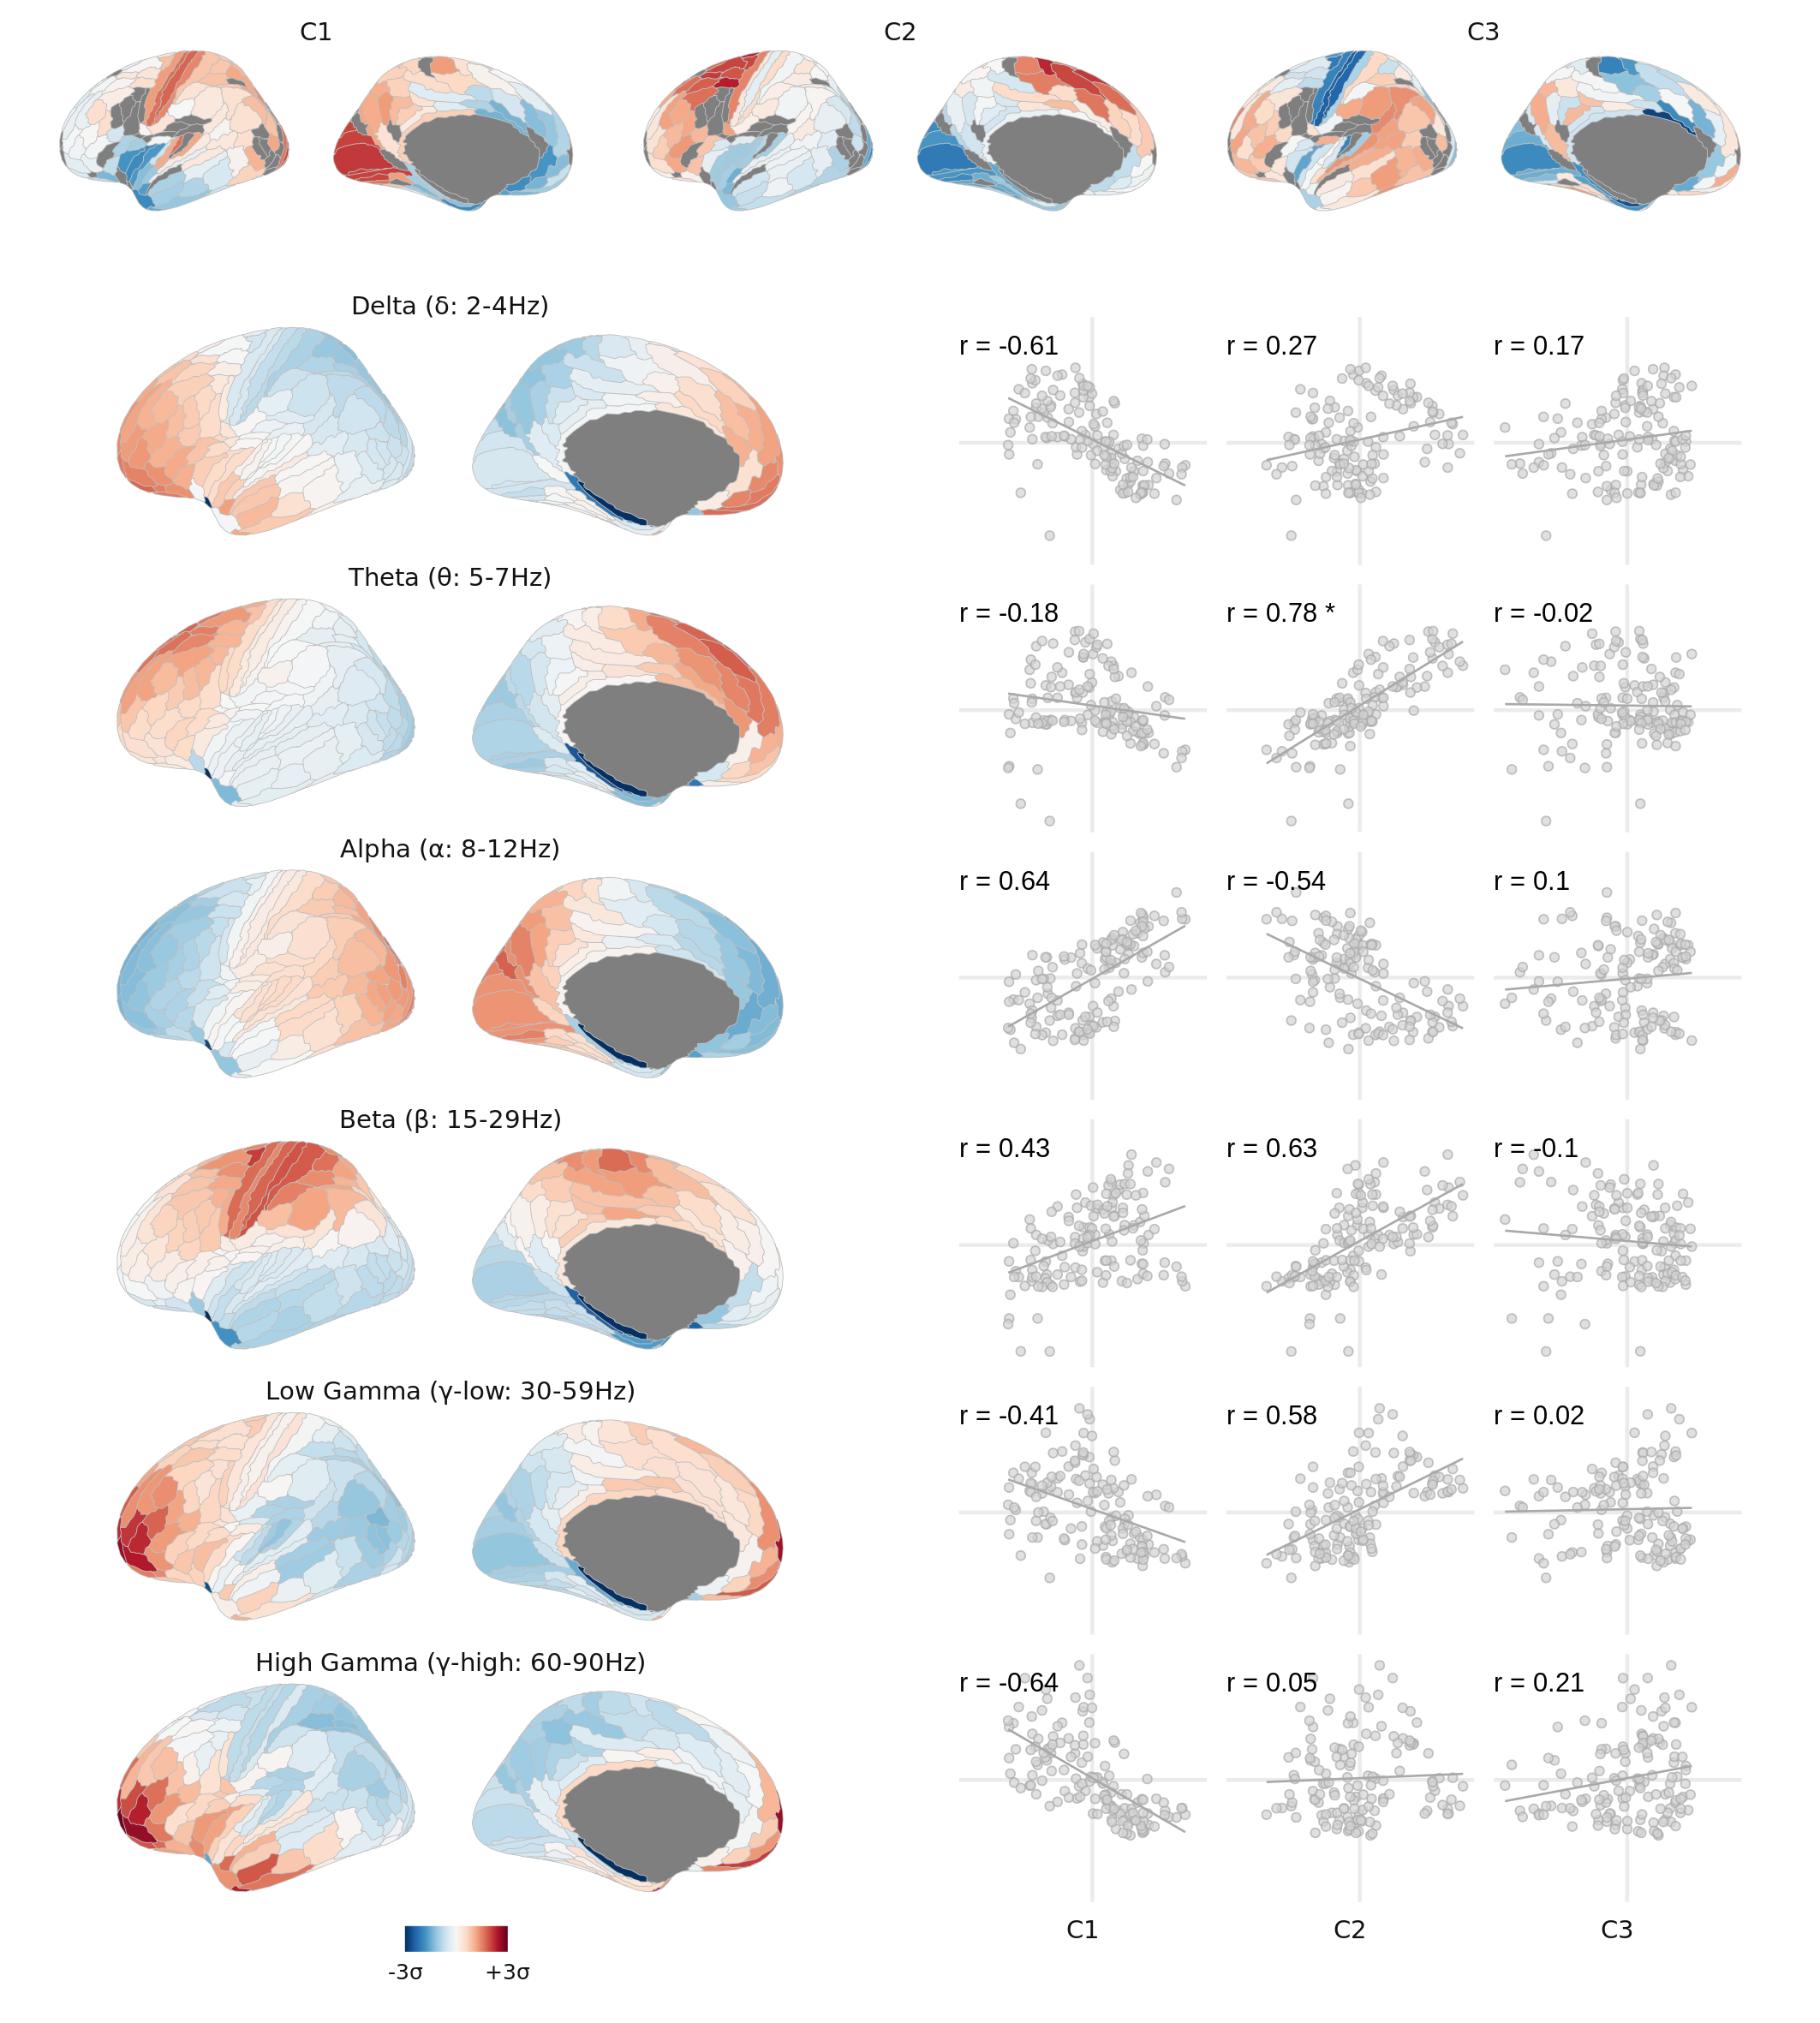

In [1038]:
%%R -i hcp_scores -i meg_maps_plot -i meg_maps_scatter -i meg_maps_null_p -w 180 -h 200 --units mm -r 300
source("../code/fig_extended.R")
p0 <- plot_brains(hcp_scores, ncol=3, facet='w', legend_pos='none', strip=TRUE)
p1 <- plot_brains(meg_maps_plot, ncol=1, facet='w', legend_pos='bottom', strip=TRUE) + theme(legend.margin=margin(-5,0,0,0,'mm'))
p2 <- plot_maps_scatter(meg_maps_scatter, meg_maps_null_p)
design <- c(
    area(t=1,b=20,l=1,r=180),
    area(t=21,b=200,l=1,r=90),
    area(t=21,b=200,l=91,r=180)
)

p0 + p1 + p2 + plot_layout(design=design)

# Extended Data DEGs

In [535]:
gwas = get_gwas_combined()

In [537]:
deg_studies = get_deg_combined().assign(
    disorder = lambda x: x['label'].str.split('--', expand=True)[0],
    label = lambda x: x['label'].str.split('--', expand=True)[1]
)

gwas_studies = (gwas
                .rename({'label':'disorder'}, axis=1)
                .assign(label= lambda x: x['disorder'].map({
                    'SCZ':'Trubetskoy 2022\n(GWAS)',
                    'ASD':'Matoba 2020\n(GWAS)',
                    'MDD':'Howard 2019\n(GWAS)'
                }))
)

deg_studies_and_gwas = pd.concat([deg_studies, gwas_studies])

### Overlaps

In [538]:
overlaps = (deg_studies_and_gwas
            .loc[lambda x: x['disorder']=='SCZ']
            .drop('disorder', axis=1)
            .assign(true = True)
            .assign(label = lambda x: pd.Categorical(x['label'], categories=x['label'].unique(), ordered=True))
            .pivot(index='gene', columns='label', values='true')
            .fillna(False)
            .set_axis(['Gandal\n2018', 'Fromer\n2016', 'Collado-Torres 2019', 'Jaffe 2018', 'Trubetskoy 2022\n(GWAS)'], axis=1)
)
overlaps

Gandal\n2018  Fromer\n2016  Collado-Torres 2019  Jaffe 2018  \
gene                                                                        
.                    False          True                False       False   
7SK                   True         False                False       False   
A2M                   True         False                 True       False   
A4GALT                True         False                False       False   
AADAT                 True         False                False       False   
...                    ...           ...                  ...         ...   
ZSWIM6               False         False                False       False   
ZSWIM7                True         False                False       False   
ZUFSP                 True         False                False       False   
ZW10                  True         False                False       False   
hsa-mir-1199          True         False                False       False   

              Trubetskoy 2022\n(GWAS)  
gene                                   
.                               False  
7SK                             False  
A2M                             False  
A4GALT                          False  
AADAT                           False  
...                               ...  
ZSWIM6                           True  
ZSWIM7                          False  
ZUFSP                           False  
ZW10                            False  
hsa-mir-1199                    False  

[5684 rows x 5 columns]

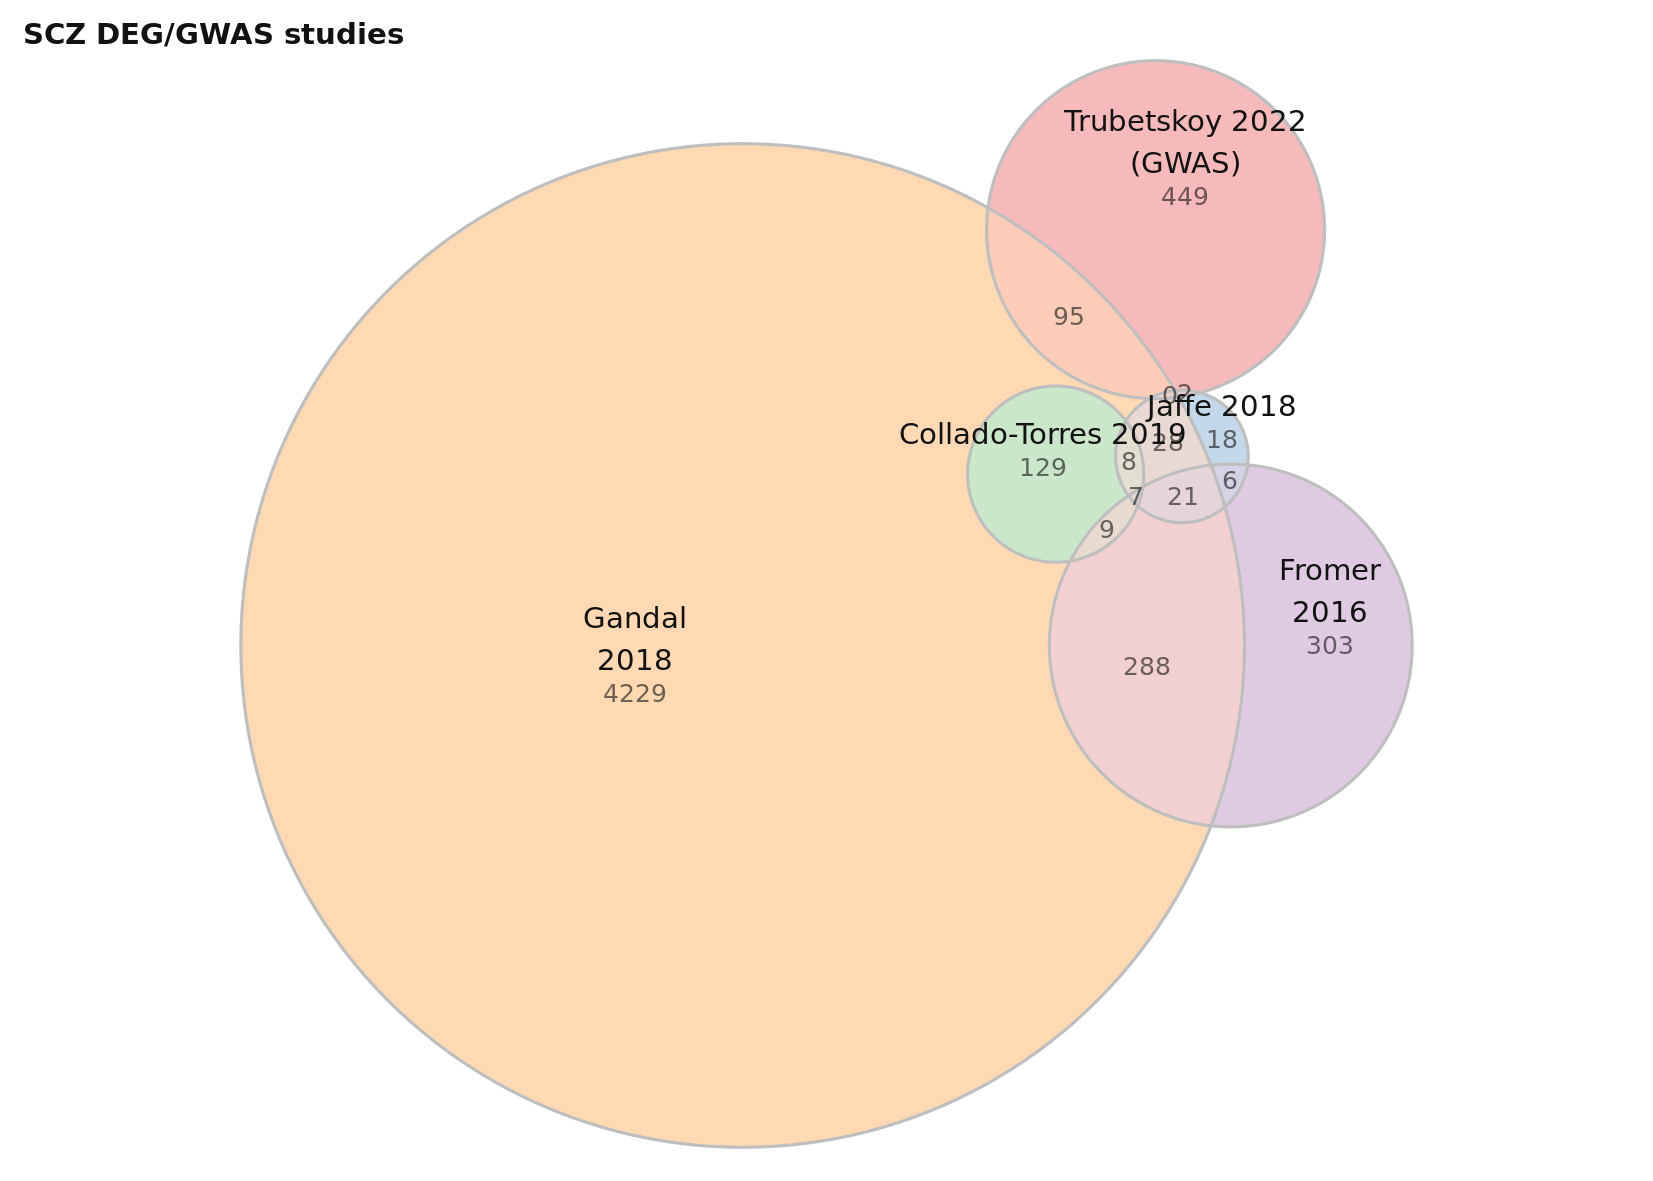

In [665]:
%%R -i overlaps -w 140 -h 100 -u mm -r 300
library(eulerr)
g_overlaps <- plot(euler(overlaps, shape = 'circle'),
     edges = list(col='grey'),
     fills = list(alpha = 0.3, fill = brewer.set1(5) %>% rev),
     labels = list(col = "grey7", fontsize = 7, cex=1, fontfamily='Calibri', font='plain'),
     quantities = list(col = "grey7", fontsize = 6, fontfamily='Calibri', alpha=.6),
     adjust_labels = T
) %>% wrap_elements + coord_cartesian(clip='off') + 
     ggtitle('SCZ DEG/GWAS studies') +
     theme(plot.title = element_text(size = 7, family='Calibri', color='grey7'))
g_overlaps

### Histograms by GWAS / DEG

In [544]:
get_deg_consensus()

label      gene  study
1       ASD     AAGAB      2
4       ASD  AASDHPPT      2
5       ASD      AATK      2
7       ASD     ABCA1      3
8       ASD    ABCA10      3
...     ...       ...    ...
10305   SCZ    ZNF808      2
10307   SCZ   ZNF815P      2
10309   SCZ    ZNF827      2
10310   SCZ    ZNF831      3
10321   SCZ    ZSCAN1      2

[2144 rows x 3 columns]

In [545]:
deg_scz = (get_deg_consensus()
           .loc[lambda x: x['label'] == 'SCZ']
           .rename({'label':'disorder'}, axis=1)
           .drop('study', axis=1)
)

deg_consensus_with_gwas = pd.concat([
    gwas_studies.loc[lambda x: x['disorder']=='SCZ'].assign(label='GWAS'),
    deg_scz.assign(label='DEGs (2+ studies only)')
])

quantiles = make_component_quantiles(weights, labels=None)

deg_consensus_with_gwas_quantiles = (
    deg_consensus_with_gwas
    .join(quantiles.set_index('gene').query("C == 'C3'"), on='gene')
    .dropna()
    .groupby(['C', 'C_quantile', 'label'], as_index=False)['C_score'].count()
    .rename({'C_score':'count'}, axis=1)
)
deg_consensus_with_gwas_quantiles.head()

C C_quantile                   label  count
0  C3          1  DEGs (2+ studies only)     19
1  C3          1                    GWAS     12
2  C3          2  DEGs (2+ studies only)     40
3  C3          2                    GWAS     14
4  C3          3  DEGs (2+ studies only)     25

/opt/conda/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "C_quantile". Fall back to string conversion. The error is: Converting pandas "Category" series to R factor is only possible when categories are strings.
  warnings.warn('Error while trying to convert '


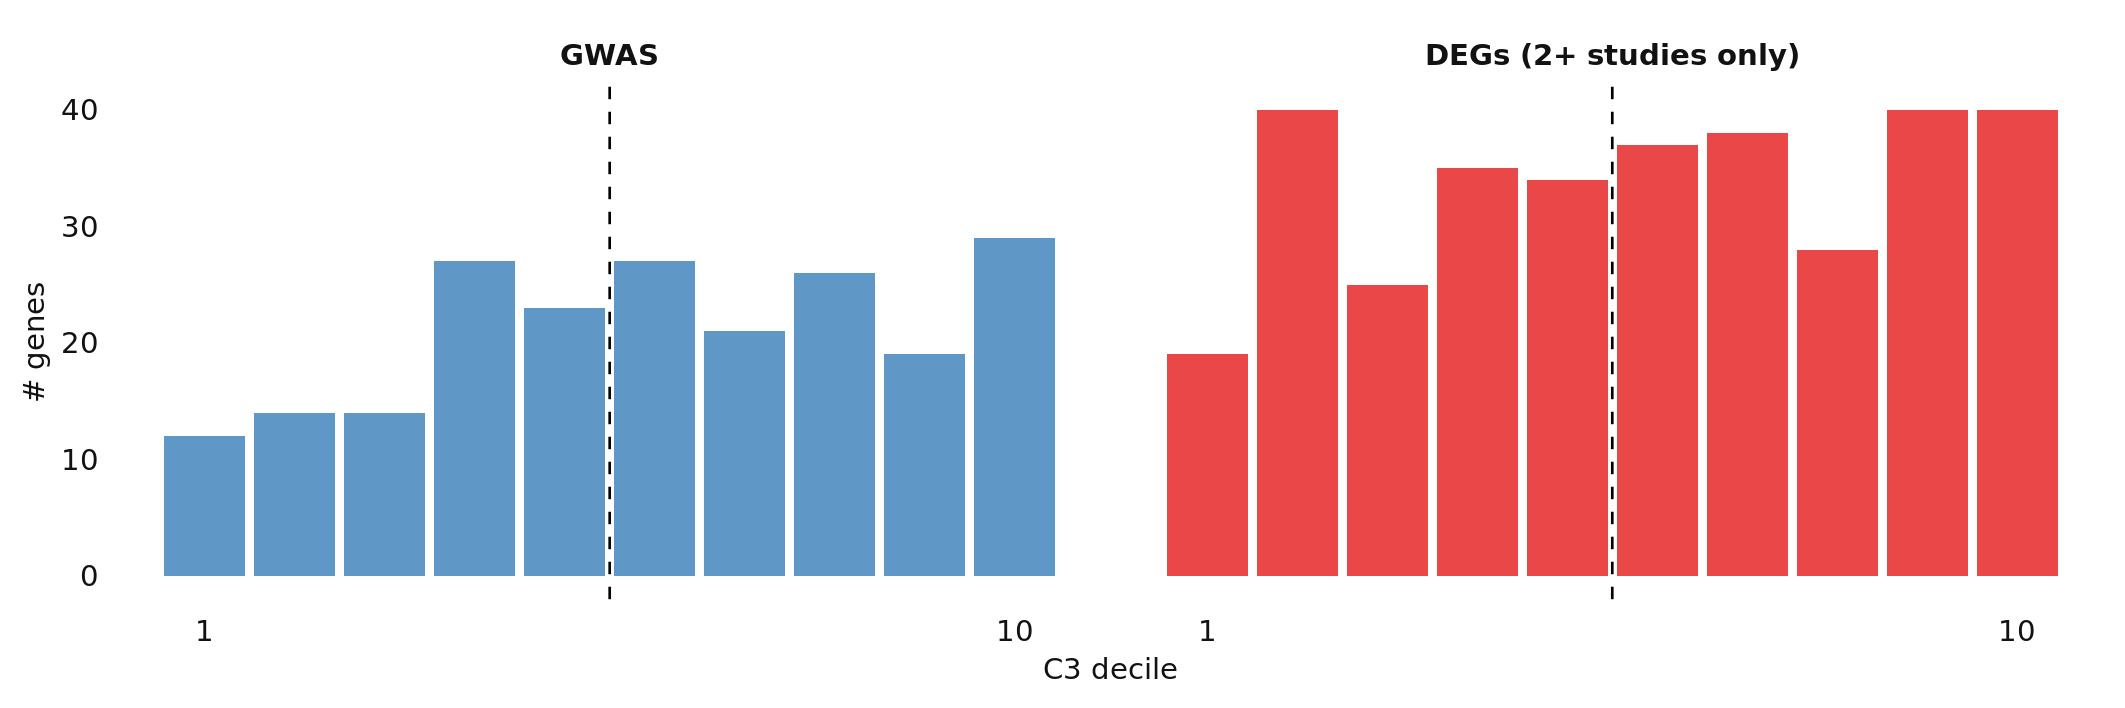

In [546]:
%%R -w 180 -h 60 -u mm -r 300 -i deg_consensus_with_gwas_quantiles
g_quantile_deg_gwas <- deg_consensus_with_gwas_quantiles %>% 
    mutate(label = factor(label, ordered=T, levels = unique(.$label) %>% rev)) %>% 
    ggplot(aes(x=as.integer(C_quantile), y=count, fill=label)) + 
    facet_wrap(~label, ncol=2) +
    geom_col(alpha=.8) + 
    geom_vline(xintercept=5.5, linetype=2, size=.3) +
    scale_fill_manual(values=brewer.set1(3)[c(2,1)]) +
    scale_x_continuous(breaks=c(1,10), 'C3 decile') +
    ylab('# genes') +
    guides(fill = 'none') + 
    theme(
        legend.position = 'right',
        strip.clip = 'off',
        strip.text = element_text(face='bold')
    )
g_quantile_deg_gwas

### Histograms by study

In [547]:
layer_levels = ['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'WM', 'None']
quantiles = make_component_quantiles(weights, labels=get_layer_genes(), 
                                     levels=layer_levels, na_value='None')

scz_studies = (deg_studies_and_gwas
    .loc[lambda x: x['disorder']=='SCZ', 'label'].unique()
)

deg_quantile_layers = {}
for study in scz_studies:
    deg_quantile_layers[study] = (
        deg_studies_and_gwas
        .loc[lambda x: x['label'] == study, ['gene']]
        .set_index('gene')
        .join(quantiles.set_index('gene').query("C == 'C3'"))
        .dropna()
        .groupby(['C', 'C_quantile', 'label'], as_index=False)['C_score'].count()
        .rename({'C_score':'count'}, axis=1)
    )

deg_quantile_layers = pd.concat(deg_quantile_layers).reset_index(0).rename({'level_0':'study'}, axis=1)
deg_quantile_layers

study   C C_quantile label  count
0               Gandal 2018  C3          1    L1     83
1               Gandal 2018  C3          1    L2      4
2               Gandal 2018  C3          1    L3      0
3               Gandal 2018  C3          1    L4      1
4               Gandal 2018  C3          1    L5      4
..                      ...  ..        ...   ...    ...
75  Trubetskoy 2022\n(GWAS)  C3         10    L4      0
76  Trubetskoy 2022\n(GWAS)  C3         10    L5      1
77  Trubetskoy 2022\n(GWAS)  C3         10    L6      3
78  Trubetskoy 2022\n(GWAS)  C3         10    WM      0
79  Trubetskoy 2022\n(GWAS)  C3         10  None     12

[400 rows x 5 columns]

/opt/conda/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:56: UserWarning: DataFrame contains duplicated elements in the index, which will lead to loss of the row names in the resulting data.frame
  warnings.warn('DataFrame contains duplicated elements in the index, '
/opt/conda/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "C_quantile". Fall back to string conversion. The error is: Converting pandas "Category" series to R factor is only possible when categories are strings.
  warnings.warn('Error while trying to convert '


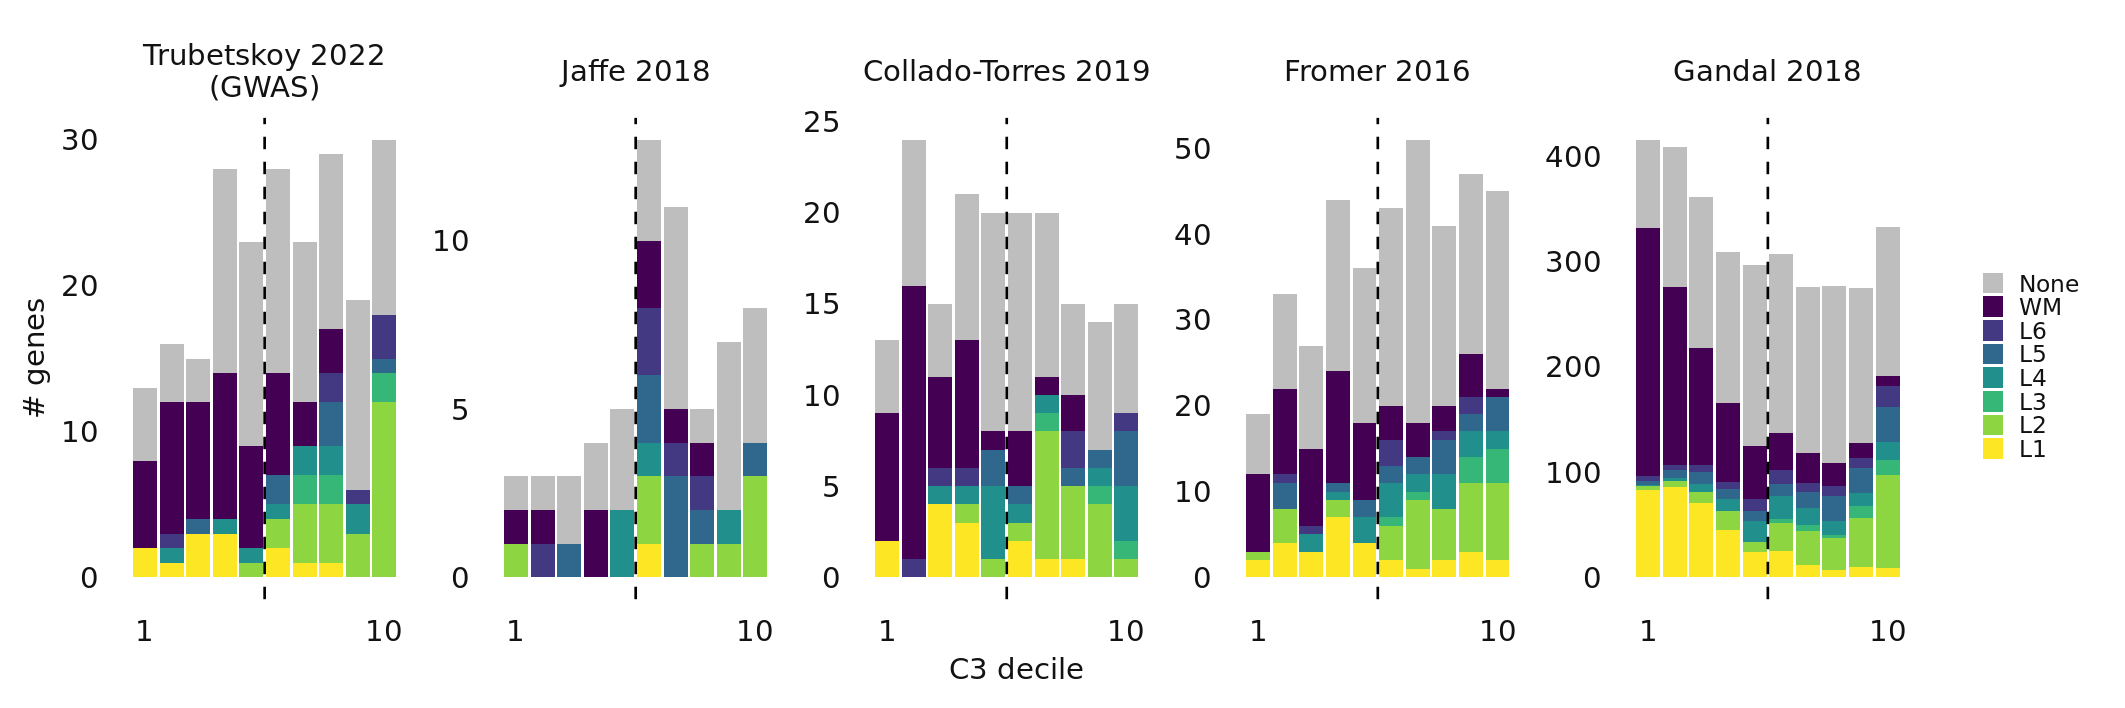

In [548]:
%%R -w 180 -h 60 -u mm -r 300 -i deg_quantile_layers
g_quantile_layers <- deg_quantile_layers %>% 
    mutate(label = factor(label, ordered=T, levels = unique(.$label) %>% rev)) %>% 
    mutate(study = factor(study, ordered=T, levels = unique(.$study) %>% rev)) %>% 
    ggplot(aes(x=as.integer(C_quantile), y=count, fill=label)) + 
    facet_wrap(~study, ncol=5, scales='free') +
    geom_col() + 
    geom_vline(xintercept=5.5, linetype=2, size=.3) +
    scale_fill_manual(values=c('grey', viridis(7))) +
    scale_x_continuous(breaks=c(1,10), 'C3 decile') +
    ylab('# genes') +
    guides(fill = guide_legend(title=NULL, override.aes = list(size=2))) + 
    theme(
        legend.position = 'right',
        strip.clip = 'off'
    )
g_quantile_layers

In [549]:
layer_enrichments_all = test_layers_all_combinations(
    background = weights.index, 
    disorder_genes = deg_studies_and_gwas, 
    layer_genes = get_layer_genes(add_hse_genes=False),
    reference_filter = None
)
# layer_enrichments_all

C3_positive = weights.loc[lambda x: x['C3']>0, :].index
C3_negative = weights.loc[lambda x: x['C3']<0, :].index

layer_enrichments_C3positive = test_layers_all_combinations(
    background = weights.index, 
    disorder_genes = deg_studies_and_gwas, 
    layer_genes = get_layer_genes(add_hse_genes=False),
    reference_filter = C3_positive
)
layer_enrichments_C3positive.head()

Done Gandal 2022-ASD.
Done Gandal 2018-ASD.
Done Parikshak 2016-ASD.
Done Matoba 2020
(GWAS)-ASD.
Done Jaffe 2022-MDD.
Done Howard 2019
(GWAS)-MDD.
Done Gandal 2018-SCZ.
Done Fromer 2016-SCZ.
Done Collado-Torres 2019-SCZ.
Done Jaffe 2018-SCZ.
Done Trubetskoy 2022
(GWAS)-SCZ.
Done Gandal 2022-ASD.
Done Gandal 2018-ASD.
Done Parikshak 2016-ASD.
Done Matoba 2020
(GWAS)-ASD.
Done Jaffe 2022-MDD.
Done Howard 2019
(GWAS)-MDD.
Done Gandal 2018-SCZ.
Done Fromer 2016-SCZ.
Done Collado-Torres 2019-SCZ.
Done Jaffe 2018-SCZ.
Done Trubetskoy 2022
(GWAS)-SCZ.


label disorder layer   n    N       pct  odds_ratio             p  \
0  Gandal 2022      ASD    L1  30  987  0.030395    0.325906  1.000000e+00   
1  Gandal 2022      ASD    L2  82  987  0.083080    0.953923  6.679204e-01   
2  Gandal 2022      ASD    L3   8  987  0.008105    0.733216  8.420976e-01   
3  Gandal 2022      ASD    L4  81  987  0.082067    4.309020  8.771184e-21   
4  Gandal 2022      ASD    L5  94  987  0.095238    3.283531  1.173437e-17   

              q    sig  
0  1.000000e+00  False  
1  9.956814e-01  False  
2  1.000000e+00  False  
3  3.376906e-19   True  
4  3.011821e-16   True

Scale for size is already present.
Adding another scale for size, which will replace the existing scale.
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


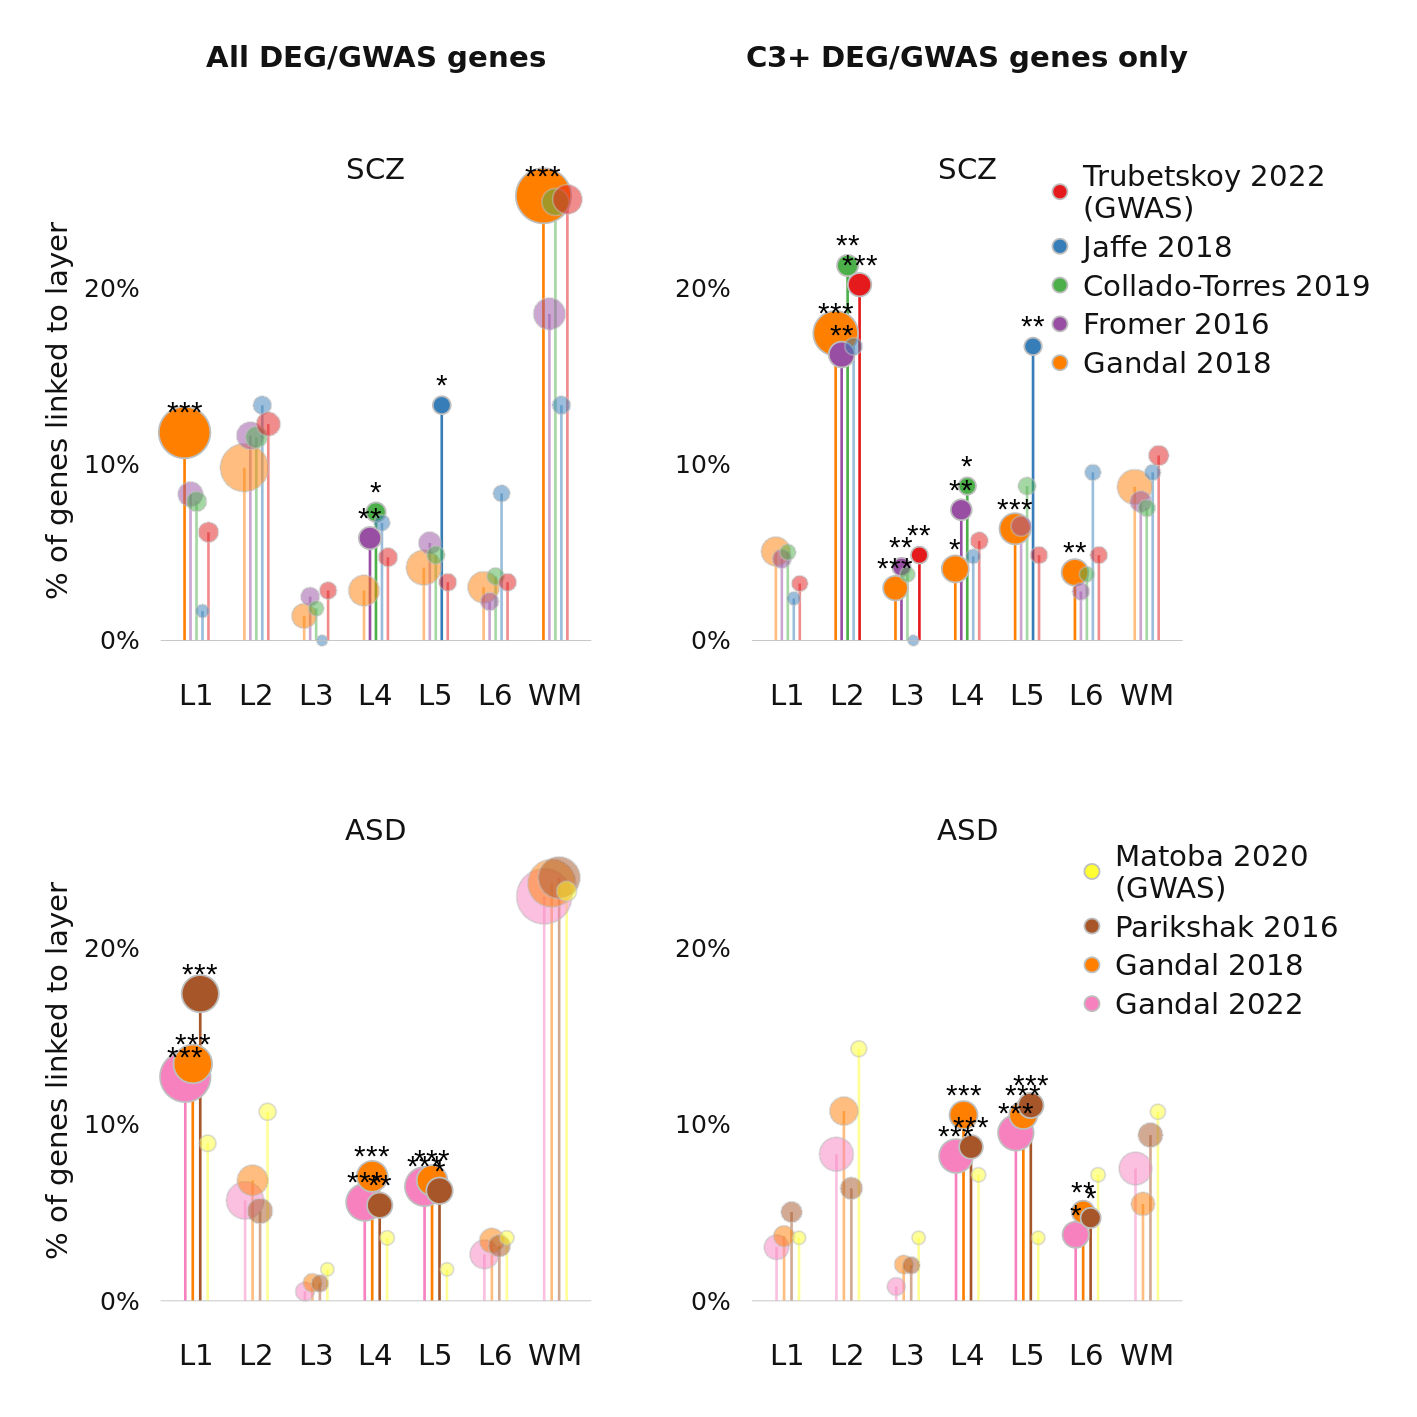

In [660]:
%%R -w 120 -h 120 -u mm -r 300 -i layer_enrichments_C3positive -i layer_enrichments_all
source("../code/fig4_plots.R")

colors_scz <- brewer.set1(5)
colors_asd <- brewer.set1(8)[c(6,7,5,8)]

layer_enrichments_all <- layer_enrichments_all %>% 
            mutate(label = factor(label, ordered=T, levels=unique(.$label) %>% rev)) %>% arrange(label) %>% 
            mutate(n = pmin(n, 300))

layer_enrichments_C3positive <- layer_enrichments_C3positive %>% 
            mutate(label = factor(label, ordered=T, levels=unique(.$label) %>% rev)) %>% arrange(label) %>% 
            mutate(n = pmin(n, 300))

g_layers_all_scz <- layer_enrichments_all %>% 
            filter(disorder == 'SCZ') %>% 
            plot_disorder_layer_enrichments(ylab='% of genes linked to layer', colors=colors_scz) + 
            ggtitle('All DEG/GWAS genes')

g_layers_c3_scz <- layer_enrichments_C3positive %>% 
            filter(disorder == 'SCZ') %>% 
            plot_disorder_layer_enrichments(ylab='', colors=colors_scz) + 
            ggtitle('C3+ DEG/GWAS genes only')

g_layers_all_asd <- layer_enrichments_all %>% 
            filter(disorder == 'ASD') %>% 
            plot_disorder_layer_enrichments(ylab='% of genes linked to layer', colors=colors_asd)

g_layers_c3_asd <- layer_enrichments_C3positive %>% 
            filter(disorder == 'ASD') %>% 
            plot_disorder_layer_enrichments(ylab='', colors=colors_asd)


g_layers_scz <- g_layers_all_scz + g_layers_c3_scz + plot_layout(guides='collect')
g_layers_asd <- g_layers_all_asd + g_layers_c3_asd + plot_layout(guides='collect', tag_level='new')

g_layer_enrichments <- (
    (g_layers_scz / g_layers_asd) & 
    guides(size = 'none', fill = guide_legend(byrow=T)) &
    scale_size_continuous(limits=c(0,300)) & 
    scale_y_continuous(limits=c(0,0.26), labels=percent) &
    xlab(NULL)
) & 
theme(
    legend.position = 'right', 
    legend.margin = margin(0,0,25,-15,'mm'),
    legend.spacing.y = unit(1,'mm'),
    plot.tag.position = c(0,1)
    # legend.text = element_text(size=6),
    # strip.text = element_blank()
)

g_layer_enrichments

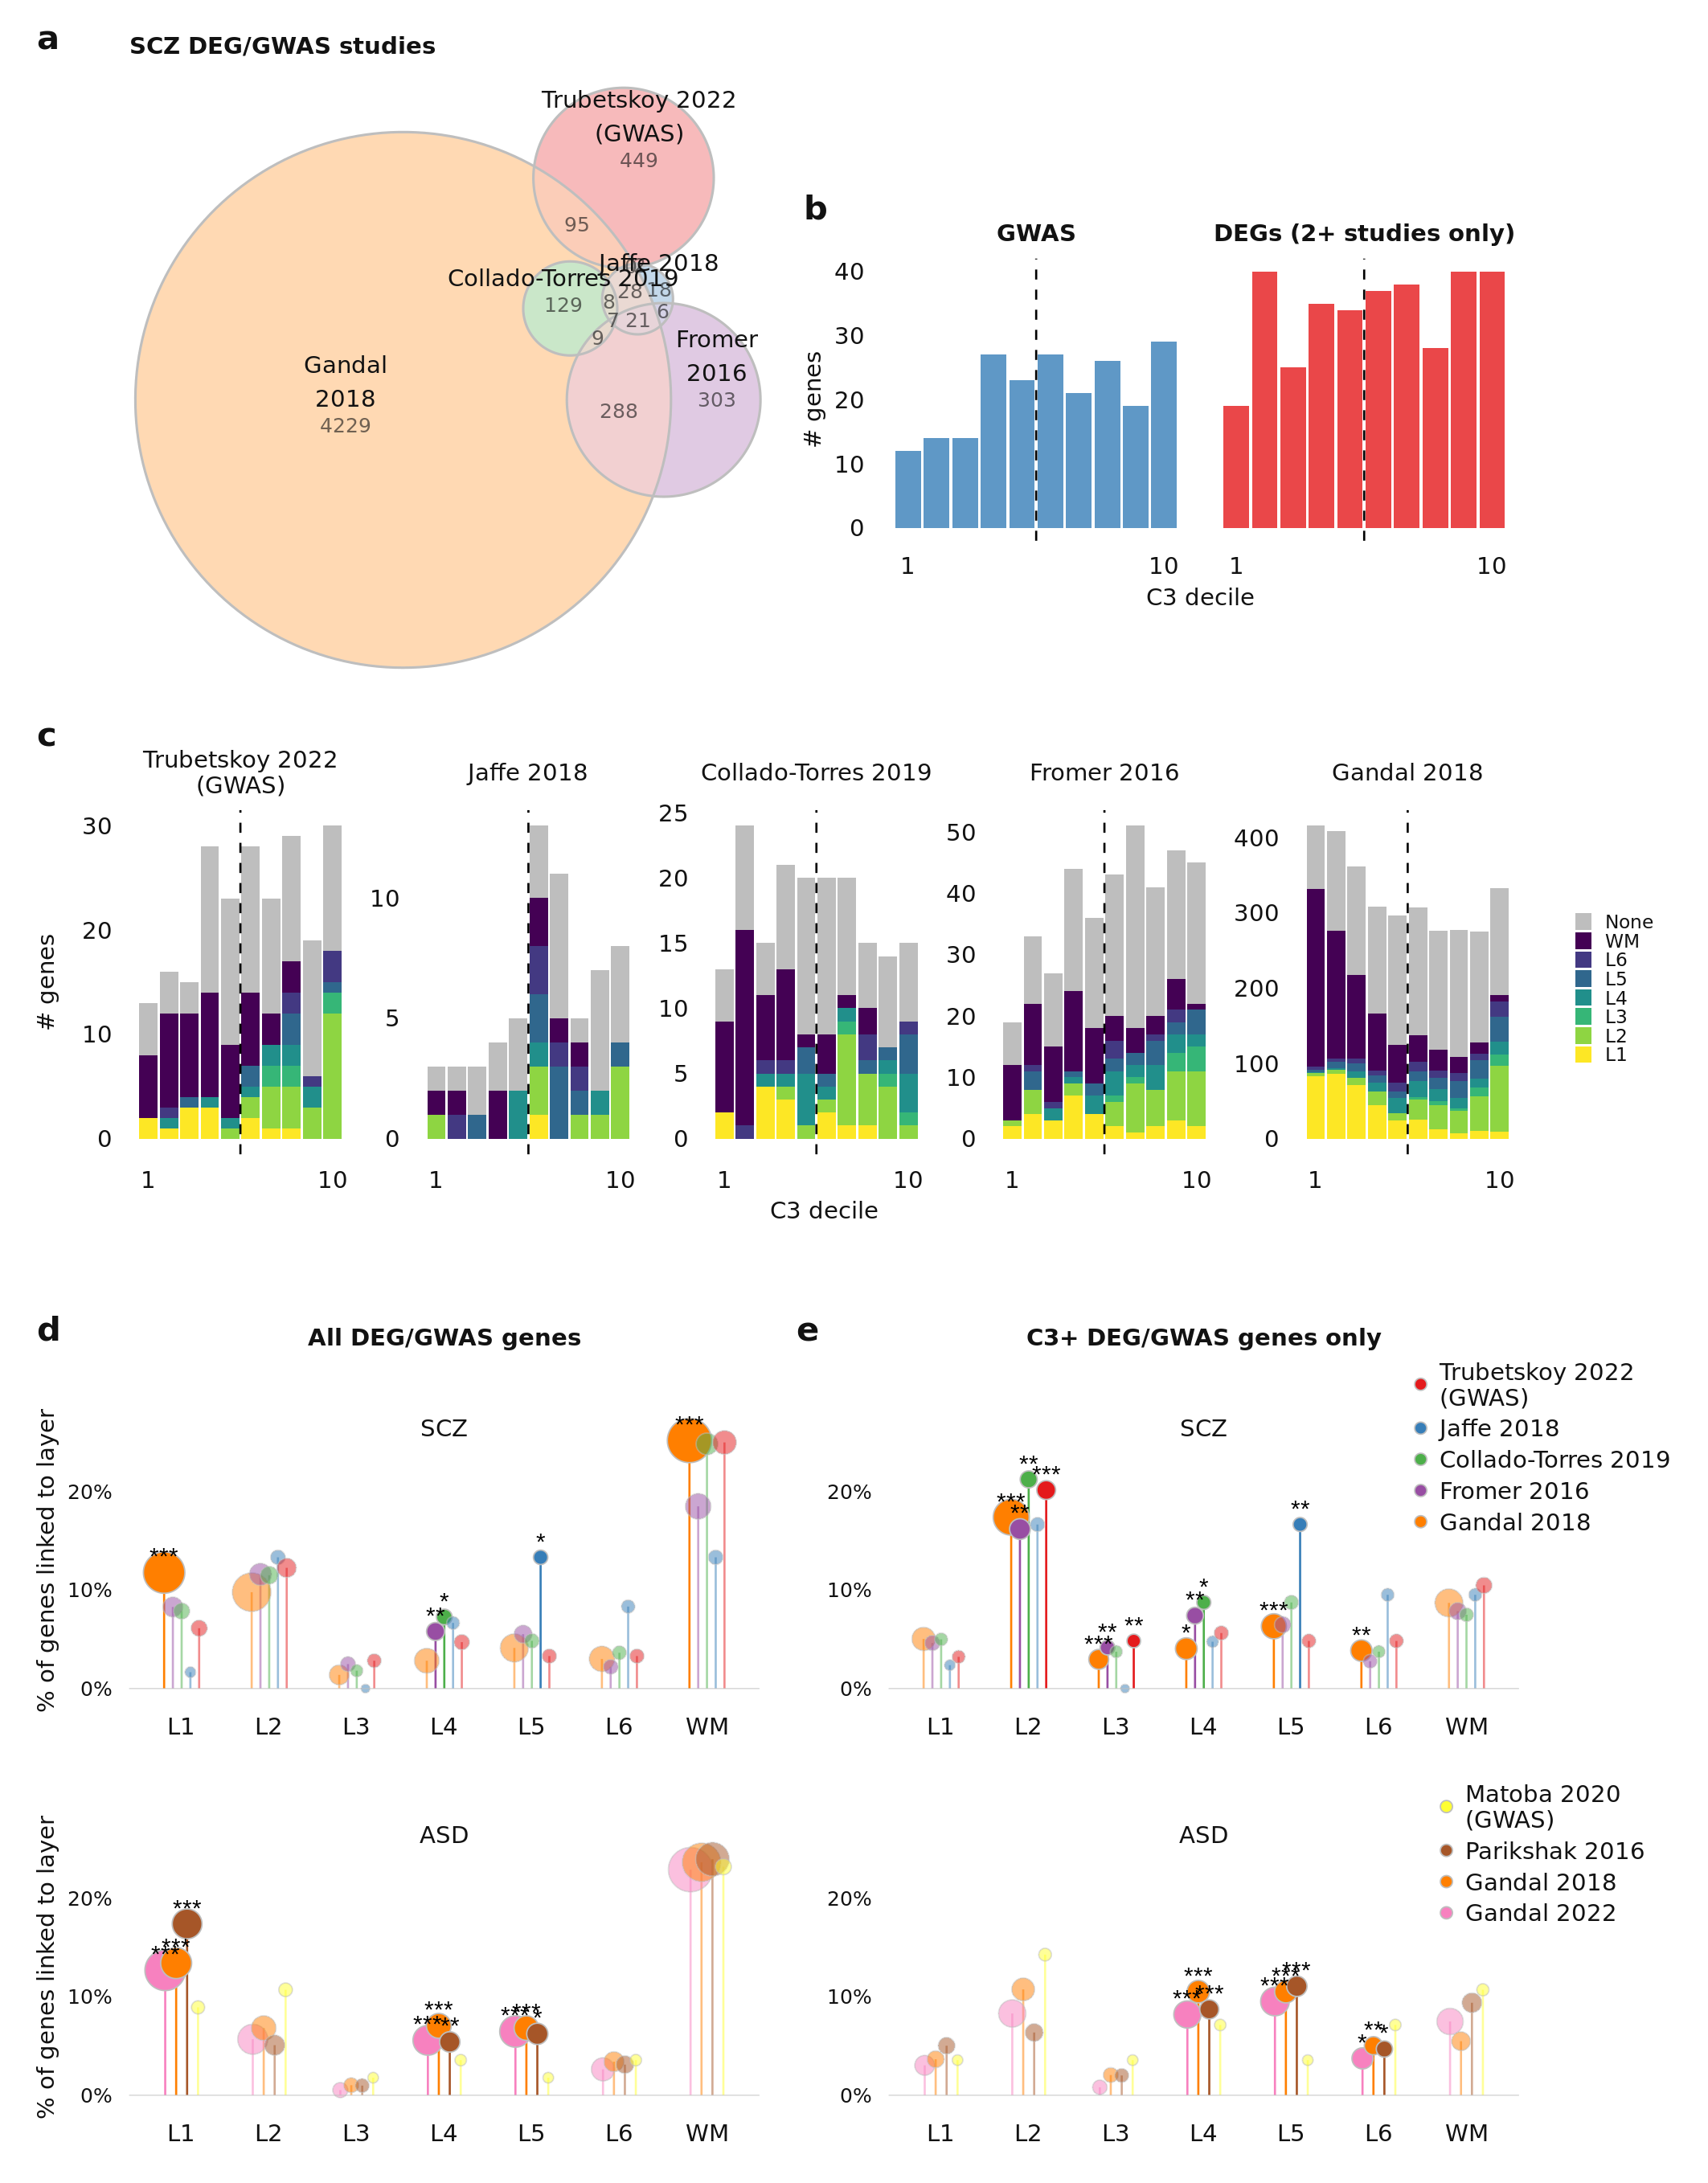

In [666]:
%%R -w 180 -h 230 -u mm -r 300
source("../code/fig4_plots.R")

layout <- c(
    area(t=1,b=70,l=1,r=90),
    area(t=20,b=60,l=91,r=180),
    area(t=71,b=120,l=1,r=180),
    area(t=131,b=230,l=1,r=180)
)

g_overlaps + g_quantile_deg_gwas + g_quantile_layers + g_layer_enrichments + plot_layout(design=layout) + plot_annotation(tag_level='a')

---

# Supplementary Figures

### Hawrylycz 2012 PCs

In [ ]:
hawrylycz_pcs = pd.read_csv("../data/hawrylycz2012_1000genePCs.csv")
hawrylycz_pcs_brain1 = hawrylycz_pcs.iloc[:,:11].set_index('Gene.B1').rename({'PC 1':'PC1','PC 2':'PC2','PC 3':'PC3'}, axis=1)
hawrylycz_pcs_brain2 = hawrylycz_pcs.iloc[:,11:].set_index('Gene.B2').rename({'PC 1.1':'PC1','PC 2.1':'PC2','PC 3.1':'PC3'}, axis=1)

hawrylycz_pcs = pd.concat({
    'Brain 1 genes': hawrylycz_pcs_brain1.loc[:, ['PC1','PC2','PC3']], 
    'Brain 2 genes': hawrylycz_pcs_brain2.loc[:, ['PC1','PC2','PC3']]
})
hawrylycz_pcs

In [ ]:
hawrylycz_pcs_corr = (weights
                      .join(hawrylycz_pcs.reset_index(0).rename({'level_0':'brain'}, axis=1))
                      .dropna()
                      .groupby('brain')
                      .apply(lambda x: x.corr().iloc[:3,3:])
)
hawrylycz_pcs_corr

In [ ]:
donor1 = '9861'
donor2 = '10021'

# donor1_expression = get_expression_abagen(fetch_hcp(), save_name='base_donor1', donors=donor1, probe_selection='max_intensity')
# donor2_expression = get_expression_abagen(fetch_hcp(), save_name='base_donor2', donors=donor2, probe_selection='max_intensity')
donor1_expression = pd.read_csv("../data/abagen-data/expression/base_donor1.csv", index_col=0)
donor2_expression = pd.read_csv("../data/abagen-data/expression/base_donor2.csv", index_col=0)

donor1_expression = donor1_expression.dropna(how='all', axis=0).dropna(how='all', axis=1)
donor2_expression = donor2_expression.dropna(how='all', axis=0).dropna(how='all', axis=1)

In [ ]:
def compute_PCs_and_correlate_weights(expression, genes, weights=weights):
    return (expression.loc[:,lambda x: np.intersect1d(x.columns, genes)]
    .pipe(lambda x: pd.DataFrame(PCA(n_components=3).fit(x).components_.T, index=x.columns))
    .set_axis(['PC1','PC2','PC3'], axis=1)
    .join(weights)
    .corr().iloc[3:,:3]
    )

hawrylycz_genes_single_brain_pca_corr = pd.concat({
    'Brain 1 genes': compute_PCs_and_correlate_weights(donor1_expression, hawrylycz_pcs_brain1.index),
    'Brain 2 genes': compute_PCs_and_correlate_weights(donor2_expression, hawrylycz_pcs_brain2.index)
})

all_genes_single_brain_pca_corr = pd.concat({
    'Brain 1 genes': compute_PCs_and_correlate_weights(donor1_expression, donor1_expression.columns),
    'Brain 2 genes': compute_PCs_and_correlate_weights(donor2_expression, donor1_expression.columns)
})

hawrylycz_genes_base_pca_corr = pd.concat({
    'Brain 1 genes': compute_PCs_and_correlate_weights(pca_base.expression, hawrylycz_pcs_brain1.index),
    'Brain 2 genes': compute_PCs_and_correlate_weights(pca_base.expression, hawrylycz_pcs_brain2.index)
})

hawrylycz_genes_3d_ds5_pca_corr = pd.concat({
    'Brain 1 genes': compute_PCs_and_correlate_weights(dme_3d_ds5.expression, hawrylycz_pcs_brain1.index),
    'Brain 2 genes': compute_PCs_and_correlate_weights(dme_3d_ds5.expression, hawrylycz_pcs_brain2.index)
})
all_genes_single_brain_pca_corr

In [ ]:
# compute_PCs_and_correlate_weights(donor1_expression, hawrylycz_pcs_brain1.index, weights=hawrylycz_pcs_brain1.loc[:,['PC1','PC2','PC3']])
# compute_PCs_and_correlate_weights(donor2_expression, hawrylycz_pcs_brain2.index, weights=hawrylycz_pcs_brain2.loc[:,['PC1','PC2','PC3']])

In [ ]:
df_hawrylycz_corr = (pd.concat({
    'PCs from Hawrylycz 2012:\n1000 most-variable genes\nfrom single-brain data\nin 56-gyri parcellation': hawrylycz_pcs_corr,
    'Same 1000 most-variable genes,\nPCs from single-brain data\nin HCP-MMP parcellation': hawrylycz_genes_single_brain_pca_corr,
    'Same 1000 most-variable genes,\nPCs from unfiltered 6-brain data\nin HCP-MMP parcellation': hawrylycz_genes_base_pca_corr,
    'Same 1000 most-variable genes,\nPCs from filtered 6-brain data\nin HCP-MMP parcellation': hawrylycz_genes_3d_ds5_pca_corr
}).melt(ignore_index=False, var_name='PC', value_name='r')
.reset_index().rename({'level_0':'data', 'level_2':'C'}, axis=1)
)

In [ ]:
%%R -i df_hawrylycz_corr -w 20 -h 20 -u in -r 100
df_hawrylycz_corr %>% 
mutate(data=factor(data, ordered=T, levels=unique(.$data))) %>% 
ggplot(aes(x=C, y=PC)) + 
facet_grid(data~brain, switch='y') +
geom_raster(aes(fill=abs(r))) +
geom_text(aes(label=round(r,2)), vjust=.5, hjust=.5, size=9, color='black') +
scale_fill_gradientn(colors=rev(brewer.rdbu(100))[10:90], limits=c(-1,1),
                     name='Gene weight\ncorrelation') +
scale_x_discrete(position='top') +
scale_y_discrete(limits=rev) +
guides(fill=guide_colorbar(barheight=10)) +
xlab('') + ylab('') +
theme_minimal() +
theme(panel.grid=element_blank(),
        text = element_text(size=22, color='grey7', family='Calibri'),
        axis.text = element_text(size=22, color='grey7', family='Calibri'),
        legend.title=element_text(vjust=1),
        legend.position='right',
        aspect.ratio=1,
        strip.placement='outside',
        strip.text.y.left = element_text(angle=0, vjust=.5, size=22),
        strip.text = element_text(angle=0, vjust=1, size=22)
        )

### Variance explained and number of genes

In [1292]:
genes_over_threshold_dict = {}
for threshold in [0.4, 0.5, 0.6]:
    genes_over_threshold_dict[threshold] = pd.DataFrame({
        'VE': get_var_explained(dme_3d_ds5),
        'n': (dme_3d_ds5.weights.abs() > threshold).sum(),
        'pct': (dme_3d_ds5.weights.abs() > threshold).sum() / len(dme_3d_ds5.weights),
    })

var_explained_bars = (pd.concat(genes_over_threshold_dict)
 .reset_index().rename({'level_0':'threshold', 'level_1':'C'}, axis=1)
)

# var_explained_bars

var_explained_violins = (dme_3d_ds5.weights.abs()
 .melt(var_name='C', value_name='r')
 .join(var_explained_bars.set_index('C'), on='C')
)
# var_explained_violins

`geom_smooth()` using formula = 'y ~ x'


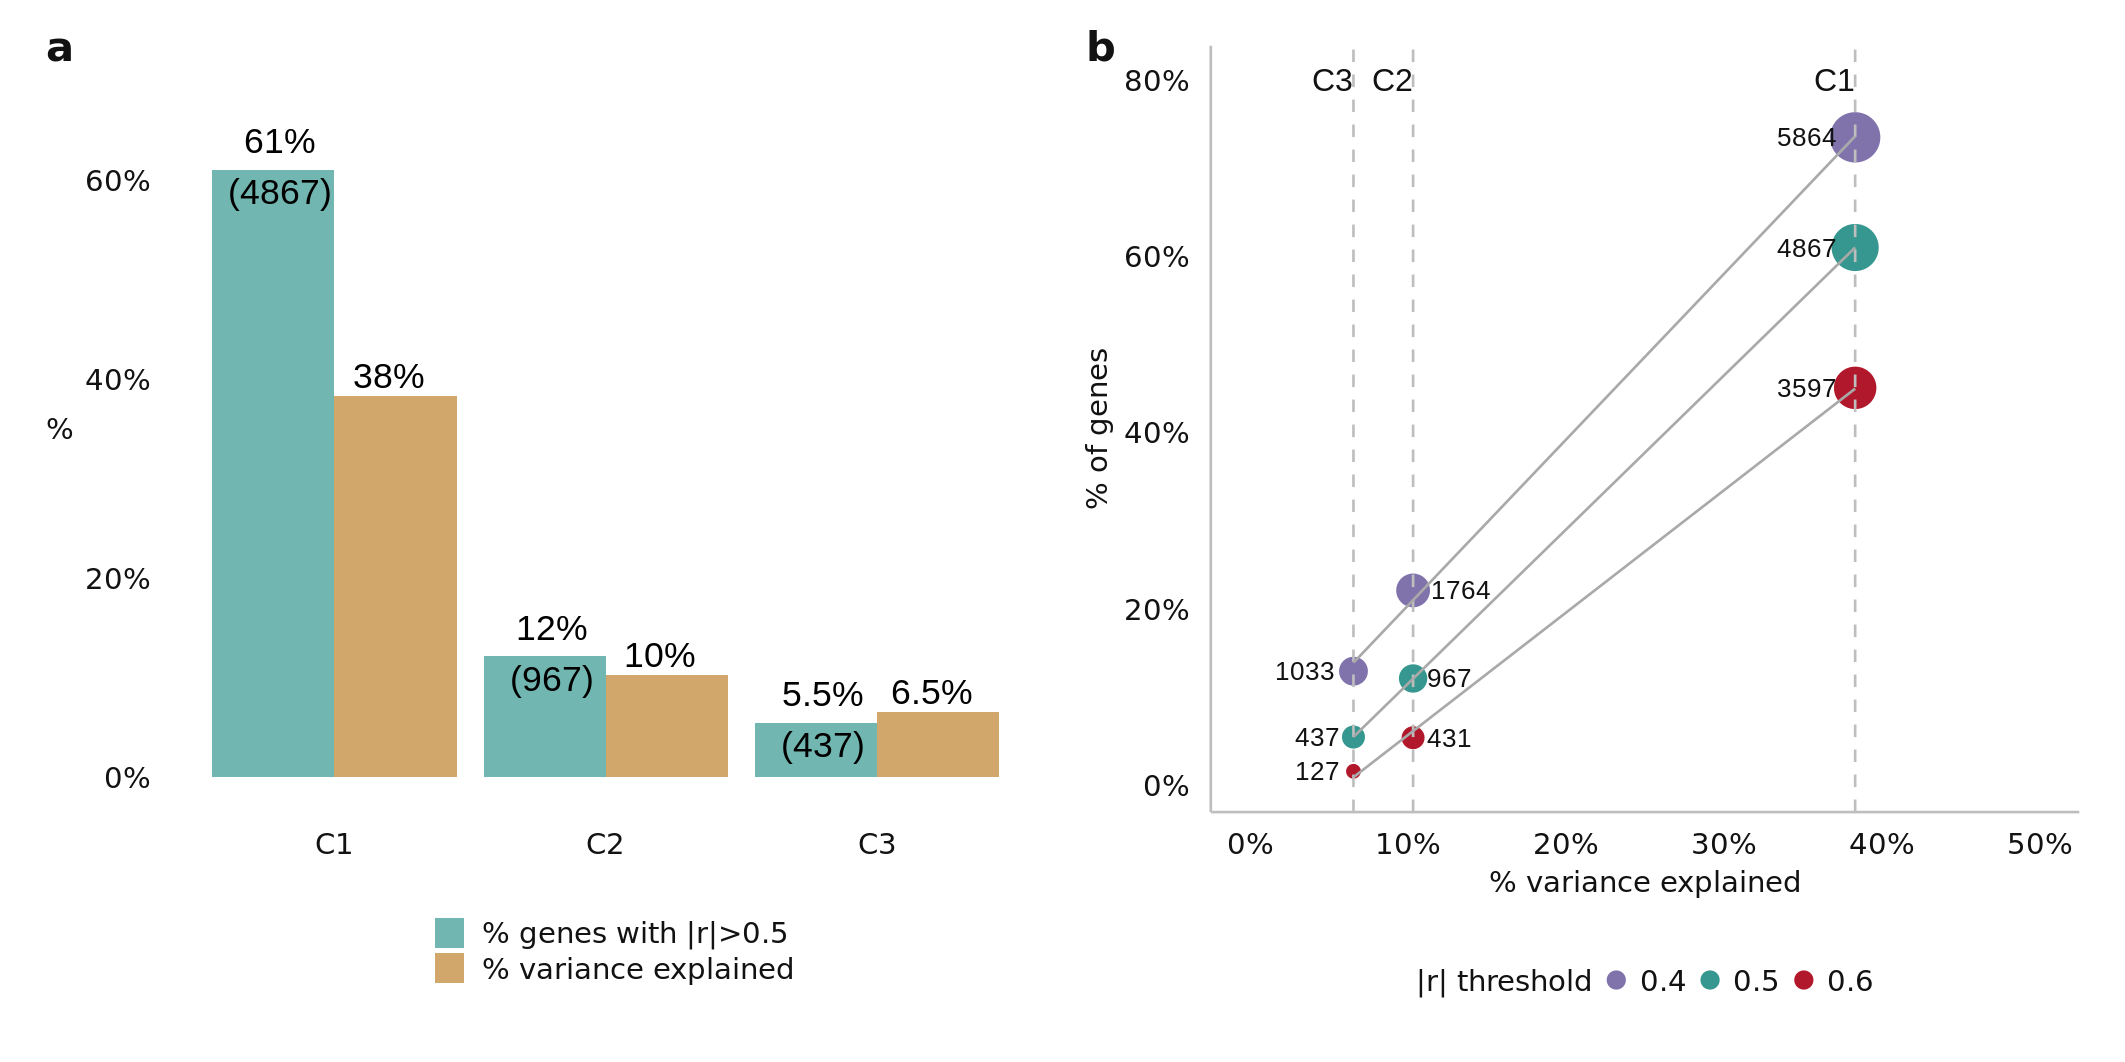

In [1361]:
%%R -i var_explained_bars -i var_explained_violins -w 180 -h 90 -u mm -r 300
source("../code/fig_extended.R")

bars <- plot_var_explained_bars(var_explained_bars %>% filter(threshold=='0.5')) #+ inset_element(scatter, left=0.5, right=1, bottom=0.5, top=1, align_to='full')
scatter <- plot_var_explained_scatter(var_explained_bars)
# # violins <- plot_var_explained_violins(var_explained_violins)
bars + scatter + plot_annotation(tag_level='a')

### Burt single gene enrichments

In [ ]:
burt_genes = ['CORT','CALB1','SST','PVALB','CCK','NPY','PNOC','CALB2','VIP']
burt_genes = pd.DataFrame({'gene':burt_genes, 'label':burt_genes})
burt_stats = compute_null_p(*compute_enrichments(weights, null_weights, burt_genes))

In [ ]:
grin_genes = ['GRIN' + x for x in ['3A','2B','2C','2A','A','1','3B','2D']]
gabra_genes = ['GABRA' + x for x in ['3','5','2','1','4']]
grin_gabra_genes = grin_genes + gabra_genes
grin_gabra_genes = pd.DataFrame({'gene':grin_gabra_genes, 'label':grin_gabra_genes})
grin_gabra_stats = compute_null_p(*compute_enrichments(weights, null_weights, grin_gabra_genes))

### Neuron subtype enrichments

In [ ]:
lake_subtypes = get_cell_genes(which='jakob', include='lake_plus_glia', subtype=True, combine_layers=False, add_synapses=False)
order = (lake_subtypes
         .assign(neuro = lambda x: [False if c in ['Endo', 'Oligo', 'Micro', 'OPC', 'Astro'] else True for c in x.label])
         .assign(ex_in = lambda x: [False if 'In' in c else True for c in x.label])
         .sort_values(['neuro', 'ex_in'], ascending=False).label.unique()
        )

lake_stats = compute_null_p(*compute_enrichments(weights, null_weights, lake_subtypes), order=order)

In [ ]:
%%R -i burt_stats -i grin_gabra_stats -i lake_stats -w 180 -h 110 -u mm -r 300
source("../code/fig_extended.R")
g1 = plot_enrichment_bars_z(burt_stats, xlab='Gene Weight Z-score') + theme(axis.text.y=element_text(face='italic'))
g2 = plot_enrichment_bars_z(grin_gabra_stats, xlab='Gene Weight Z-score') + theme(axis.text.y=element_text(face='italic'))
g3 = plot_enrichment_bars_z(lake_stats, xlab='Marker Gene Enrichment Z-score') 

((g1 / g2) | g3) + plot_annotation(tag_level='a')

### Non-overlapping genes

In [ ]:
get_expression_abagen(fetch_hcp(), donors_threshold=3, save_name = 'hcp_3d')

INFO: Donor-specific atlases provided; using native coords for tissue samples
INFO: Reannotating probes with information from Arnatkevic̆iūtė et al., 2019, NeuroImage
INFO: Filtering probes with intensity-based threshold of 0.5
INFO: 32669 probes survive intensity-based filtering
INFO: Reducing probes indexing same gene with method: diff_stability
INFO: 15946 genes remain after probe filtering + selection
INFO: 458 / 477 samples matched to regions for donor #9861
INFO: 346 / 367 samples matched to regions for donor #10021
INFO: 173 / 181 samples matched to regions for donor #12876
INFO: 259 / 263 samples matched to regions for donor #14380
INFO: 222 / 224 samples matched to regions for donor #15496
INFO: 231 / 240 samples matched to regions for donor #15697
INFO: Aggregating samples to regions with provided region_agg: donors


137 / 180 regions remain after filtering for regions with samples from >= 3 donors
15946 / 15946 genes remain after filtering for top 1.0 stability
Expression matrix saved to ../data/abagen-data/expression/hcp_3d.csv


gene_symbol      A1BG  A1BG-AS1       A2M     A2ML1   A3GALT2    A4GALT  \
label                                                                     
1            0.234124  0.260771  0.588592  0.585517  0.535049  0.499659   
4            0.363618  0.284738  0.496556  0.429600  0.476854  0.397701   
5            0.219162  0.217884  0.454745  0.625059  0.531481  0.637702   
6            0.418642  0.400929  0.561077  0.509917  0.470311  0.389403   
8            0.312791  0.376259  0.671071  0.548835  0.549000  0.534500   
9            0.330776  0.315457  0.689649  0.600908  0.527557  0.458393   
10           0.487532  0.455947  0.385058  0.567572  0.201281  0.651707   
12           0.396896  0.359173  0.602307  0.699906  0.518698  0.568528   
13           0.109955  0.280747  0.522662  0.587962  0.545114  0.458559   
14           0.348937  0.433523  0.499740  0.664534  0.554529  0.450734   
15           0.278542  0.508868  0.392648  0.458905  0.340135  0.333301   
17           0.335619  0.482315  0.584328  0.510273  0.376912  0.499348   
18           0.608451  0.683836  0.486730  0.456501  0.399037  0.407355   
24           0.517064  0.452995  0.697465  0.510974  0.623693  0.627713   
25           0.405924  0.580417  0.541117  0.392512  0.319445  0.362484   
26           0.381783  0.378716  0.482306  0.703990  0.589583  0.511073   
27           0.464151  0.607677  0.494176  0.496869  0.380874  0.491214   
28           0.475126  0.653111  0.550089  0.407374  0.418818  0.474181   
29           0.418183  0.543059  0.447123  0.521609  0.560416  0.572958   
30           0.412625  0.428263  0.498398  0.470171  0.462443  0.434356   
31           0.463696  0.587251  0.476002  0.529565  0.479588  0.499037   
32           0.397417  0.590548  0.536702  0.589515  0.550986  0.515979   
34           0.388829  0.436019  0.587864  0.513508  0.562743  0.502794   
35           0.186557  0.403474  0.438139  0.575282  0.538413  0.500802   
37           0.379656  0.527719  0.661226  0.456058  0.481699  0.441993   
38           0.503232  0.504809  0.500952  0.471782  0.514366  0.452537   
39           0.472814  0.453681  0.399571  0.481183  0.251709  0.584039   
40           0.505056  0.484267  0.603656  0.569756  0.558307  0.582731   
41           0.492845  0.556334  0.589608  0.578375  0.509597  0.374624   
42           0.436834  0.477445  0.424336  0.569298  0.418563  0.519040   
43           0.483448  0.511663  0.429327  0.641376  0.647103  0.544323   
44           0.451092  0.583422  0.482714  0.641171  0.475189  0.447357   
45           0.397212  0.582155  0.344580  0.390356  0.587399  0.270990   
47           0.552807  0.433555  0.388157  0.432710  0.320471  0.372720   
48           0.315776  0.439919  0.380834  0.678228  0.575459  0.456732   
49           0.307809  0.657360  0.566111  0.383794  0.421857  0.427834   
50           0.421416  0.523671  0.496908  0.365575  0.445788  0.445310   
51           0.326630  0.389683  0.563649  0.522787  0.488337  0.443119   
52           0.379983  0.537572  0.518634  0.496241  0.395338  0.260033   
53           0.372461  0.312736  0.583195  0.462482  0.441379  0.533085   
54           0.327545  0.331473  0.635487  0.486501  0.347873  0.500935   
55           0.303486  0.483209  0.655963  0.667840  0.552718  0.375697   
57           0.468286  0.533718  0.359809  0.664047  0.526731  0.425091   
58           0.648306  0.479834  0.496654  0.643570  0.413568  0.450210   
59           0.636861  0.576454  0.390560  0.659755  0.531132  0.367386   
60           0.454660  0.530992  0.359649  0.527023  0.393653  0.527791   
61           0.628123  0.473476  0.444894  0.609250  0.528004  0.473534   
62           0.643160  0.614131  0.517363  0.385040  0.436530  0.470219   
63           0.533571  0.566067  0.473666  0.454737  0.291063  0.506764   
64           0.562254  0.762617  0.536218  0.346155  0.404061  0.434326   
65           0.584584  0.519655  0.367240  0.467456  0.364787  0.429510   
67           0.554942  0.

In [1400]:
expression_nofilter = gradientVersion().fit('hcp_3d').expression
nofilter_genes = set(expression_nofilter.columns).difference(set(dme_3d_ds5.weights.index))
expression_complement_genes = expression_nofilter.loc[:, list(nofilter_genes)]
dme_3d_complement = gradientVersion(marker_genes=[]).fit(expression_complement_genes)

New gradients version: method=dm, kernel=normalized_angle, sparsity=0, data=hcp_3d
New gradients version: method=dm, kernel=normalized_angle, sparsity=0, data=(data given)


In [ ]:
dme_3d_complement.corr_scores(dme_3d_ds5)

0         1         2         3         4
0  0.395219 -0.163697 -0.065809  0.537252  0.248988
1  0.415446 -0.530144 -0.308825 -0.209206 -0.076004
2 -0.467386 -0.119901 -0.521893  0.247322 -0.591358
3  0.625904  0.235870 -0.048244 -0.181043 -0.542918
4  0.071041 -0.315173  0.170696  0.577003 -0.044396

In [1401]:
signs = np.diag(np.sign(dme_3d_complement.corr_scores(dme_3d_ds5)))[:3]
weights_complement = dme_3d_complement.weights * signs
null_weights_complement = shuffle_gene_weights(weights_complement, n=5000)

In [1402]:
layer_genes = get_layer_genes(which='maynard', add_hse_genes=False)
layer_stats_complement = compute_null_p(*compute_enrichments(weights_complement, null_weights_complement, layer_genes))

In [1414]:
cell_genes = get_cell_genes(which='jakob', add_synapses=True)
order = ['Synapses', 'Neuro-Ex', 'Neuro-In', 'Astro', 'Micro', 'Endo', 'Oligo', 'OPC']
true_scores, null_scores, counts = compute_enrichments(weights_complement, null_weights_complement, cell_genes, how='mean')
cell_stats_complement = compute_null_p(true_scores, null_scores, adjust='fdr_bh', order=order)

In [1415]:
cell_rename = {
    'Synapses':'Syn',
    'Neuro-Ex':'N-Ex',
    'Neuro-In':'N-In',
    'Astro':'Astro',
    'Micro':'Micro',
    'Endo':'Endo',
    'Oligo':'Oligo',
    'OPC':'OPC'
}   
cell_stats_complement = cell_stats_complement.replace({'label':cell_rename}).sort_values(['label','C'])

Original

In [1406]:
layer_genes = get_layer_genes(which='maynard', add_hse_genes=False)
layer_stats = compute_null_p(*compute_enrichments(weights, null_weights, layer_genes))

In [1407]:
cell_genes = get_cell_genes(which='jakob', add_synapses=True)
order = ['Synapses', 'Neuro-Ex', 'Neuro-In', 'Astro', 'Micro', 'Endo', 'Oligo', 'OPC']
true_scores, null_scores, counts = compute_enrichments(weights, null_weights, cell_genes, how='mean')
cell_stats = compute_null_p(true_scores, null_scores, adjust='fdr_bh', order=order)

In [1408]:
cell_rename = {
    'Synapses':'Syn',
    'Neuro-Ex':'N-Ex',
    'Neuro-In':'N-In',
    'Astro':'Astro',
    'Micro':'Micro',
    'Endo':'Endo',
    'Oligo':'Oligo',
    'OPC':'OPC'
}
    
cell_stats = cell_stats.replace({'label':cell_rename}).sort_values(['label','C'])


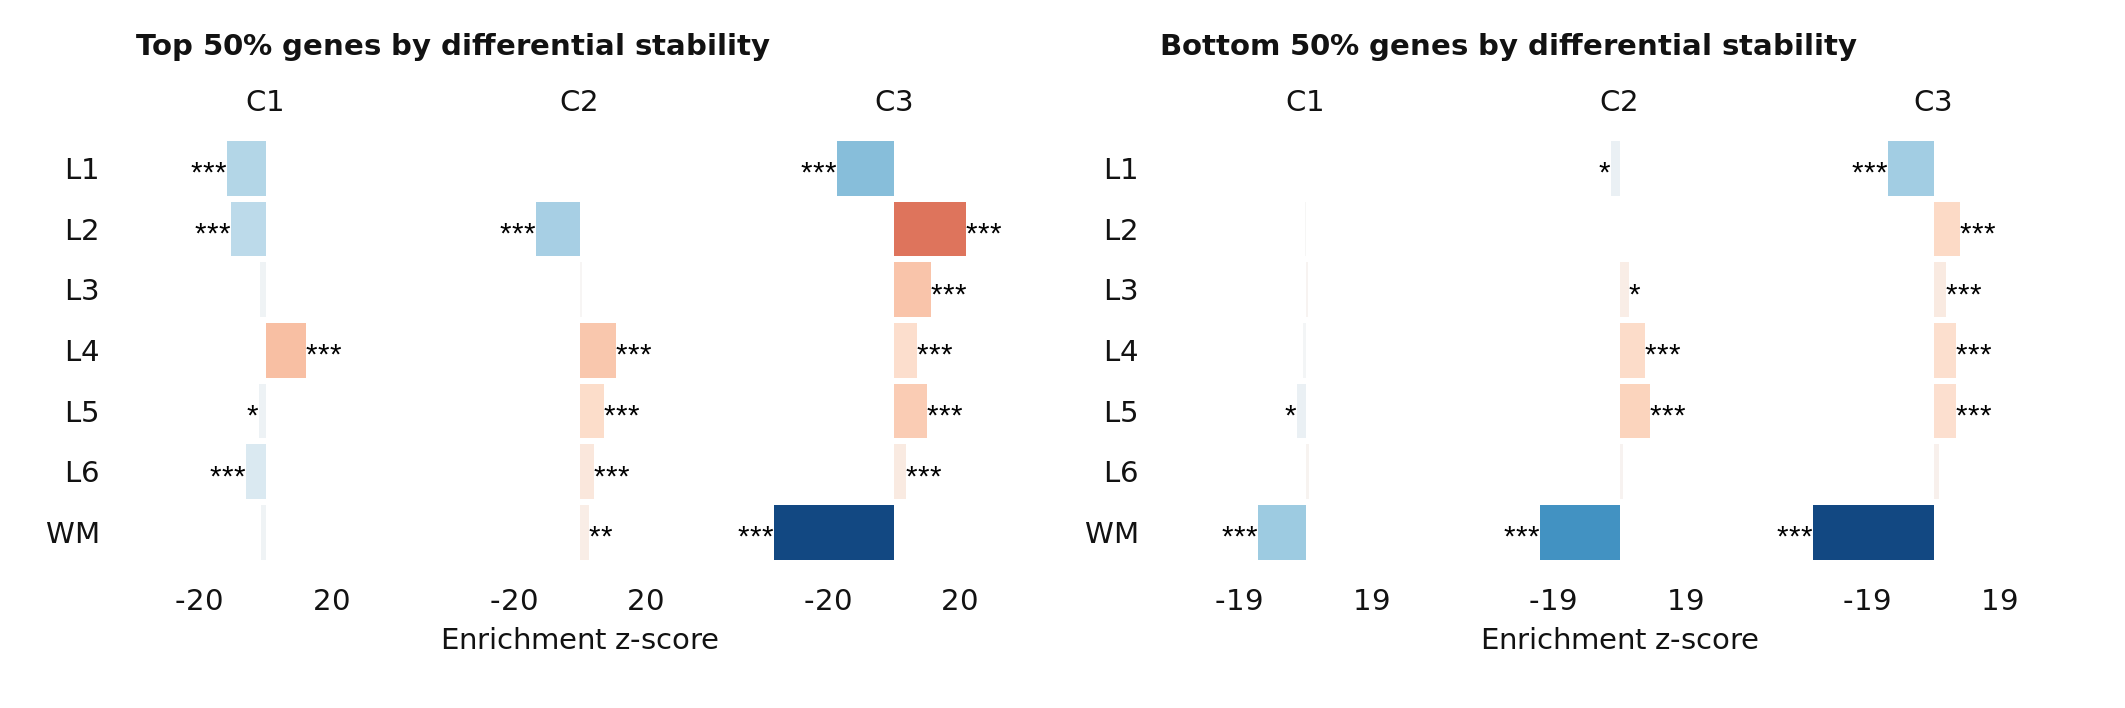

In [1423]:
%%R -i layer_stats -i layer_stats_complement -i cell_stats -i cell_stats_complement -w 180 -h 60 --units mm -r 300
source("../code/fig1_plots.R")

g1 <- plot_enrichment_bars_z(layer_stats) + ggtitle("Top 50% genes by differential stability")
g1c <- plot_enrichment_bars_z(layer_stats_complement) + ggtitle("Bottom 50% genes by differential stability")

(g1 + g1c) & theme(aspect.ratio=1.5)
# g2 <- plot_enrichment_bars_z(cell_stats) 
# g2c <- plot_enrichment_bars_z(cell_stats_complement)

# ((g1 + g1c) / (g2 + g2c)) & theme(aspect.ratio=1.5)


### Single cell cross plot

In [1385]:
sc_projected_posneg_plot = format_single_cell_projected_for_plot()

In [1387]:
sc_cross_plot = (sc_projected_posneg_plot
 .drop('negative',axis=1).rename({'C':'C_positive'},axis=1)
 .join(sc_projected_posneg_plot.rename({'C':'C_negative'},axis=1).loc[:,['C_negative','negative']])
)

/opt/conda/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:56: UserWarning: DataFrame contains duplicated elements in the index, which will lead to loss of the row names in the resulting data.frame
  warnings.warn('DataFrame contains duplicated elements in the index, '


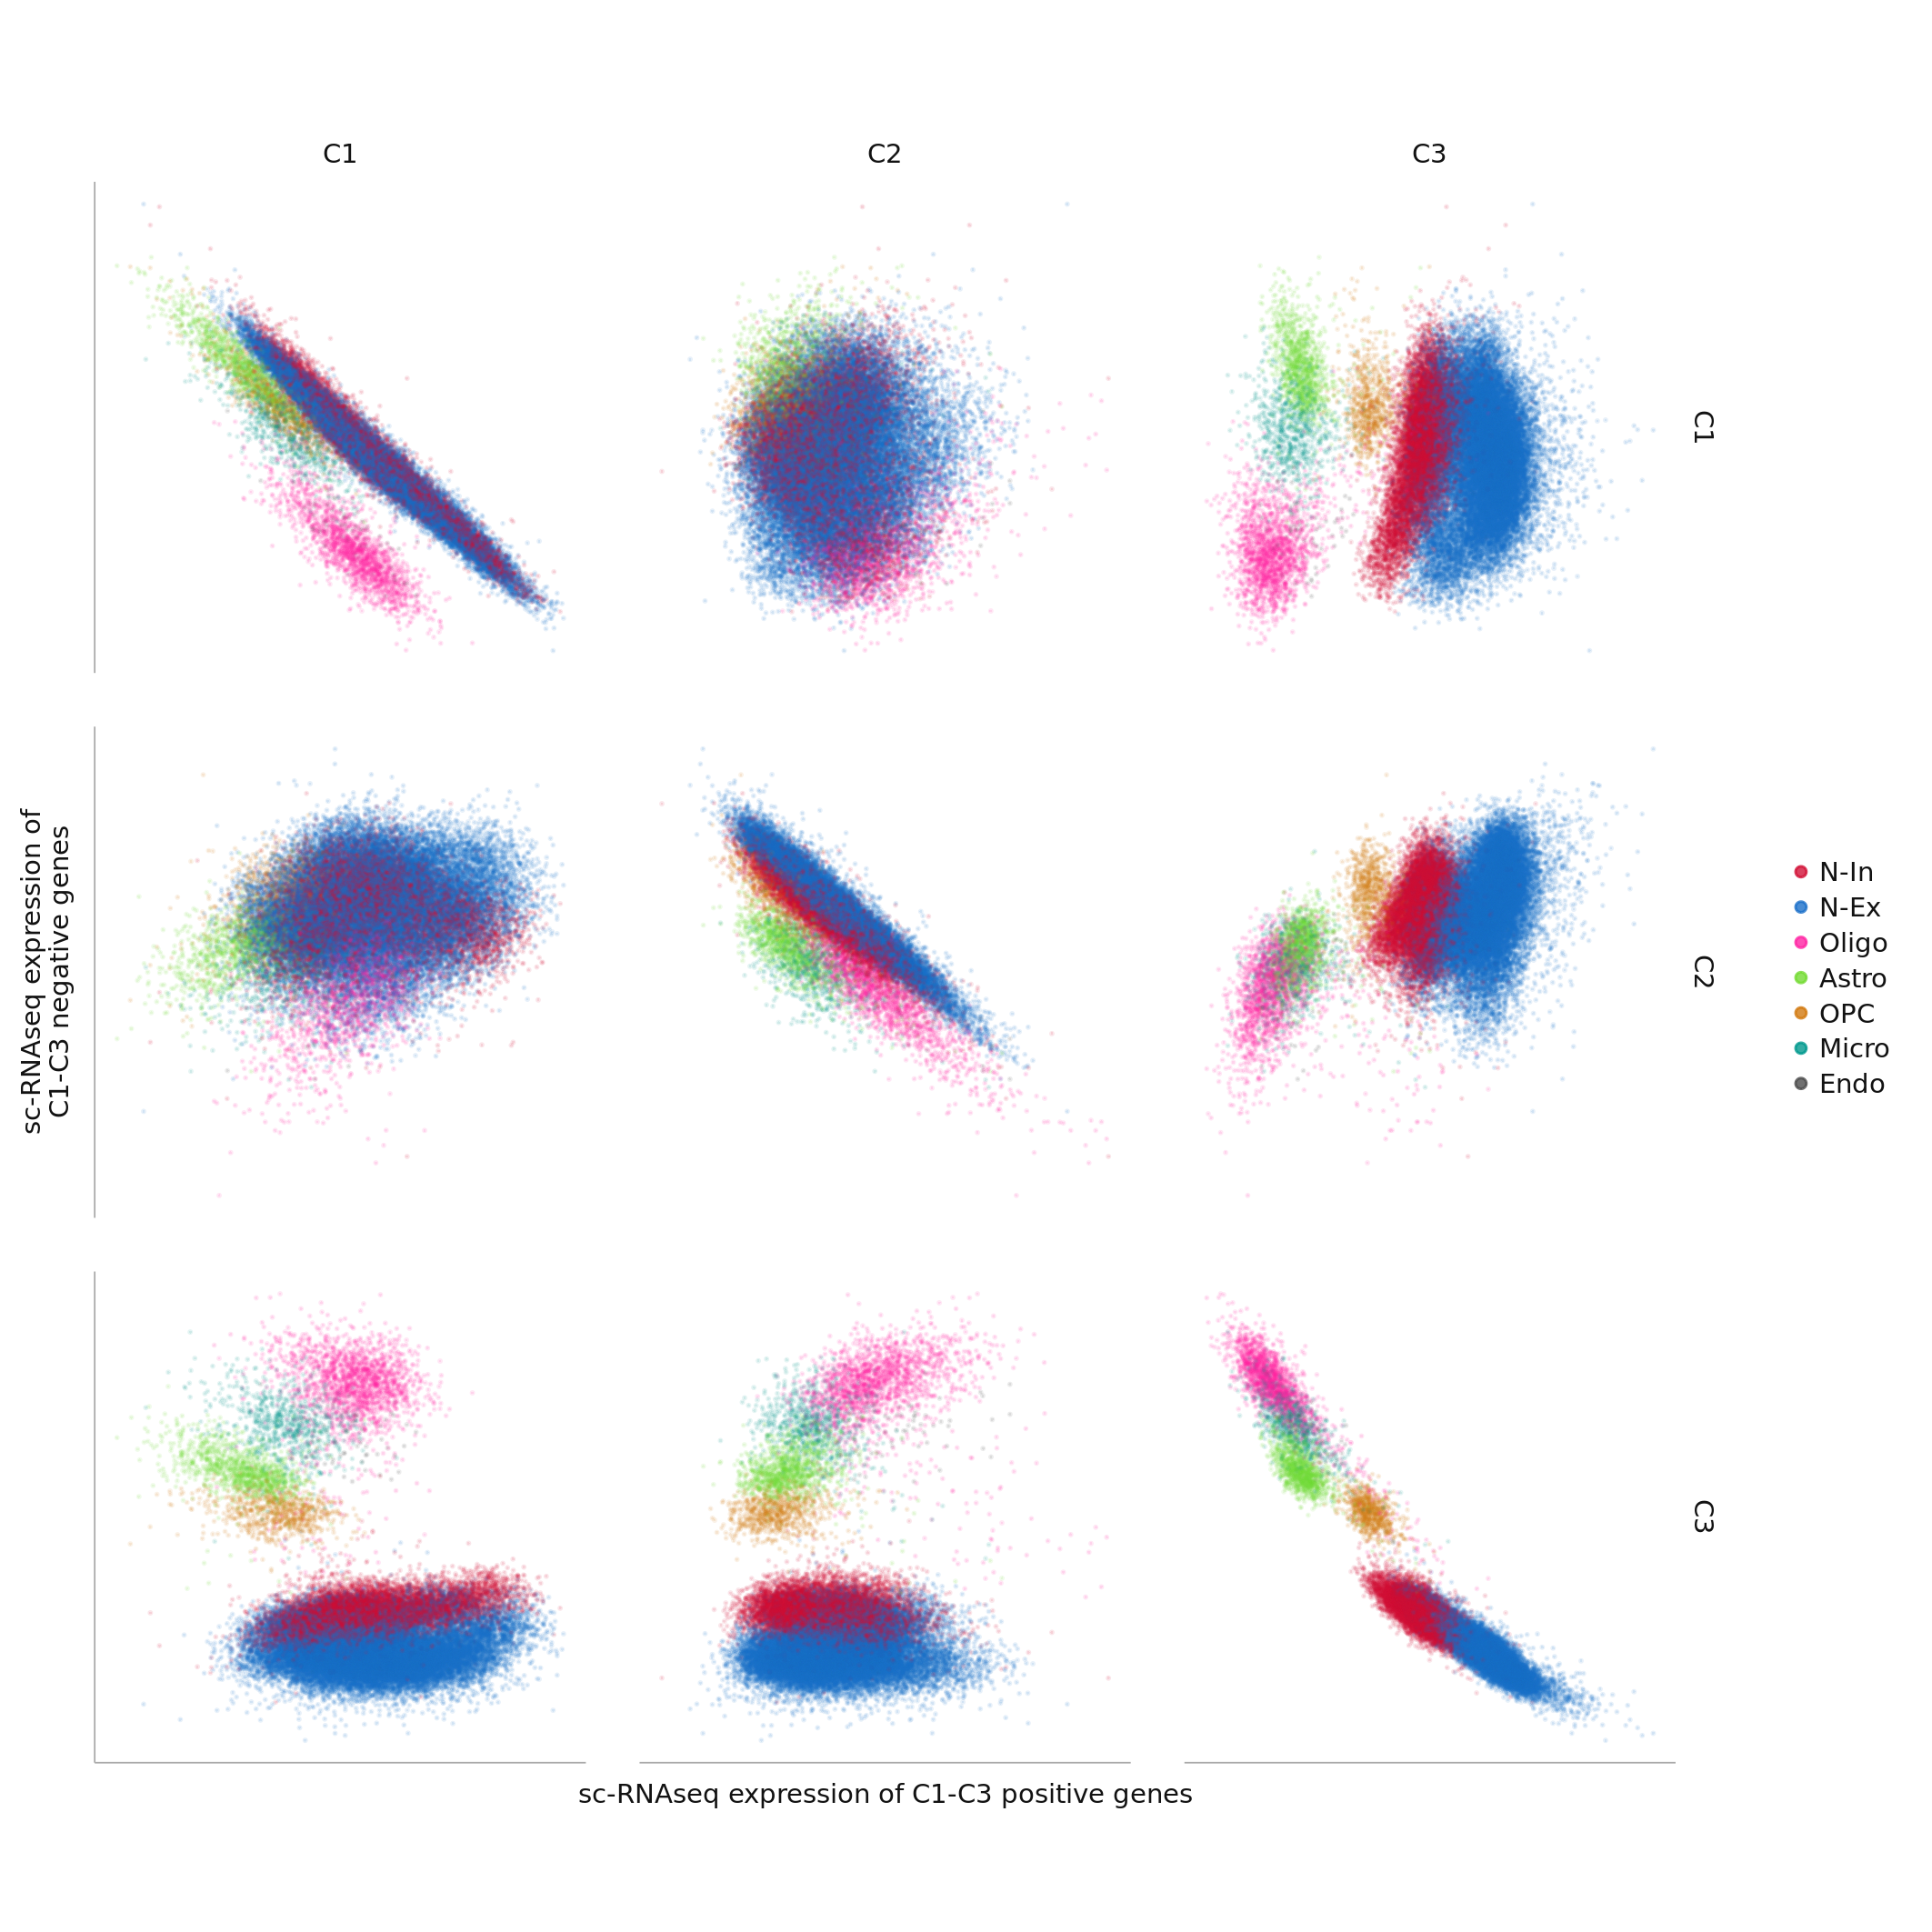

In [1397]:
%%R -i sc_cross_plot -w 180 -h 180 -u mm -r 300
colors <- c(
        brewer.rdbu(21)[c(2,20)],
        brewer.piyg(11)[c(2,10)],
        brewer.brbg(11)[c(2,10)]
    ) %>% 
    brightness(scalefac(1.5)) %>% 
    # saturation(scalefac(1.2)) %>% 
    c('grey30')

sc_cross_plot %>% 
mutate(cell_type = factor(cell_type, ordered=T, levels=unique(.$cell_type))) %>% 
ggplot(aes(positive, negative)) + 
facet_grid(C_negative~C_positive, scales='free') + 
geom_point(alpha=.1, size=.002, aes(color=cell_type)) +
xlab("sc-RNAseq expression of C1-C3 positive genes") +
ylab("sc-RNAseq expression of\nC1-C3 negative genes") +
scale_color_manual(values=colors, name=NULL) +
guides(colour = guide_legend(byrow=T, override.aes = list(size=1, alpha=.8))) +
theme_classic() + 
theme(
    text = element_text(size=7, family = 'Calibri', color = 'grey7'),
    strip.text = element_text(size=7, family = 'Calibri', color = 'grey7', angle=0),
    strip.background = element_blank(),
    strip.placement='outside',
    panel.grid = element_blank(),
    panel.spacing.x = unit(5,'mm'),
    panel.spacing.y = unit(5,'mm'),
    legend.spacing.y = unit(1,'mm'),
    legend.key.size = unit(0.5, "mm"),
    legend.text = element_text(size=7),
    axis.line = element_line(size=.2, color='darkgrey'),
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    aspect.ratio = 1
)


---